# Bivariate EDA

## Libraries

In [132]:
from typing import Any

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import (
    f_oneway,
    kruskal,
    probplot,
    shapiro,
    ttest_ind,
)

pd.set_option("display.max_columns", 30)
pd.set_option("display.width", 1440)

## Load processed dataframe

In [133]:
dataframe: pd.DataFrame = pd.read_csv("../data/processed/data.csv")
dataframe

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female          False     True       False       1         False   
1       Male          False    False       False      34          True   
2       Male          False    False       False       2          True   
3       Male          False    False       False      45         False   
4     Female          False    False       False       2          True   
...      ...            ...      ...         ...     ...           ...   
7038    Male          False     True        True      24          True   
7039  Female          False     True        True      72          True   
7040  Female          False     True        True      11         False   
7041    Male           True     True       False       4          True   
7042    Male          False    False       False      66          True   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

      PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 True           Electronic check           29.85   
1                False               Mailed check           56.95   
2                 True               Mailed check           53.85   
3                False  Bank transfer (automatic)           42.30   
4                 True           Electronic check           70.70   
...                ...                        ...             ...   
7038              True               Mailed check           84.80   
7039              True    Credit card (automatic)          103.20   
7040              True           Electronic check           29.60   
7041              True               Mailed check           74.40   
7042              True  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7043 rows x 20 columns]

## Data Visualization

### Against TotalCharges

In [134]:
categorical_vars: list[str] = [
    "gender",
    "Dependents",
    "MultipleLines",
    "OnlineBackup",
    "StreamingTV",
    "PaperlessBilling",
]

numerical_vars: list[str] = ["TotalCharges", "MonthlyCharges", "tenure"]
figures_path: str = "../reports/figures/"
font_size: int = 15
fig_size: tuple[int, int] = (15, 8)
palette: str = "pastel"


def plot_distributions(
    categorical: list[str],
    numerical: list[str],
    data: pd.DataFrame,
    plot_type: str,
) -> None:
    plot_functions: dict[str, Any] = {
        "box": sns.boxplot,
        "violin": sns.violinplot,
        "swarm": sns.swarmplot,
    }
    if plot_type not in plot_functions:
        raise ValueError(
            f"Plot type {plot_type} is not supported. Choose from box, "
            f"violin, swarm."
        )
    plot_func = plot_functions[plot_type]
    for num_var in numerical:
        for cat_var in categorical:
            plt.figure(figsize=fig_size)
            plot_func(
                x=cat_var, y=num_var, hue=cat_var, data=data, palette=palette
            )
            plt.xlabel(cat_var, fontsize=font_size)
            plt.ylabel(num_var, fontsize=font_size)
            plt.title(f"{num_var} by {cat_var} - {plot_type.capitalize()} Plot")
            plt.legend(
                title=cat_var,
                title_fontsize="large",
                fontsize="medium",
                loc="upper right",
            )
            plt.savefig(
                f"{figures_path}{plot_type}_plot_{num_var}_{cat_var}.png"
            )
            plt.show()


def plot_histogram(
    subset: pd.Series, category: str, categorical_var: str, numerical_var: str
) -> None:
    plt.figure(figsize=fig_size)
    sns.histplot(subset, kde=True)
    plt.title(
        f"Histogram of {numerical_var} for {category} in {categorical_var}"
    )
    plt.savefig(
        f"{figures_path}hist_{numerical_var}_{category}_{categorical_var}.png"
    )
    plt.show()


def plot_qq_plot(
    subset: pd.Series, category: str, categorical_var: str, numerical_var: str
) -> None:
    plt.figure(figsize=fig_size)
    probplot(subset, dist="norm", plot=plt)
    plt.title(
        f"Q-Q Plot of {numerical_var} for {category} in {categorical_var}"
    )
    plt.savefig(
        f"{figures_path}prob_plot_{numerical_var}_{category}_{categorical_var}"
        f".png"
    )
    plt.show()

### Boxplots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


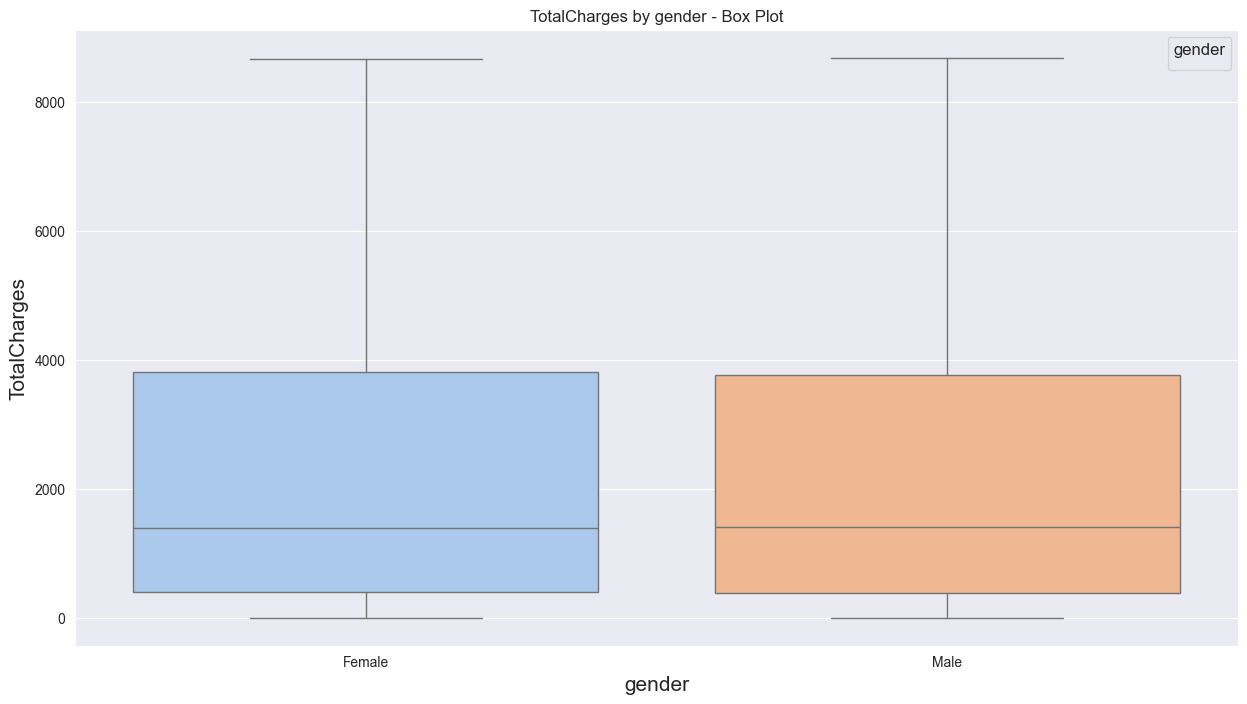

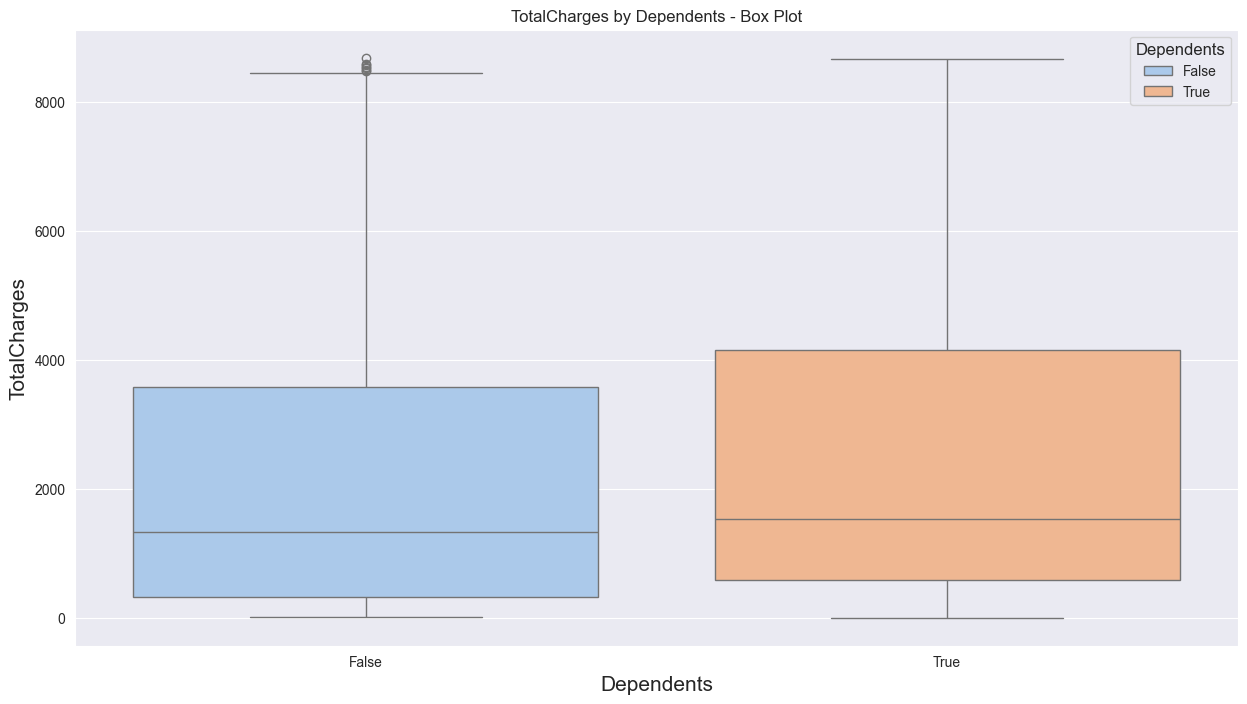

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


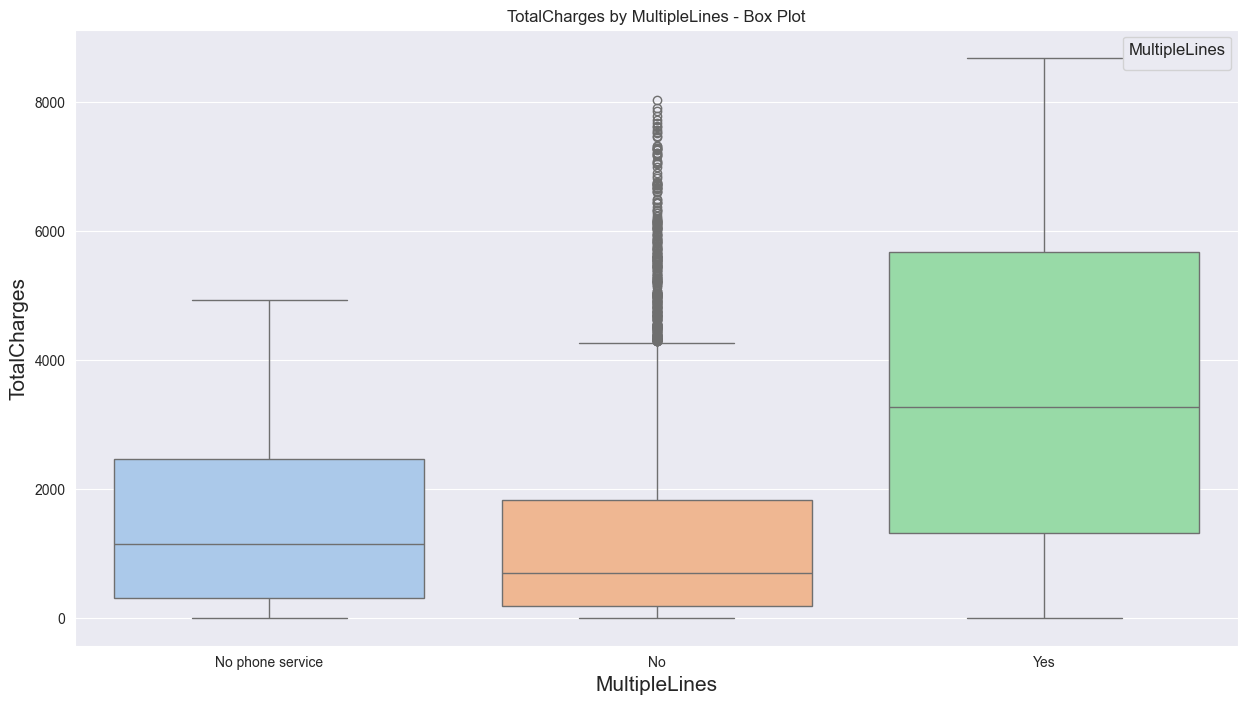

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


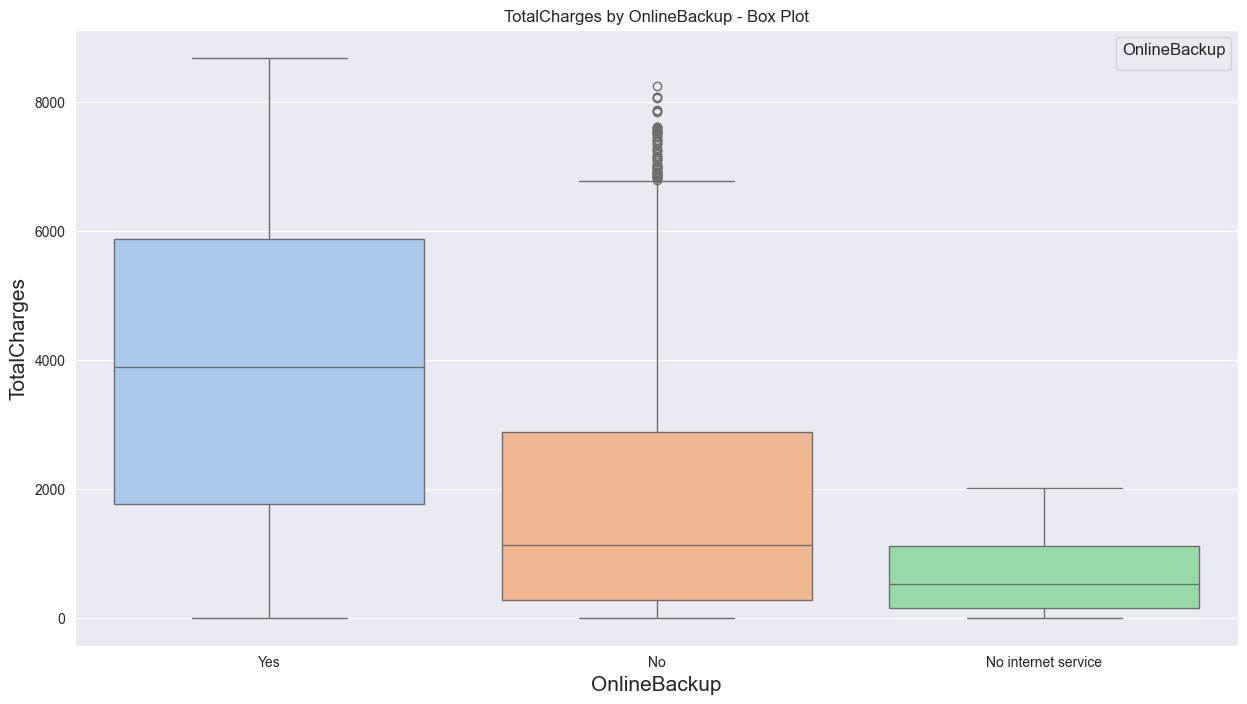

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


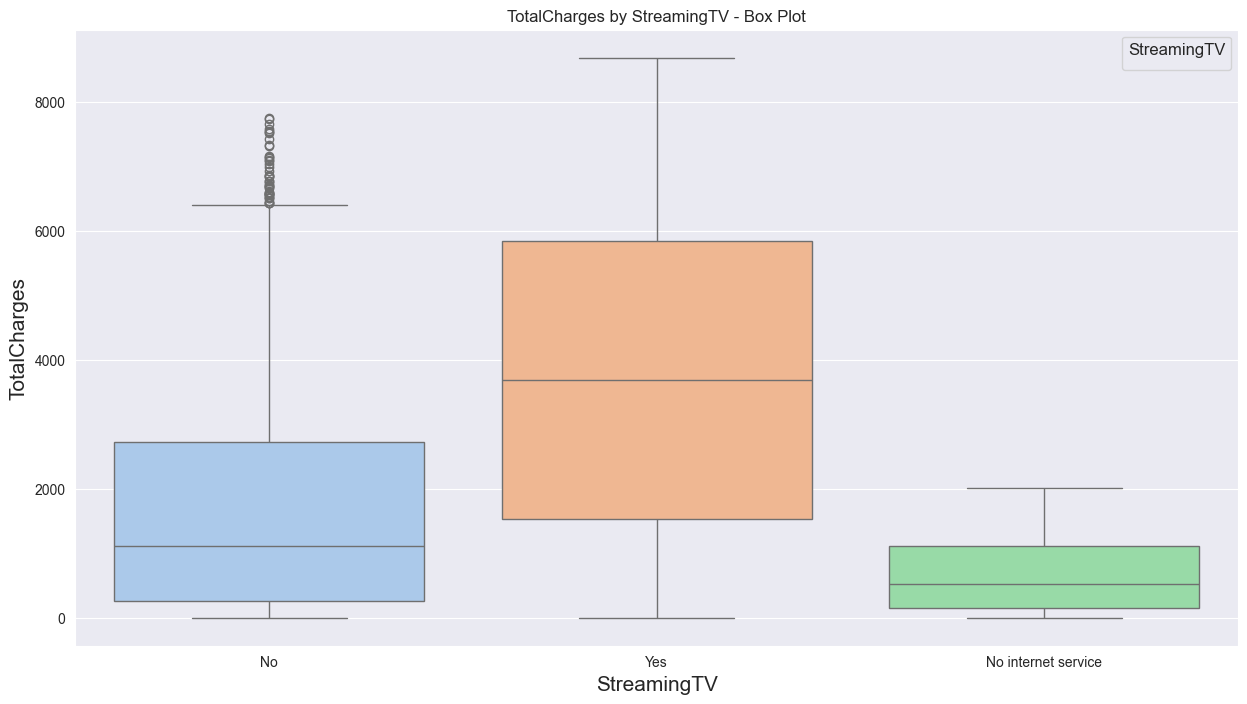

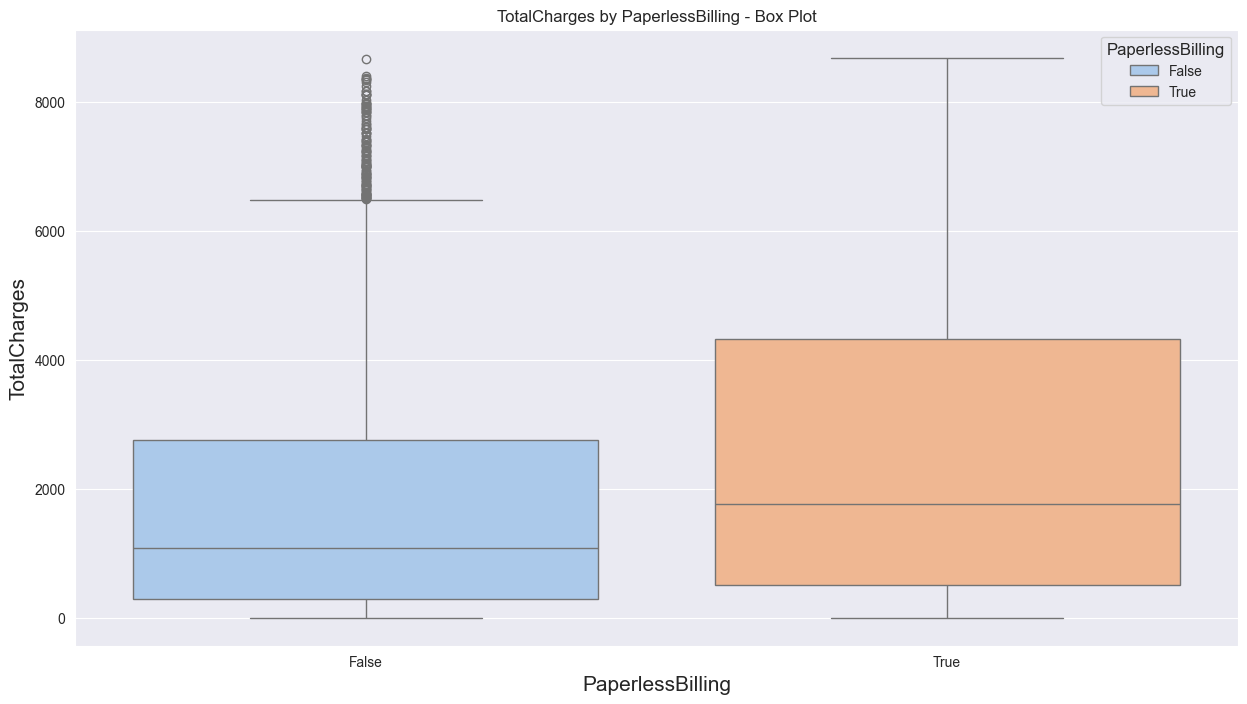

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


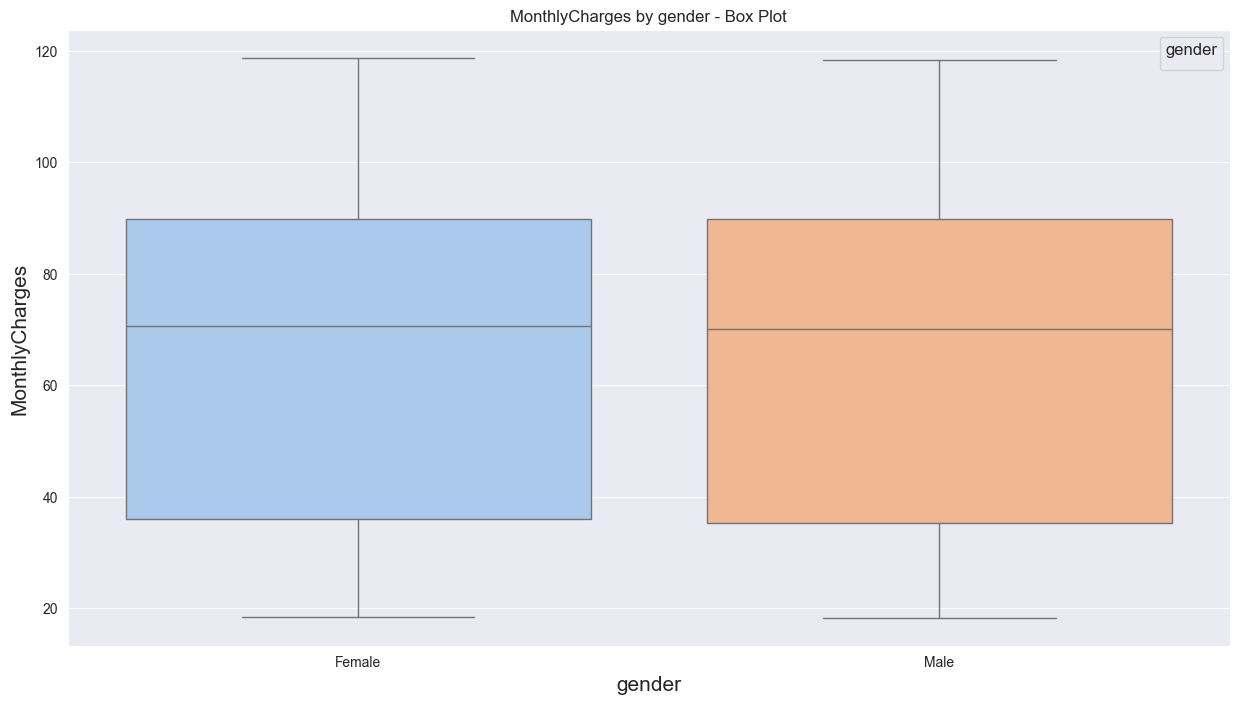

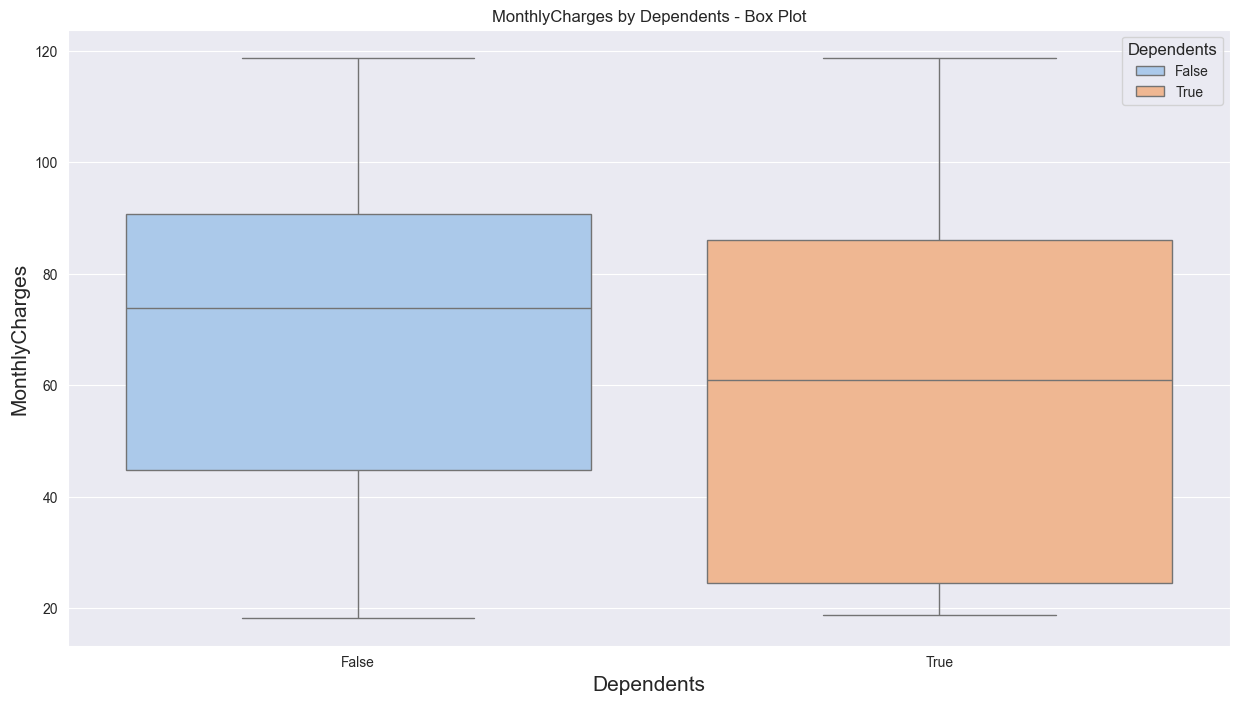

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


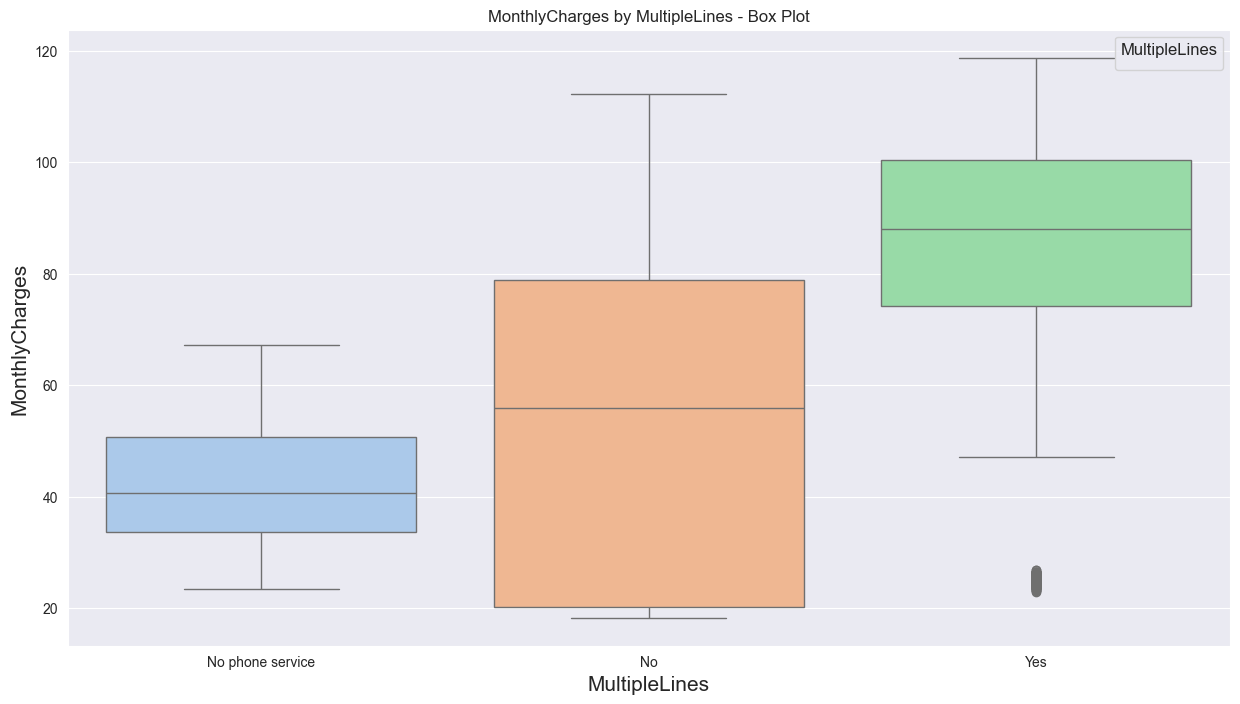

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


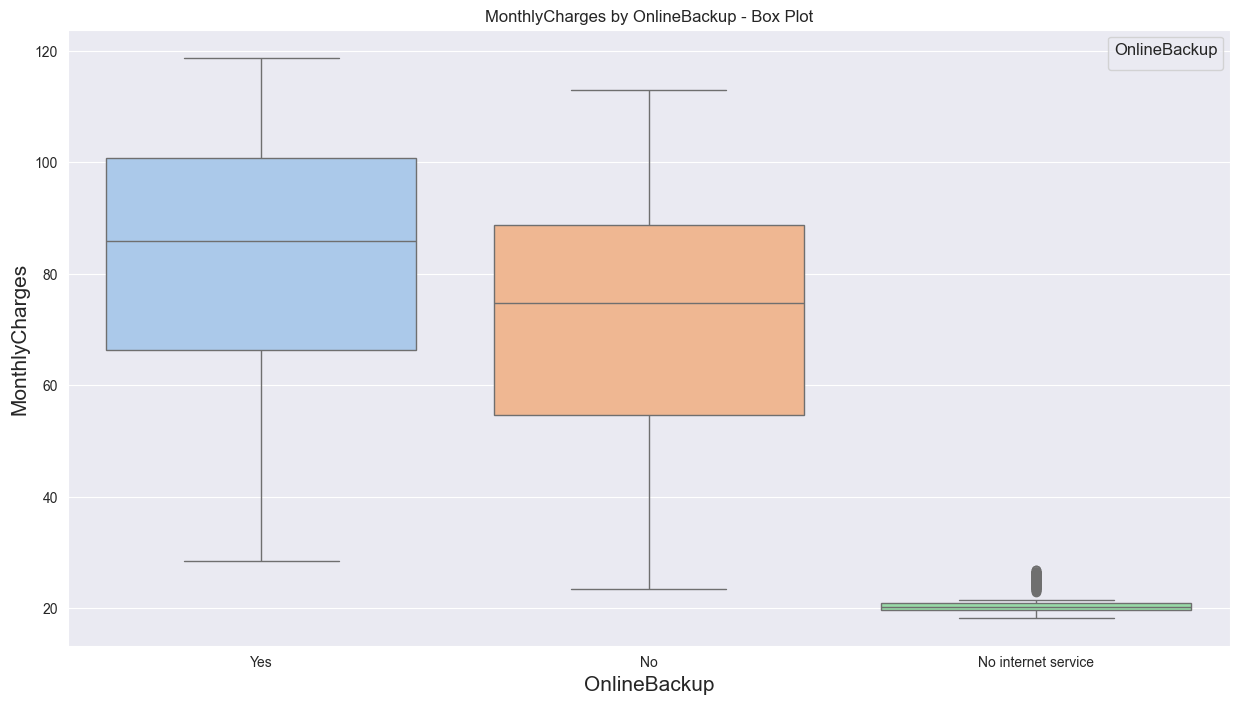

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


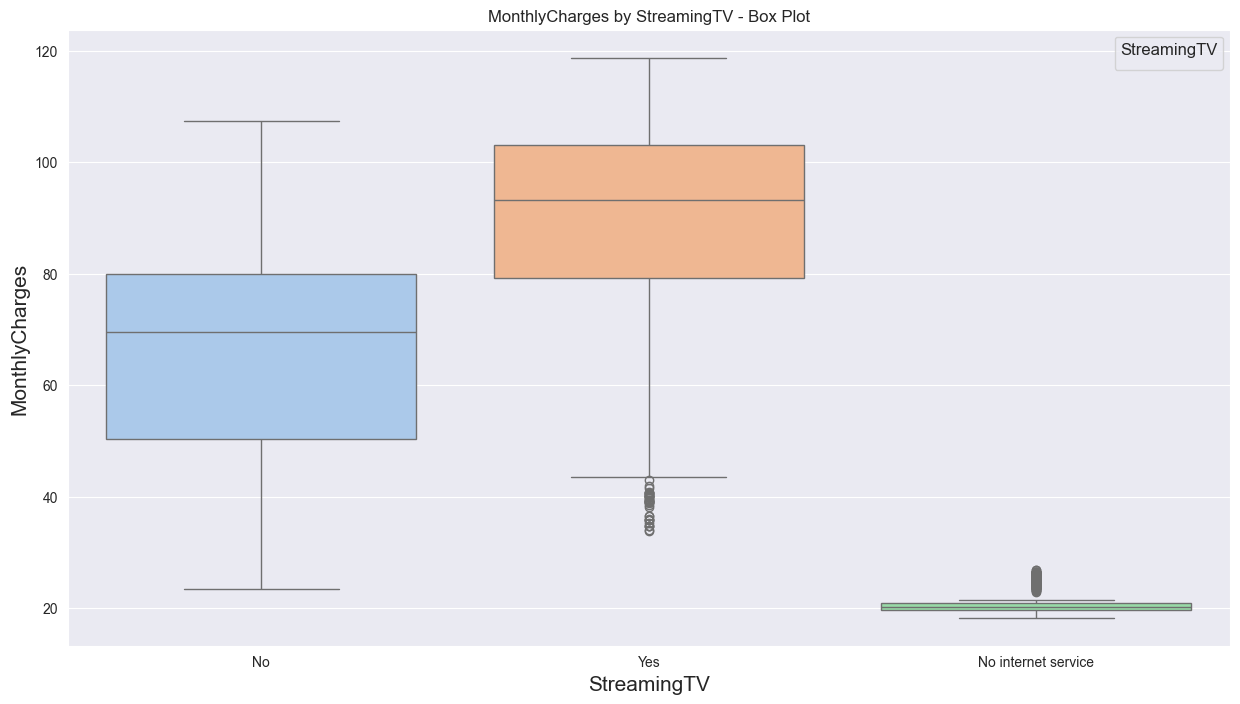

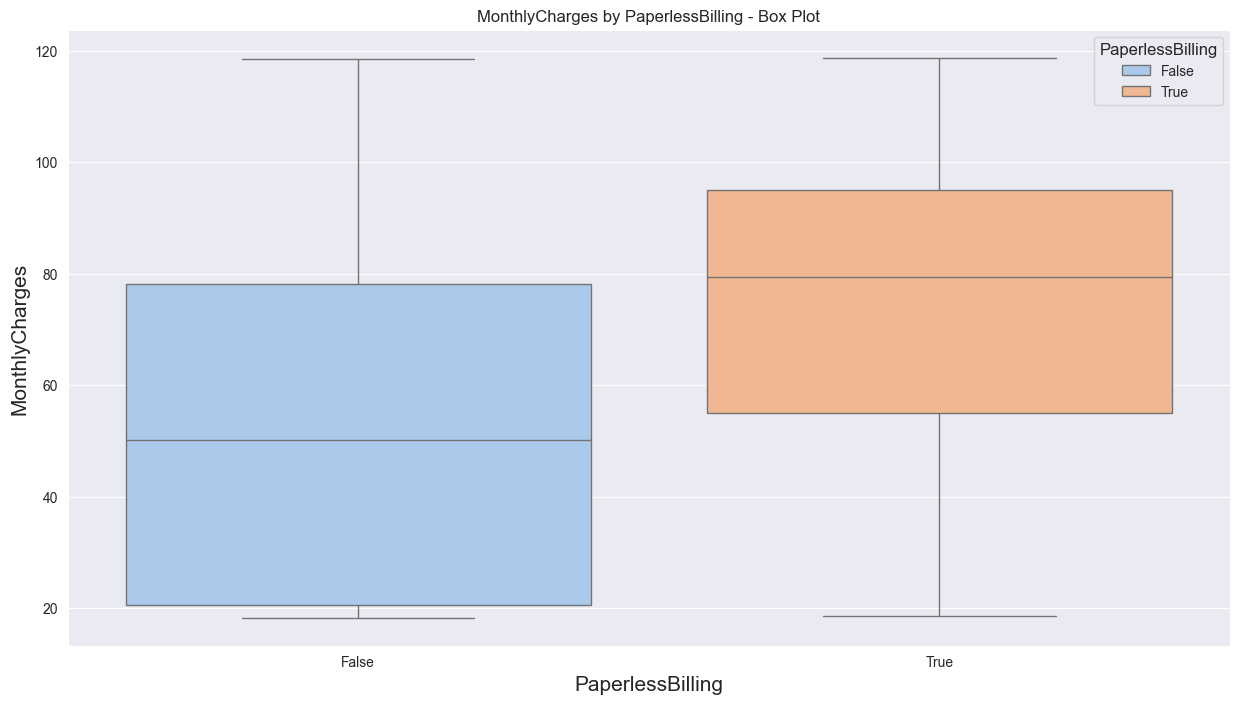

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


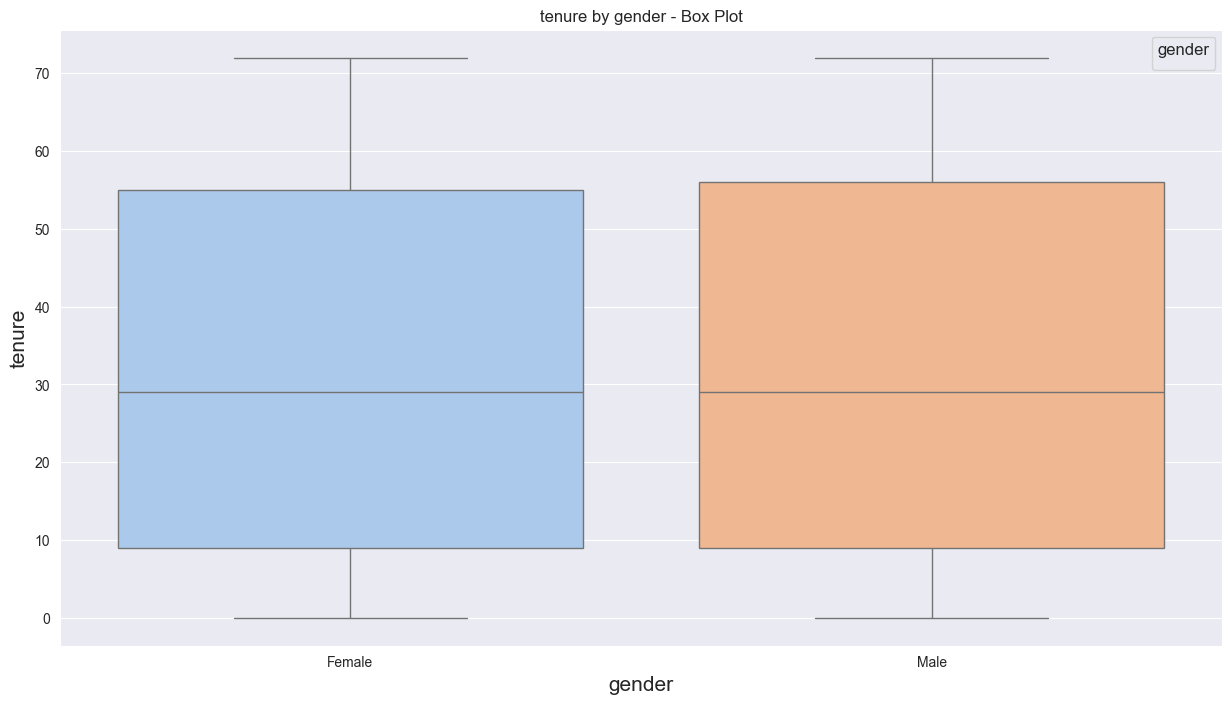

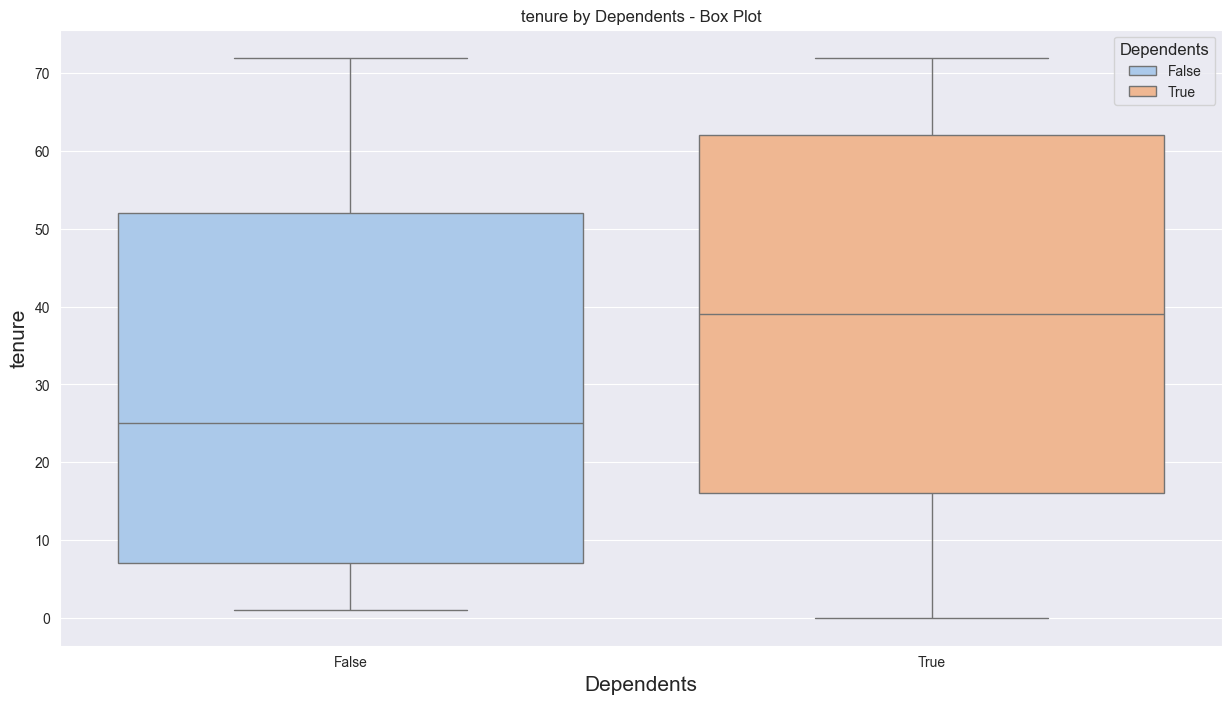

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


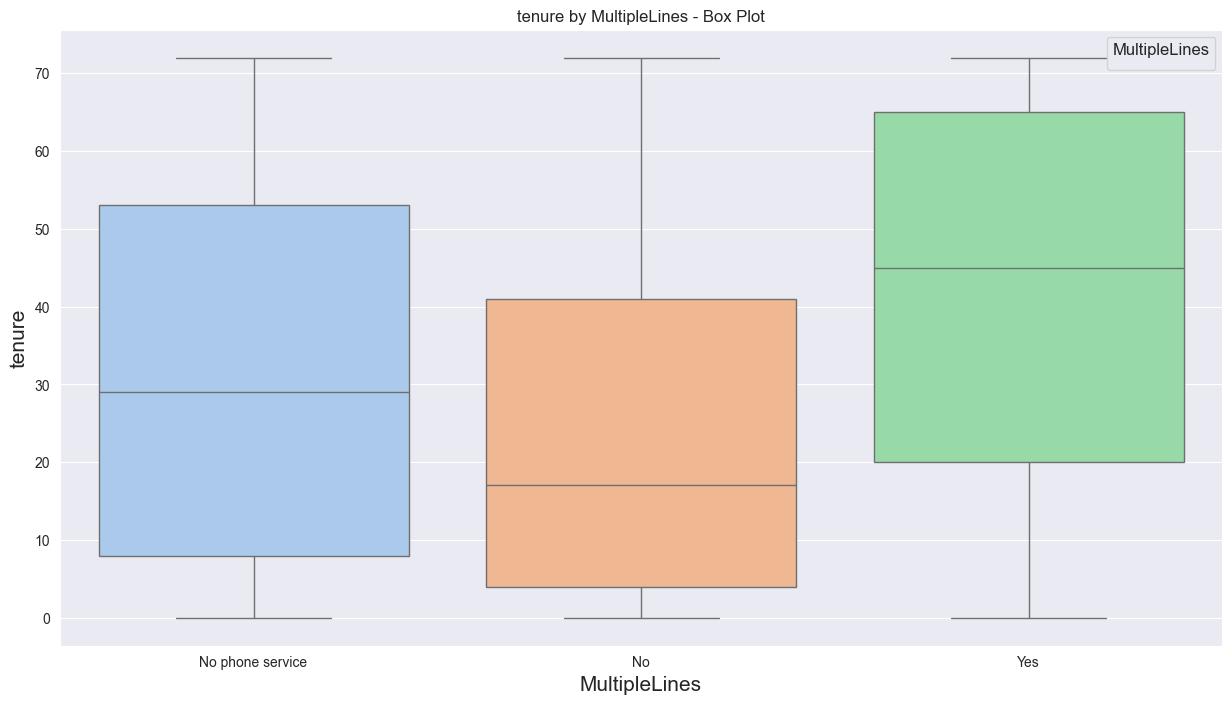

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


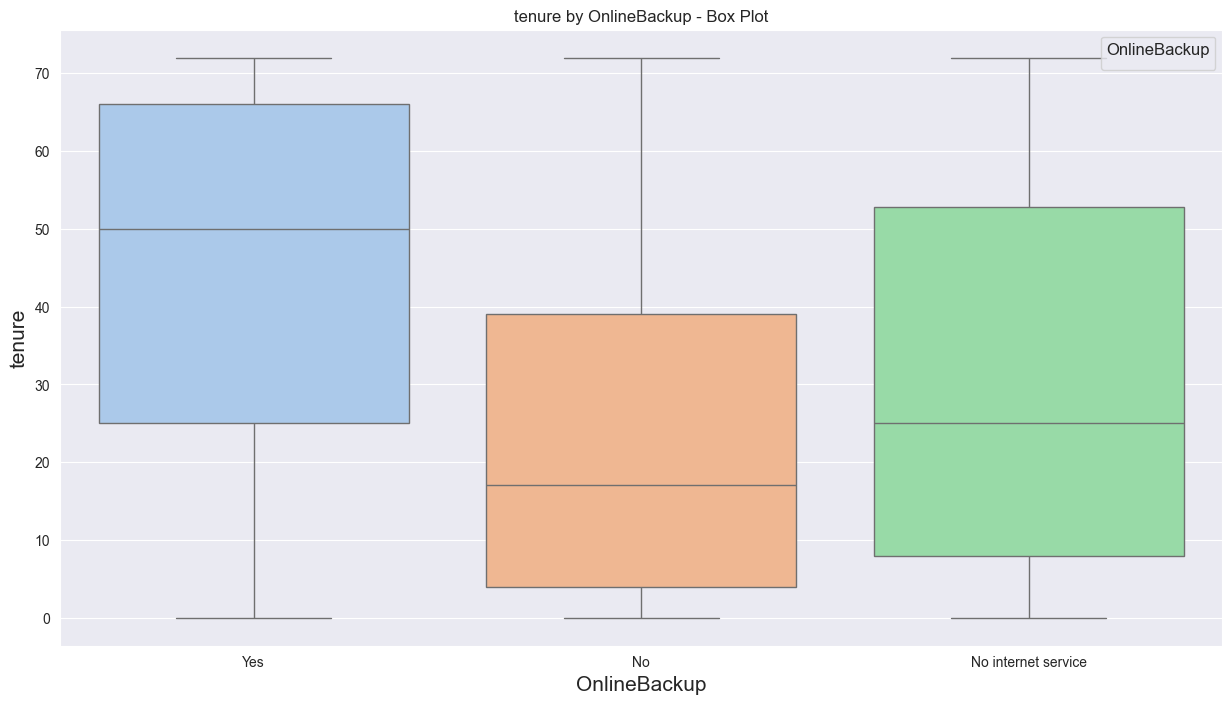

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


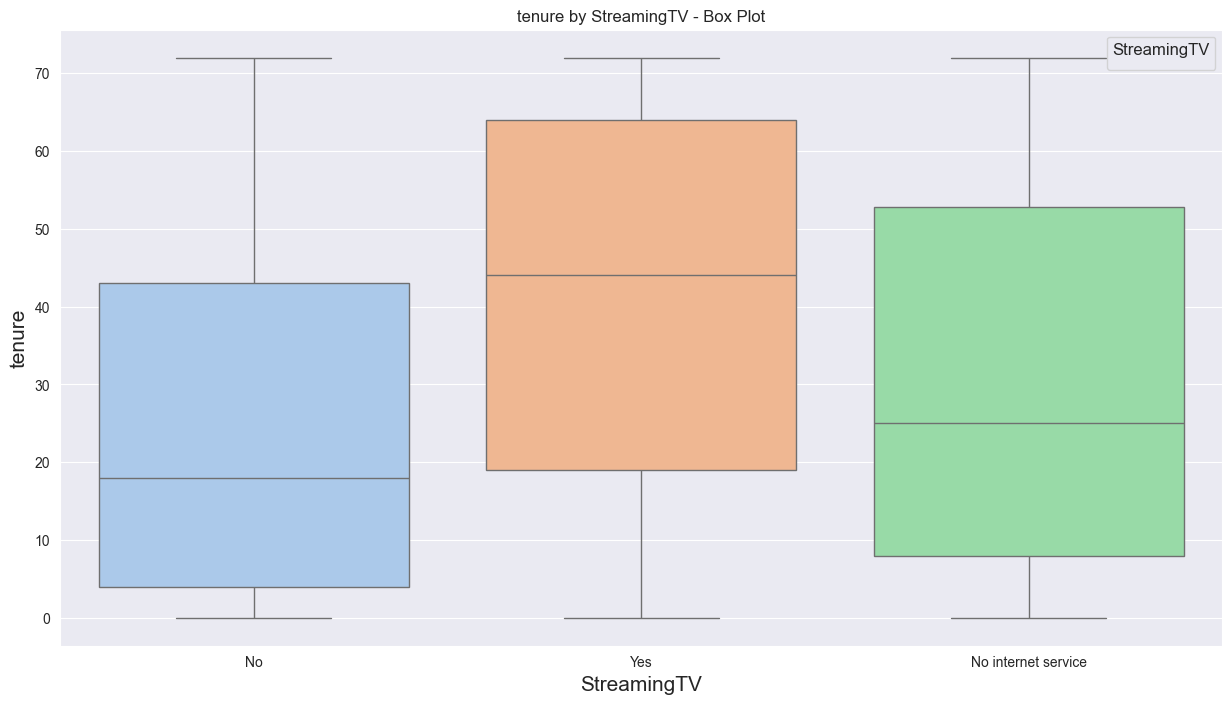

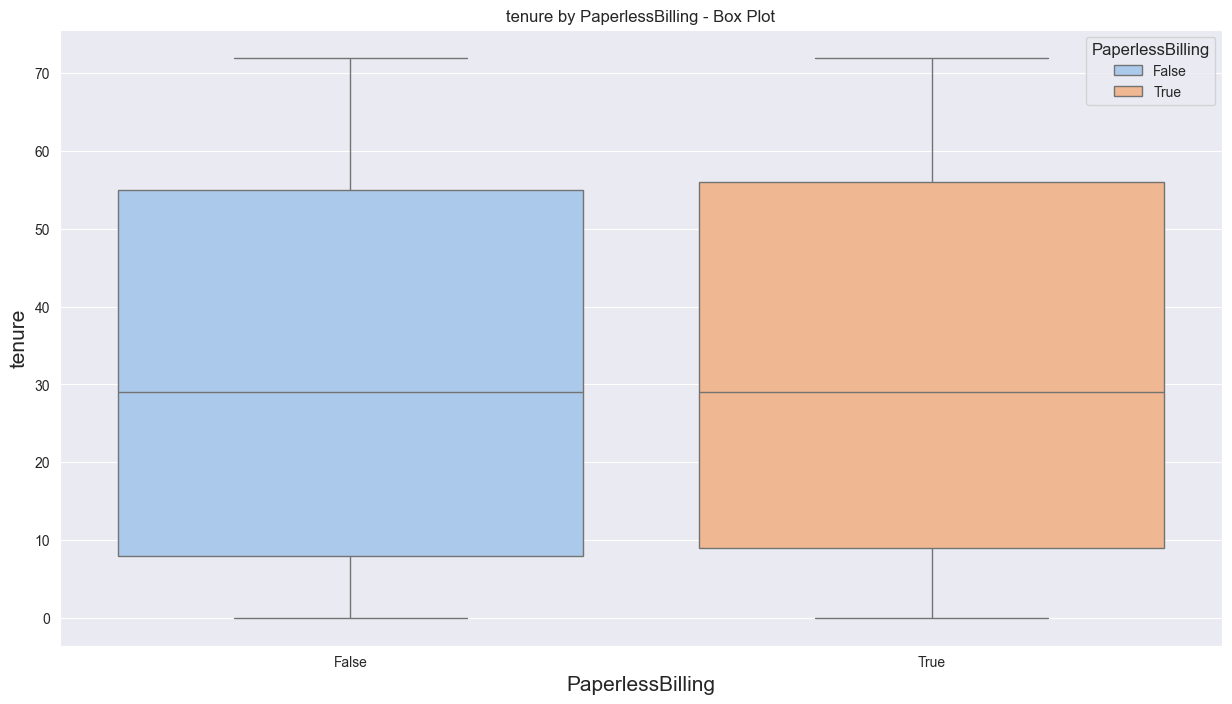

In [135]:
plot_distributions(categorical_vars, numerical_vars, dataframe, "box")

### Violin

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


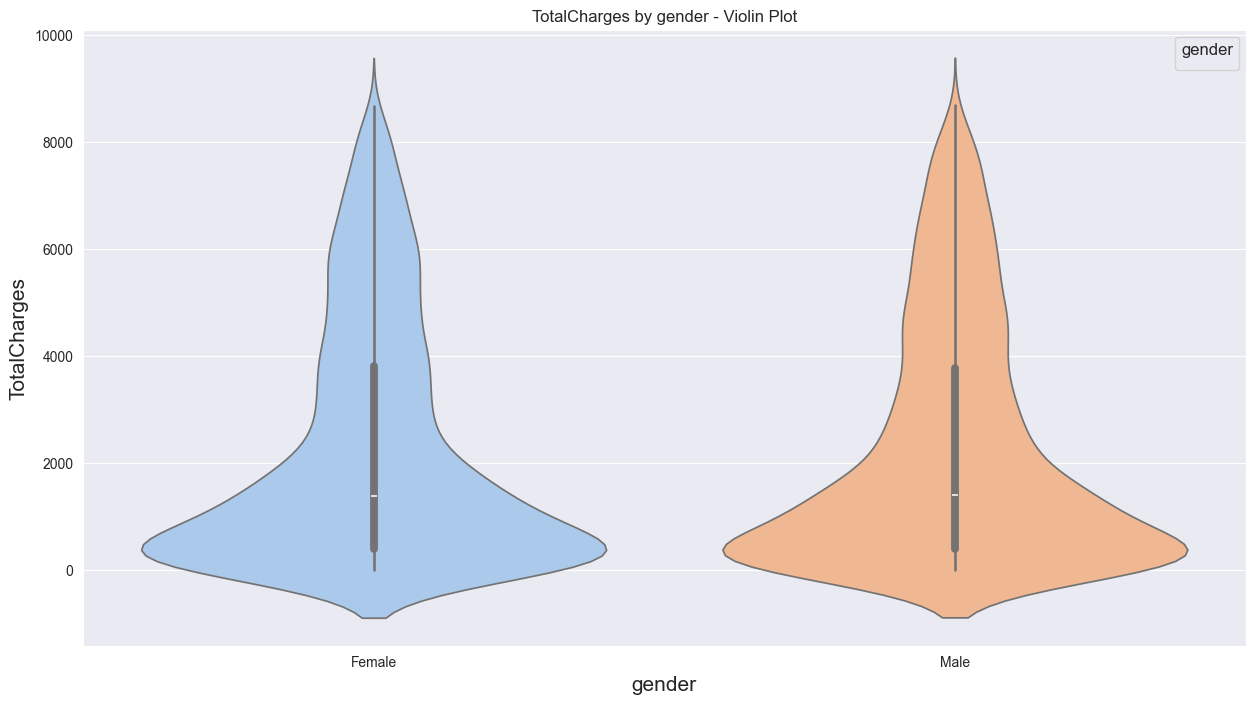

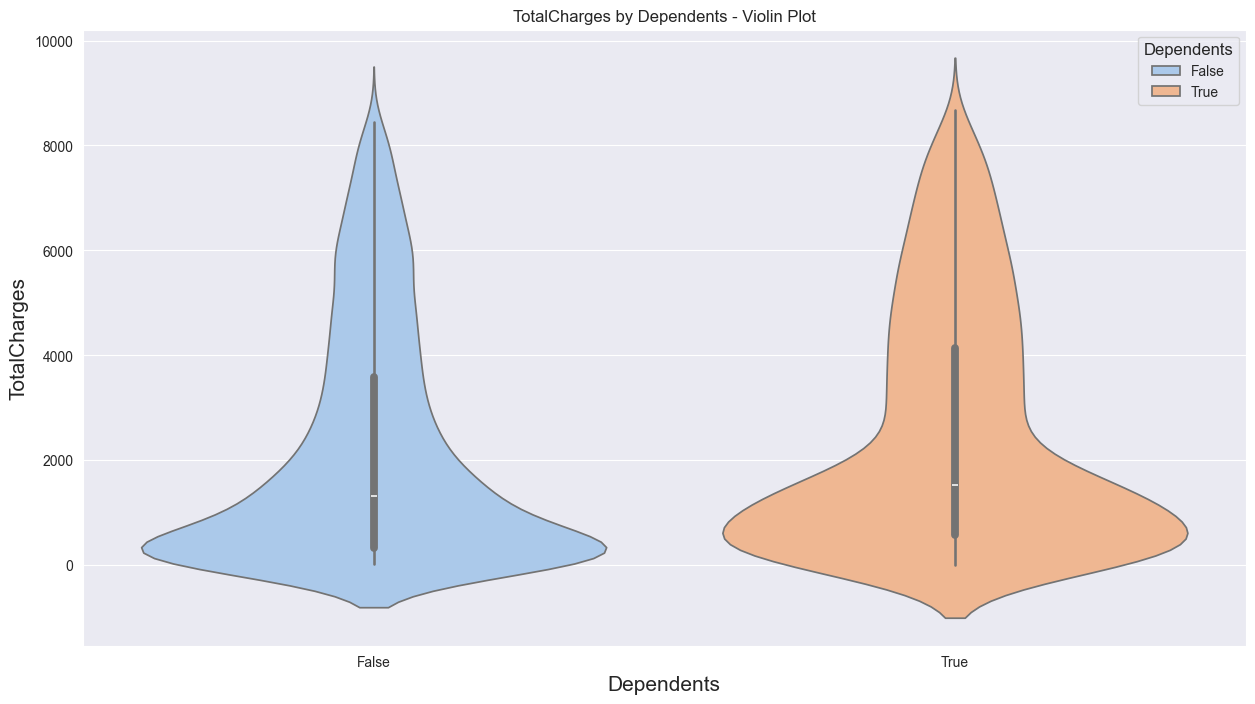

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


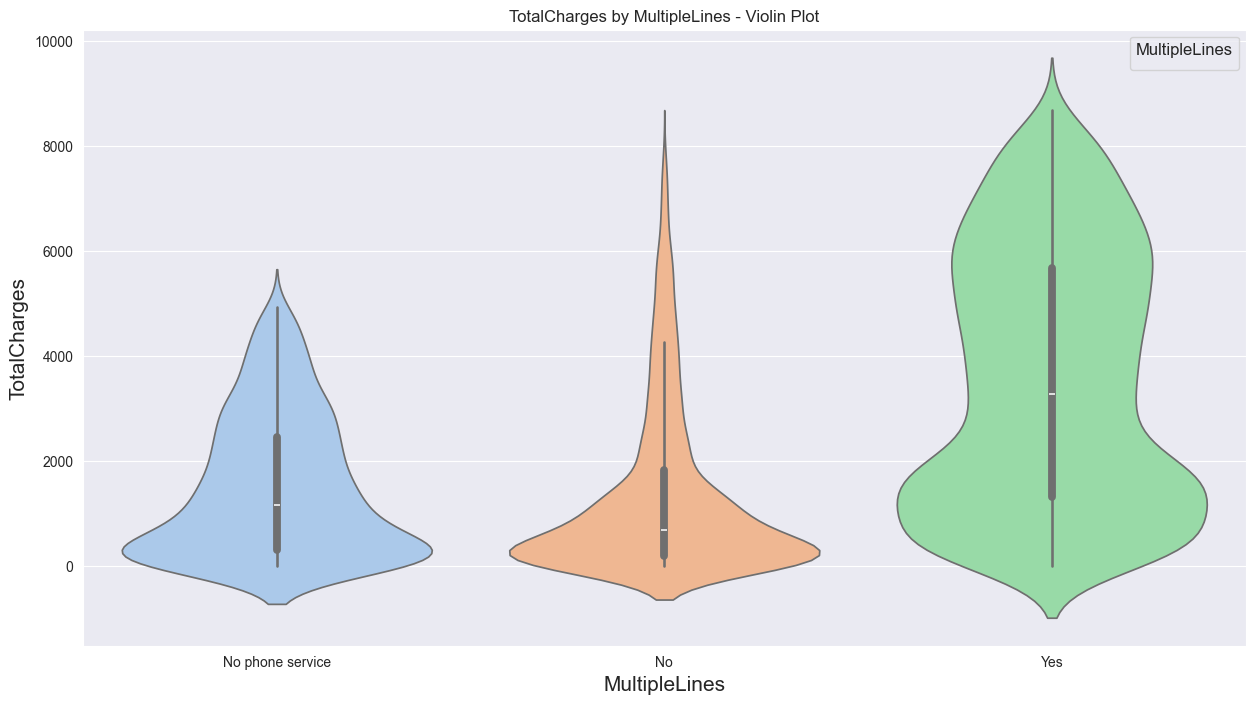

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


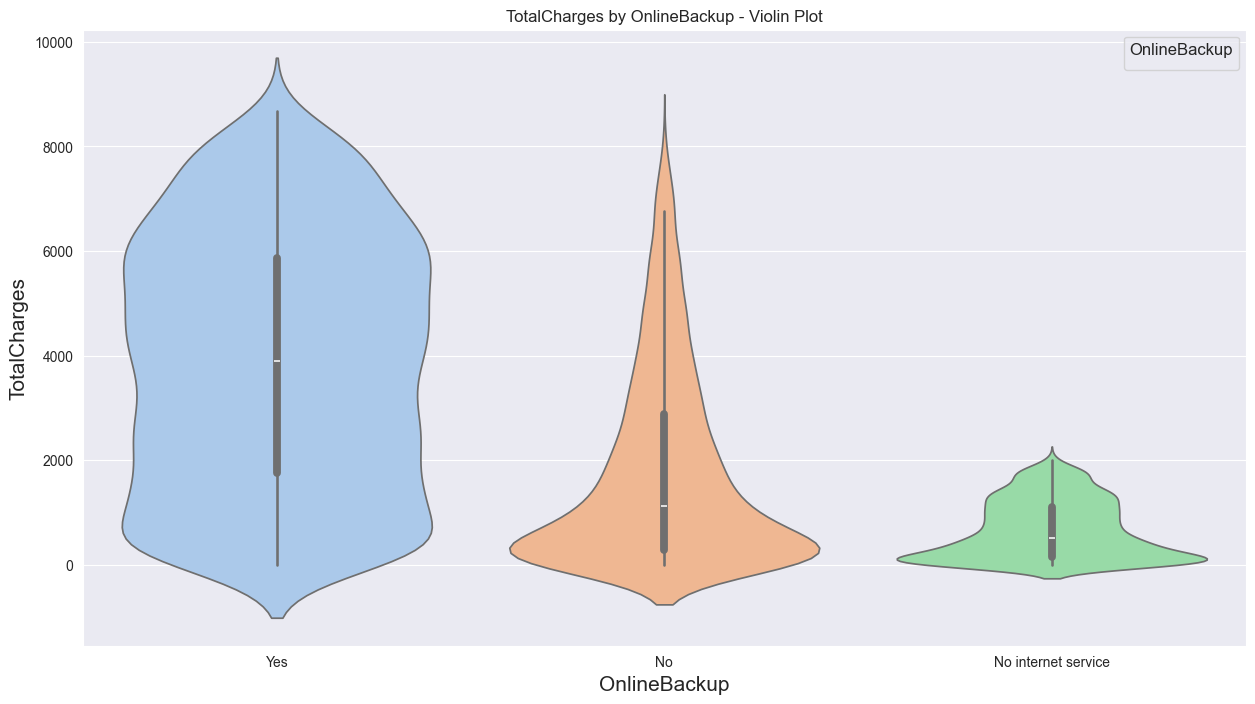

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


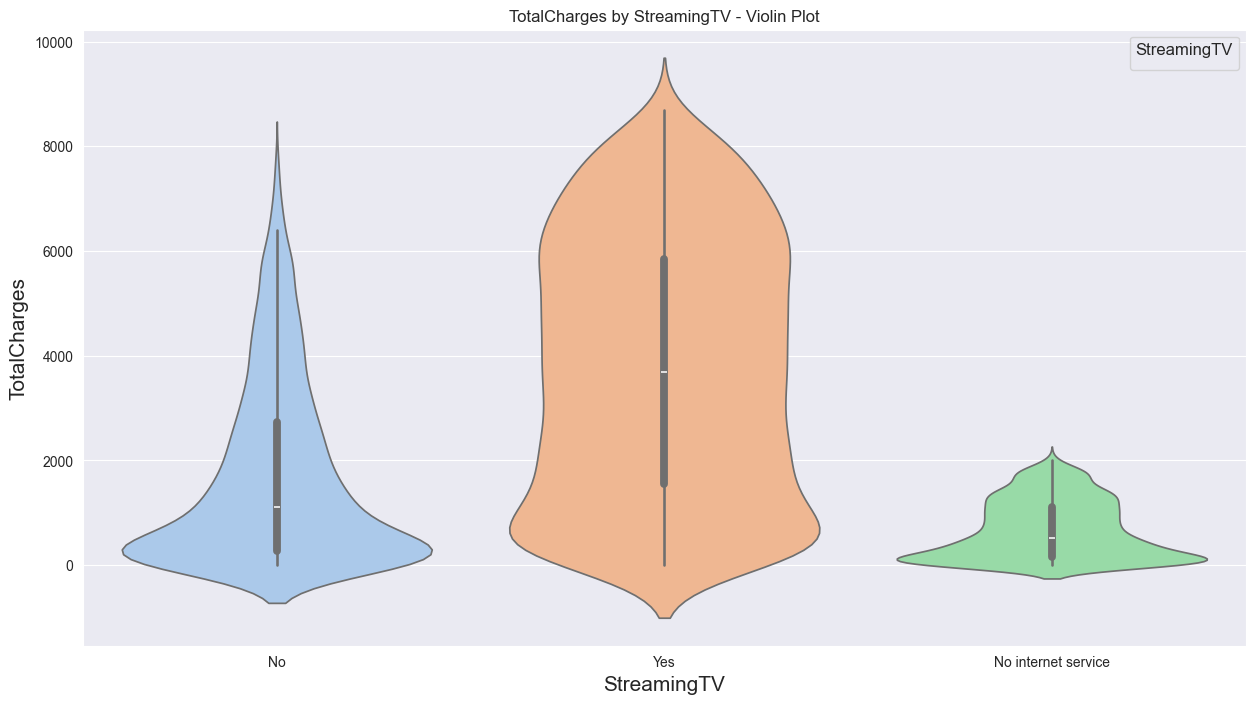

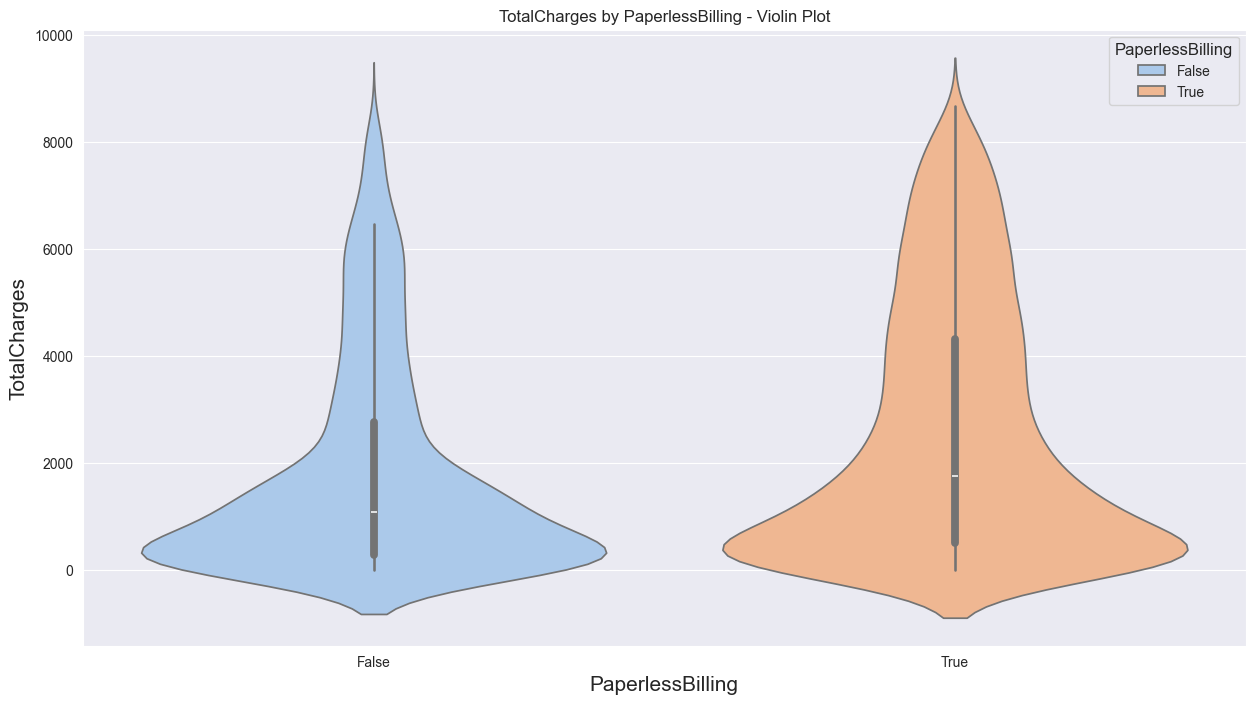

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


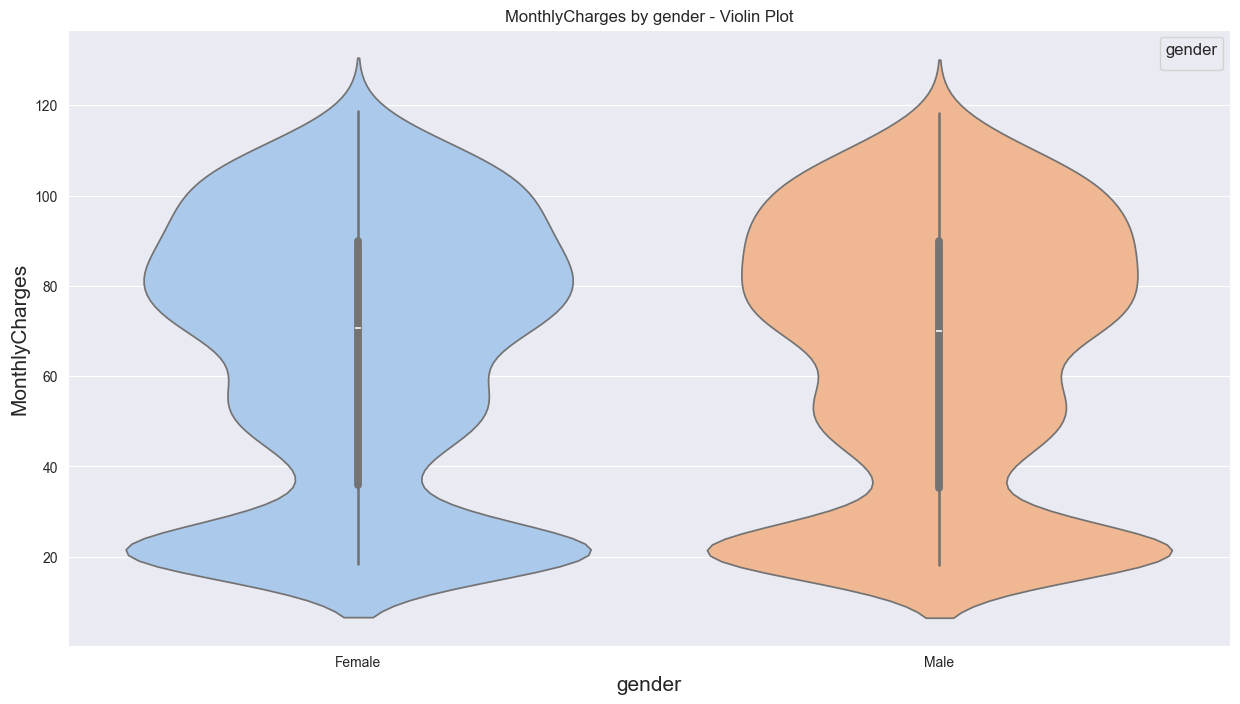

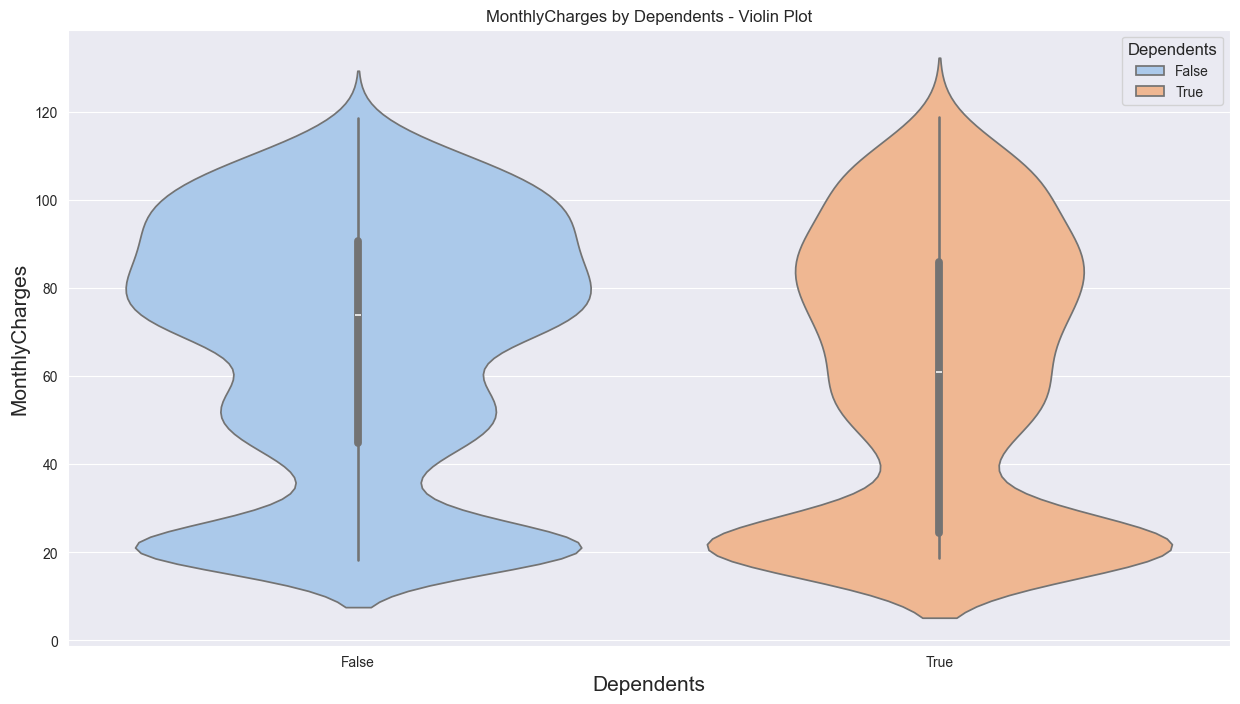

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


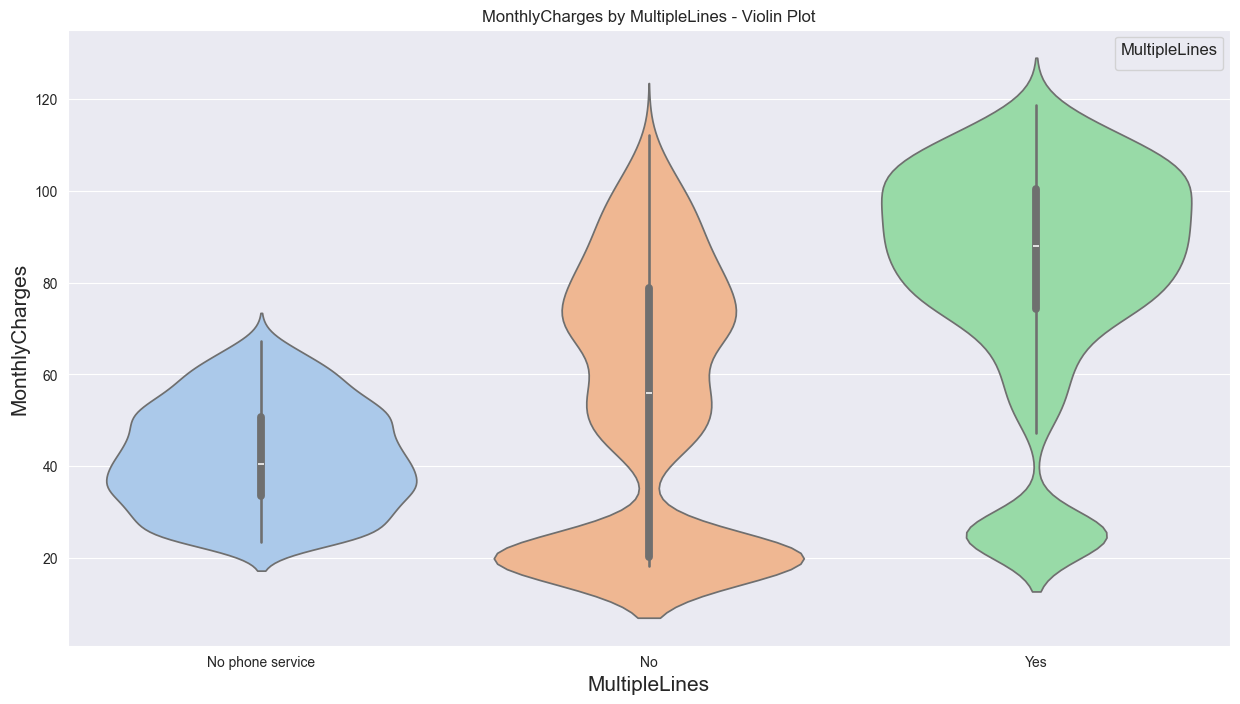

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


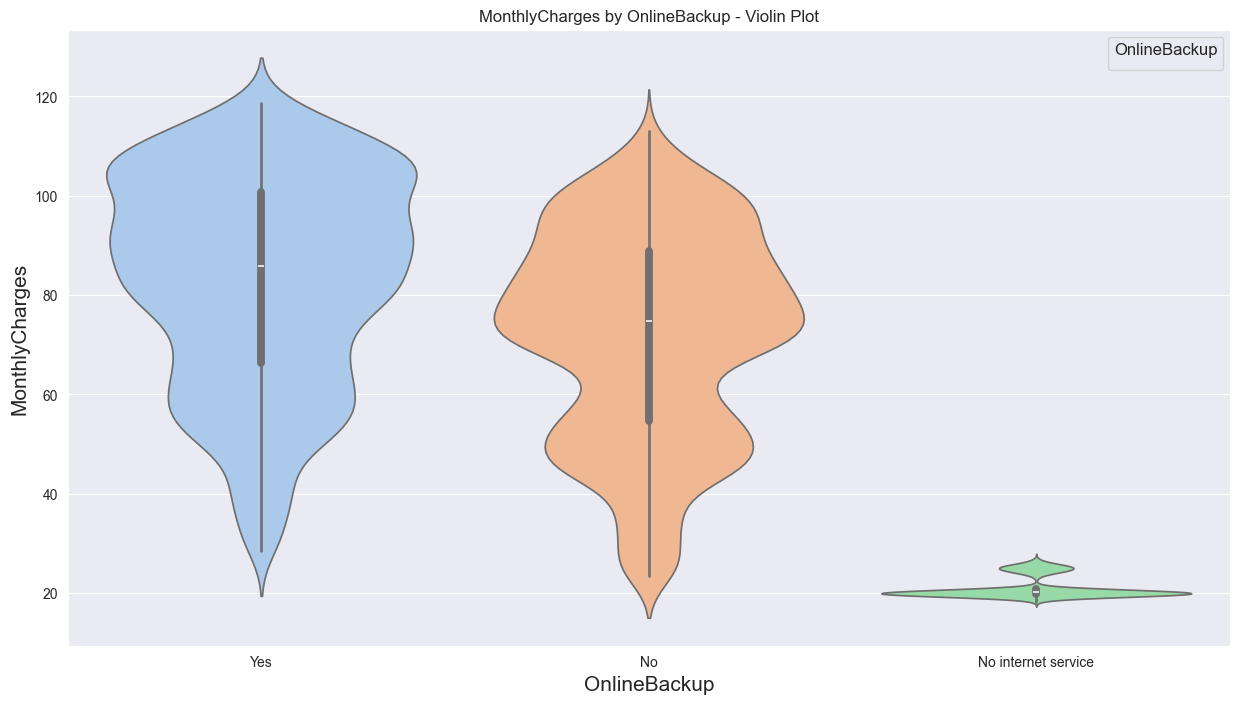

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


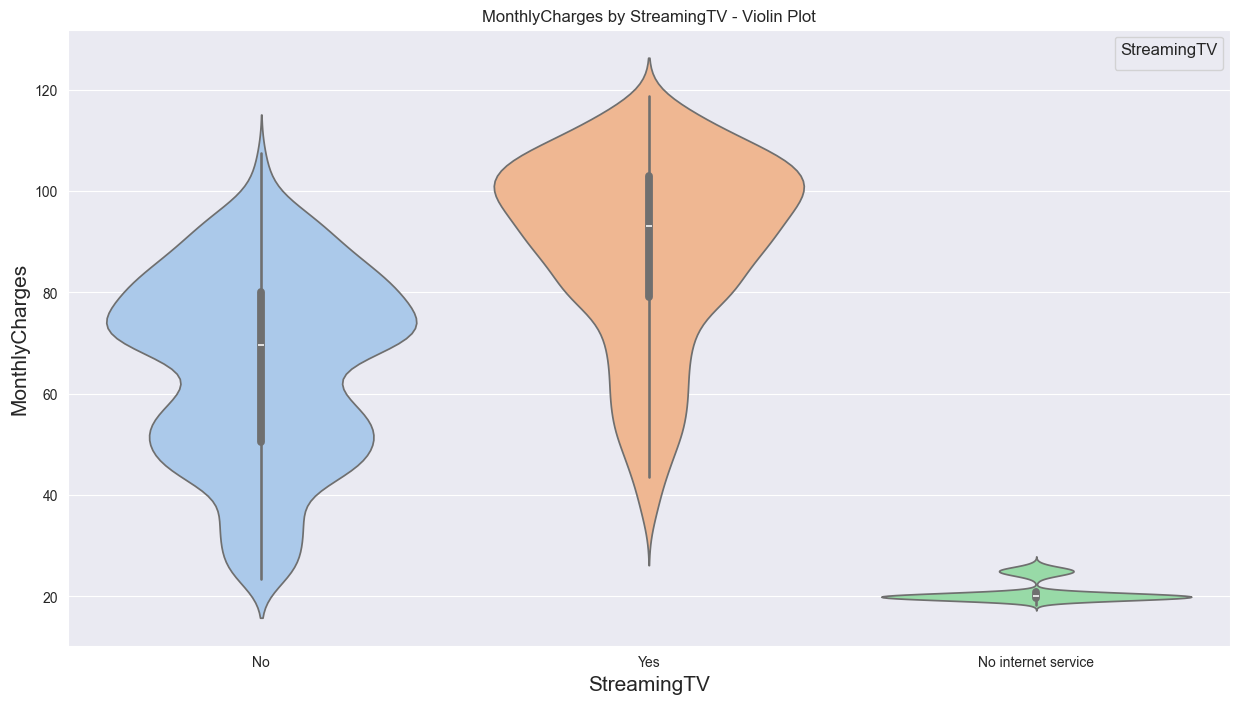

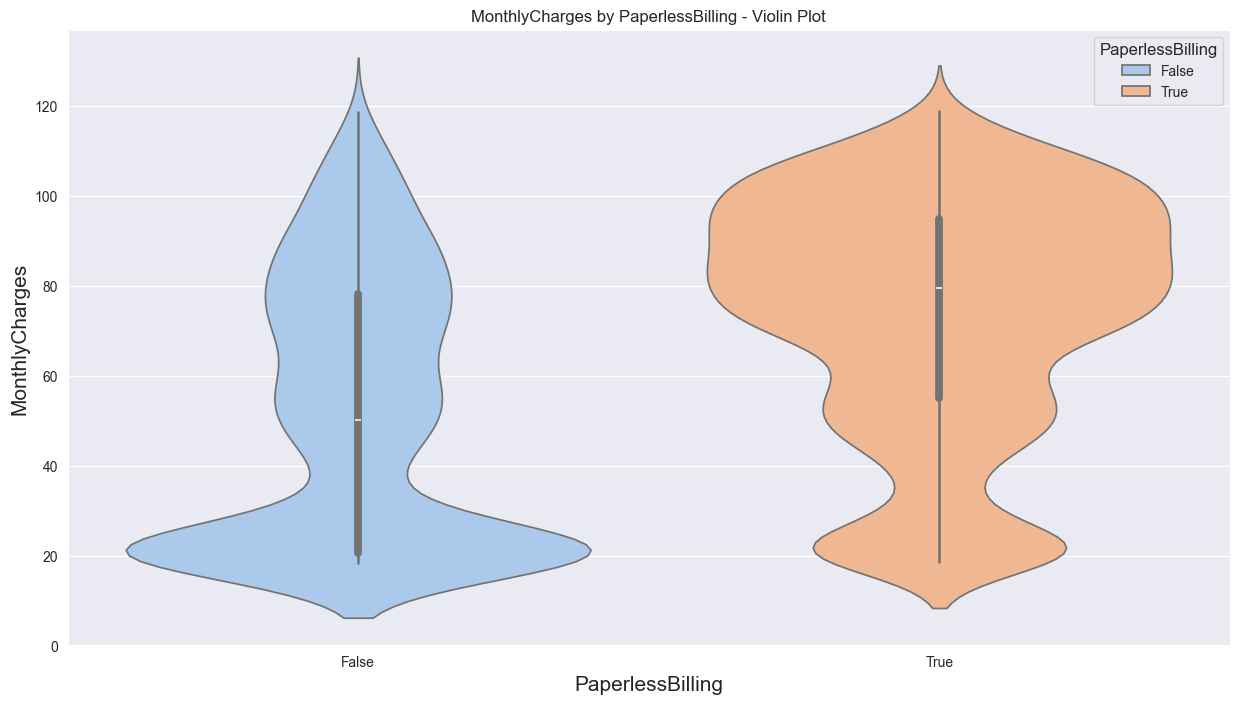

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


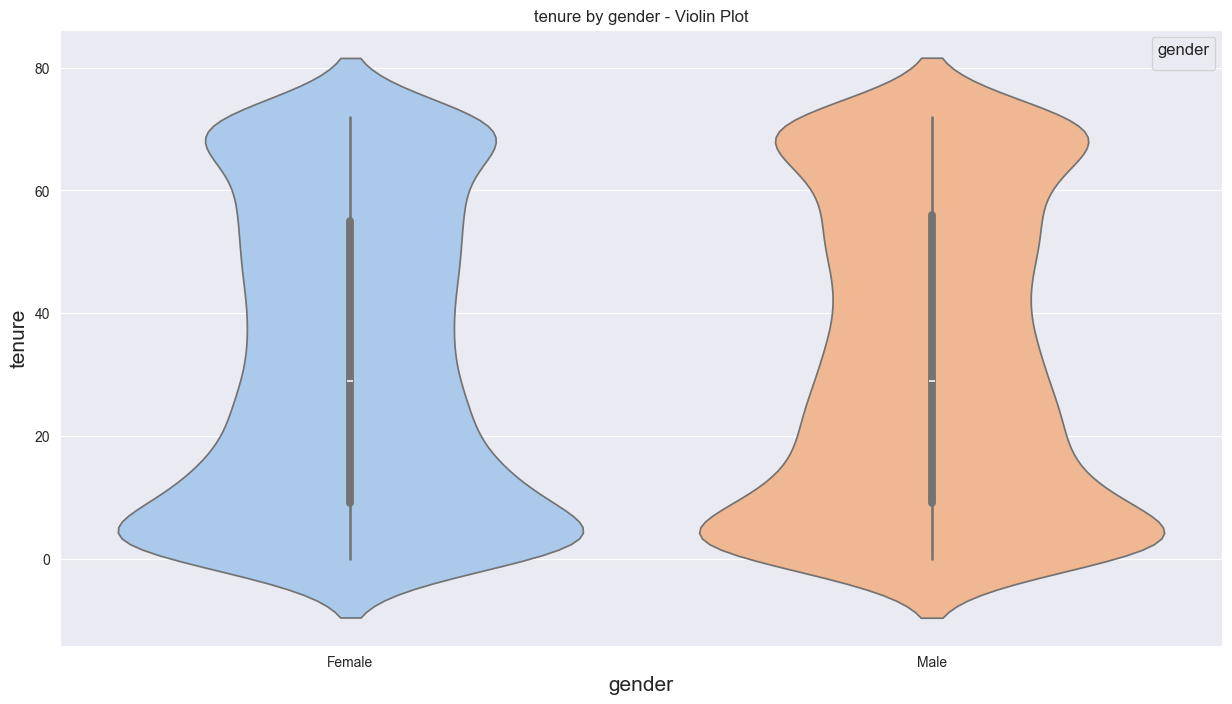

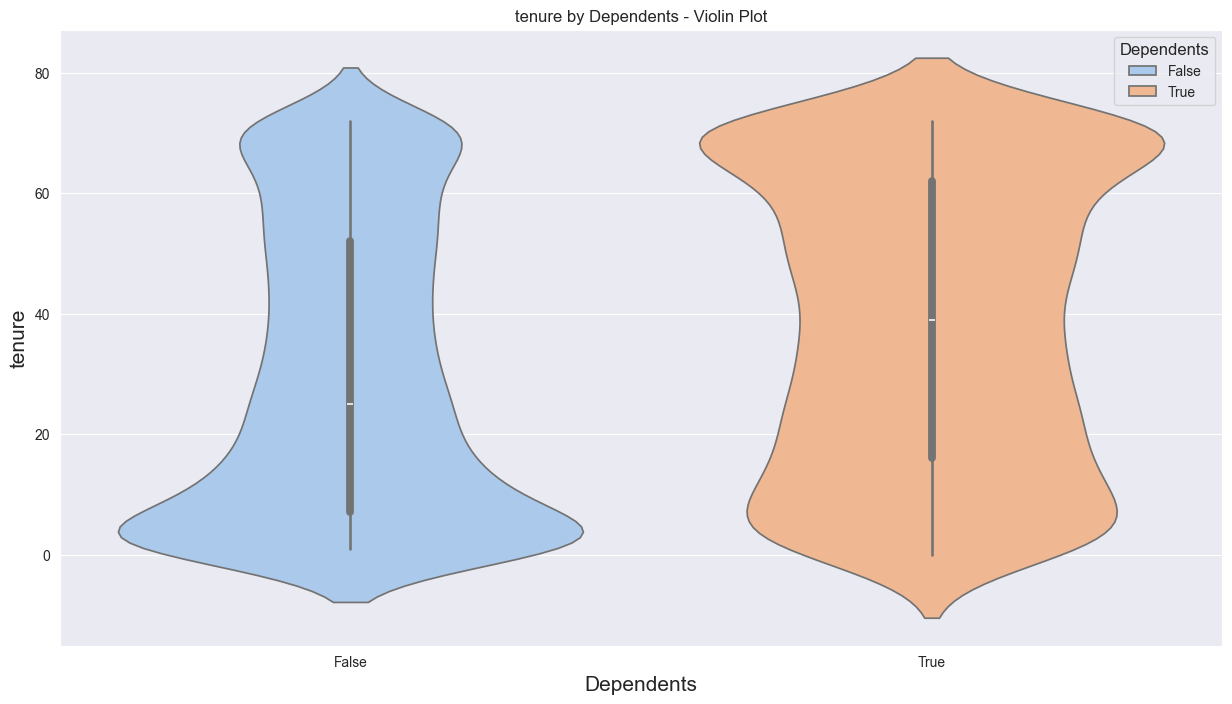

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


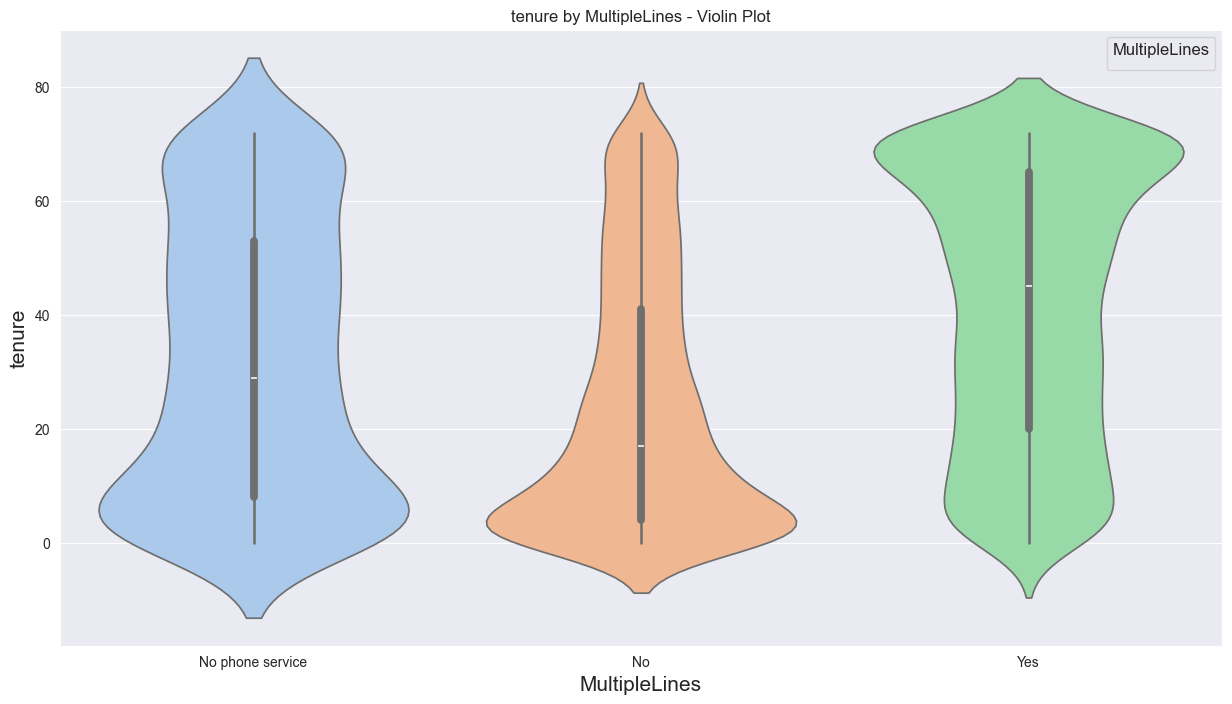

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


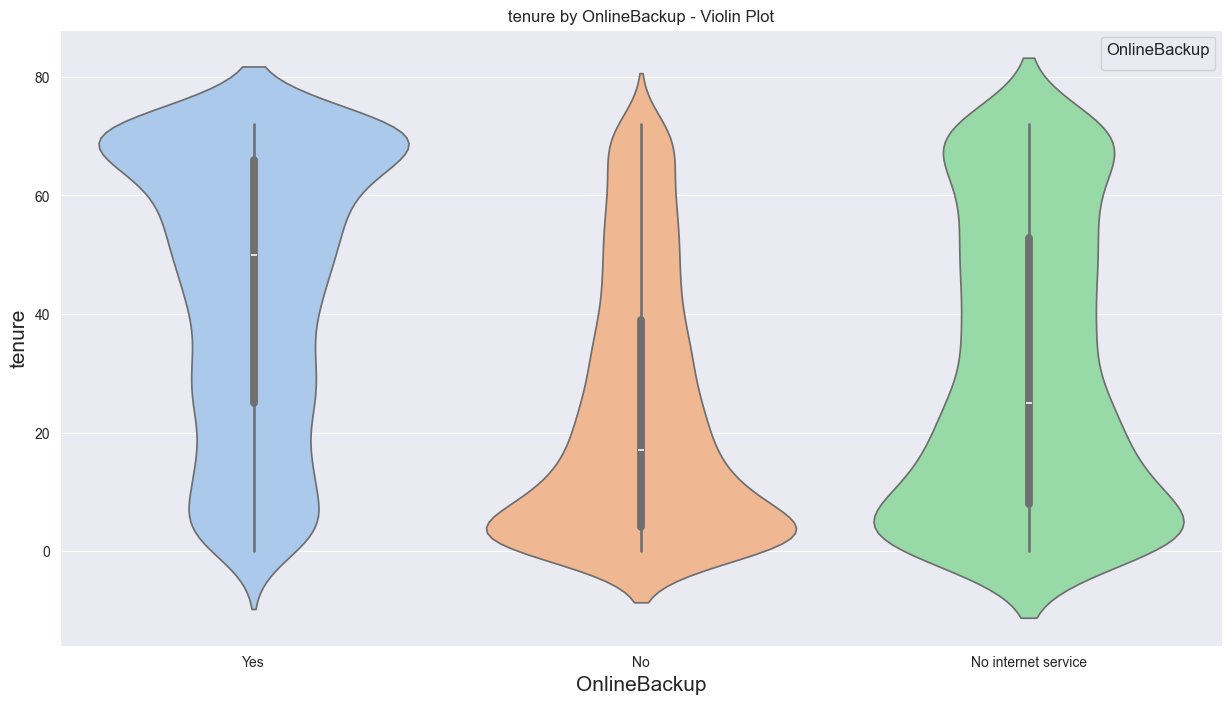

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


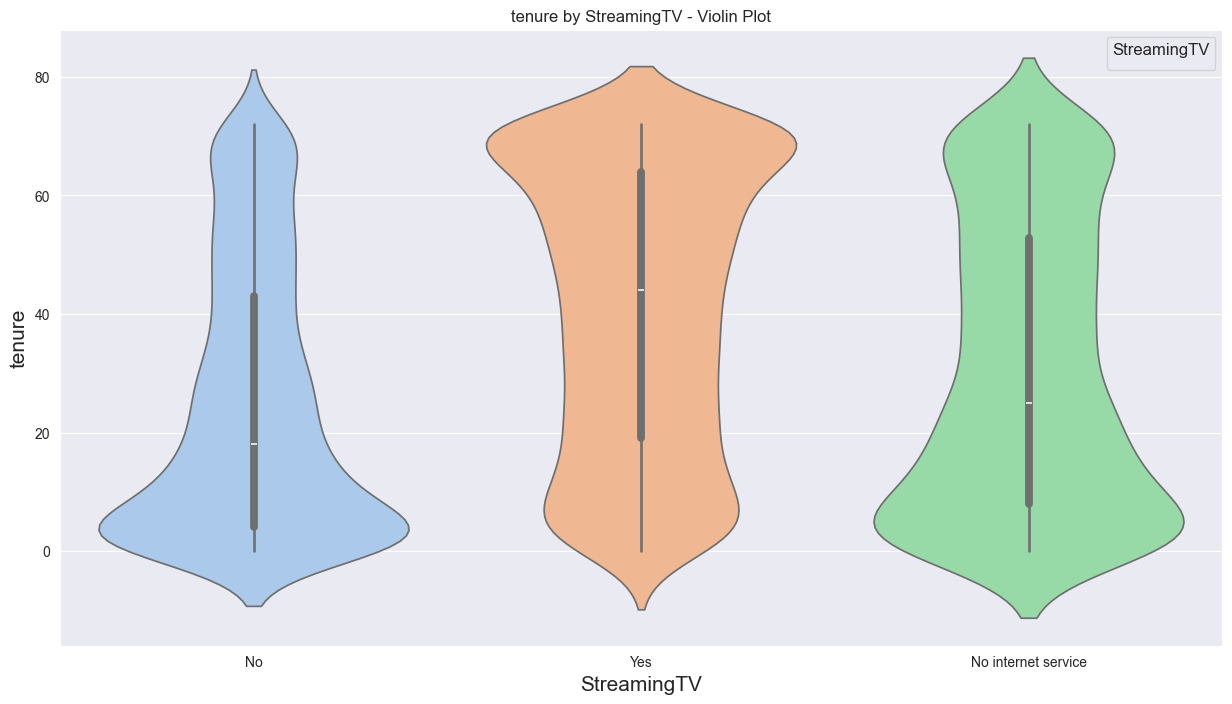

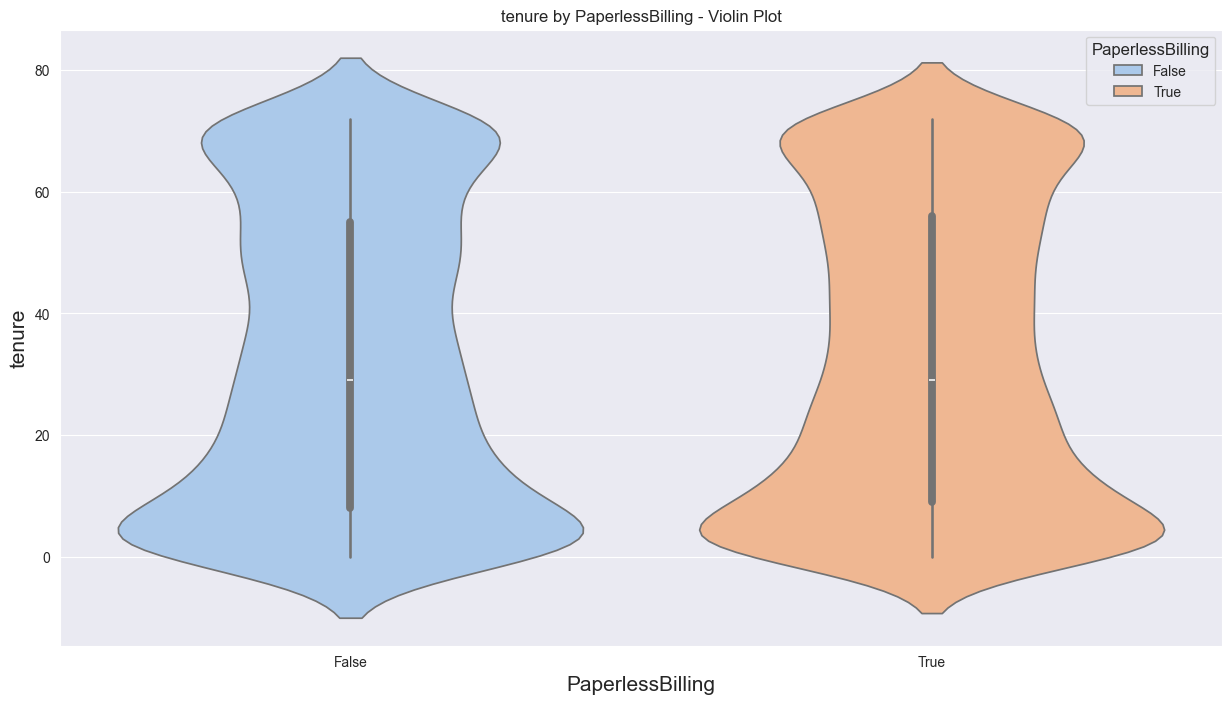

In [136]:
plot_distributions(categorical_vars, numerical_vars, dataframe, "violin")

### Swarm

In [137]:
## WARNING: This function can take a long time to execute with large datasets
# because swarm plots are computationally intensive. They place each individual
# data point on the plot, which requires heavy computation for positioning
# without overlaps.

# plot_distributions(categorical_vars, numerical_vars, dataframe, "swarm")

## Statistical Tests

### Analyze normal distribution
**Shapiro-Wilk test**

In [138]:
def perform_shapiro_wilk_test(
    subset: pd.Series, category: str, categorical_var: str
):
    stat, p = shapiro(subset)
    print(
        f"Shapiro-Wilk test for {category} in {categorical_var}: Stat={stat}, P-value={p}"
    )
    alpha: float = 0.05
    if p > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")


def check_normality(
    data: pd.DataFrame, categorical_var: str, numerical_var: str
):
    categories = data[categorical_var].unique()
    for category in categories:
        print(f"\nChecking normality for {category} in {categorical_var}")
        subset: pd.Series = data[data[categorical_var] == category][
            numerical_var
        ]
        perform_shapiro_wilk_test(subset, category, categorical_var)
        plot_histogram(subset, category, categorical_var, numerical_var)
        plot_qq_plot(subset, category, categorical_var, numerical_var)

Testing normality for TotalCharges across gender

Checking normality for Female in gender
Shapiro-Wilk test for Female in gender: Stat=0.8584659317898915, P-value=1.5350863282053402e-48
Sample does not look Gaussian (reject H0)


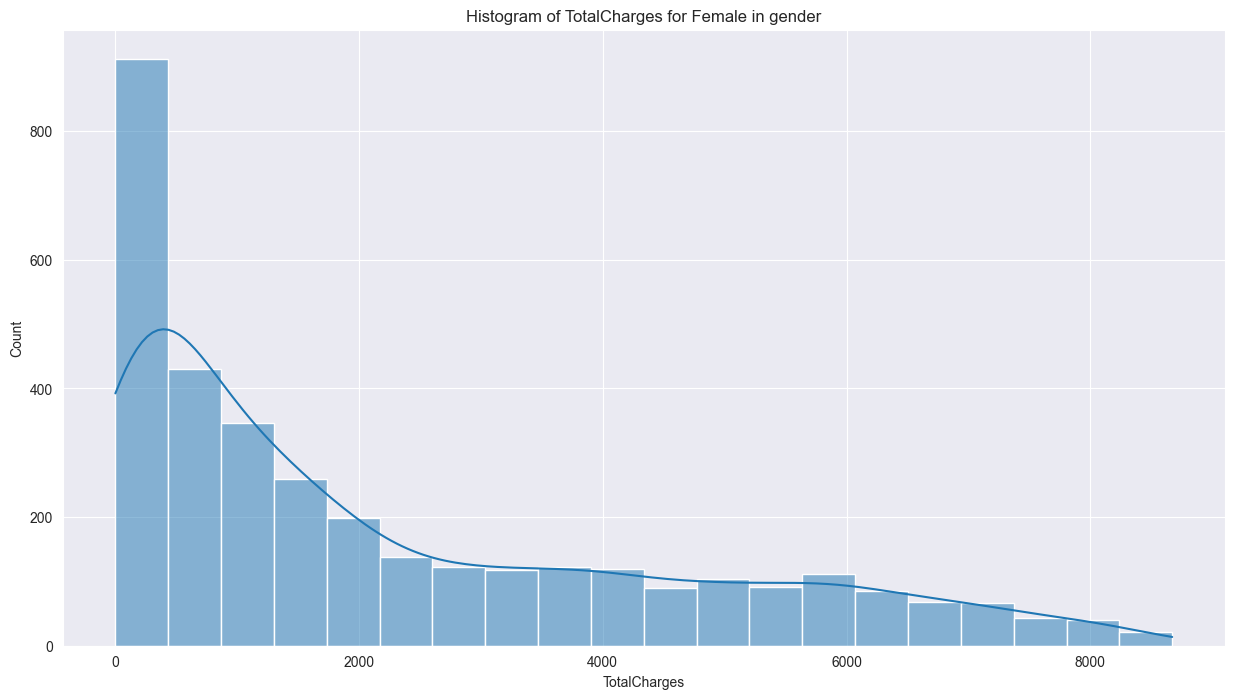

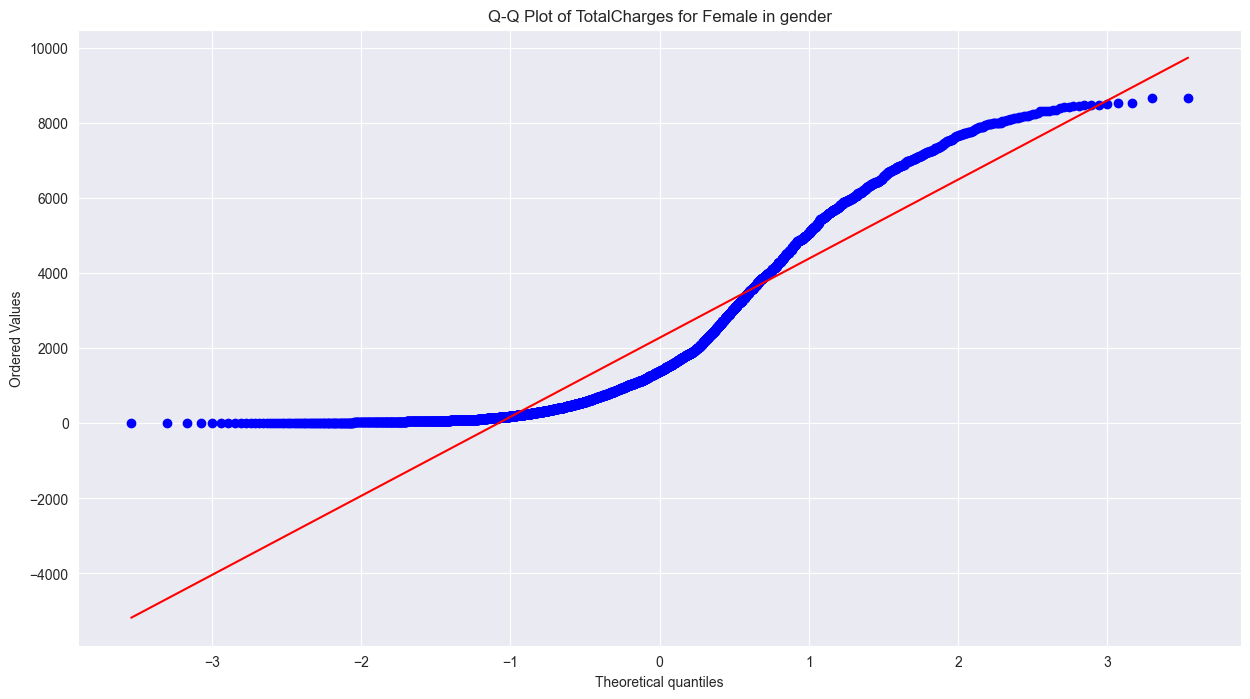


Checking normality for Male in gender
Shapiro-Wilk test for Male in gender: Stat=0.8616443007475942, P-value=1.658643255547116e-48
Sample does not look Gaussian (reject H0)


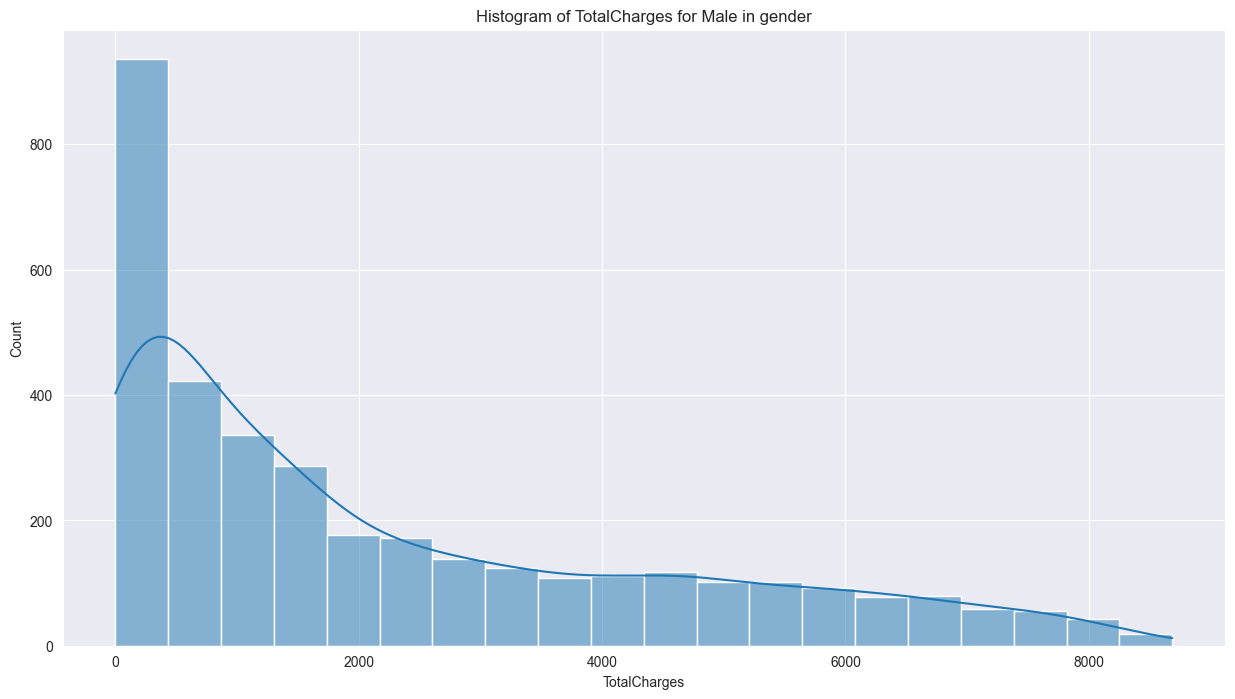

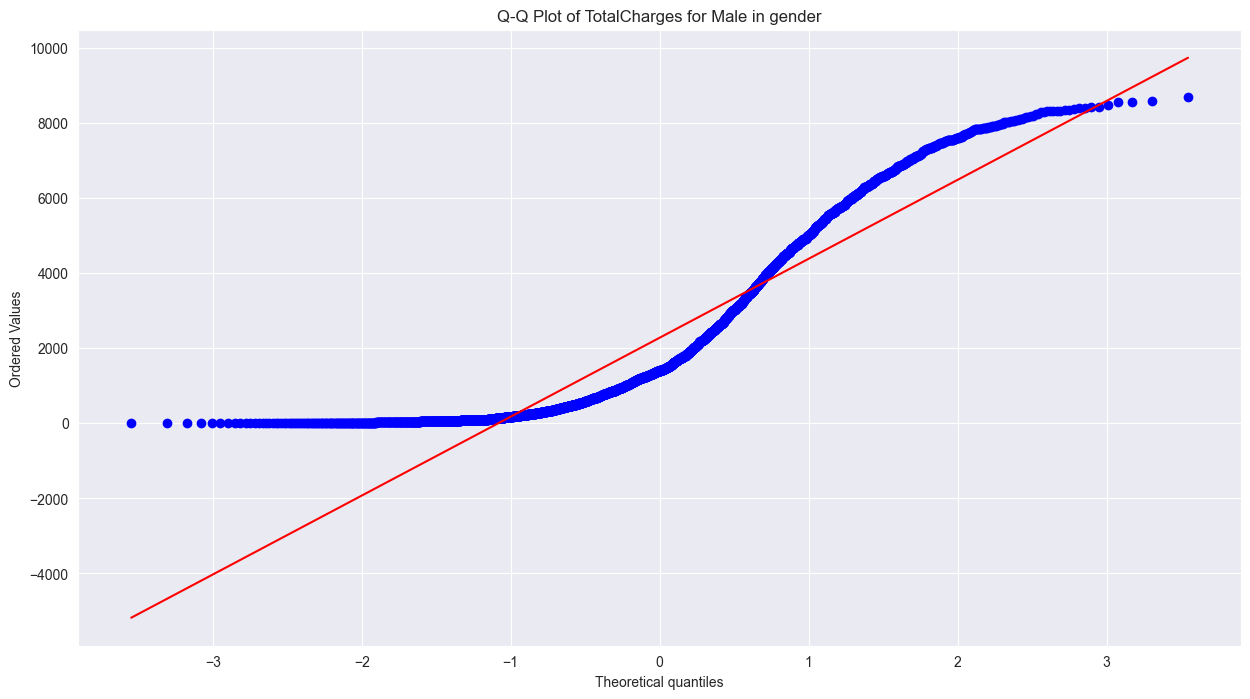



Testing normality for MonthlyCharges across gender

Checking normality for Female in gender
Shapiro-Wilk test for Female in gender: Stat=0.9215084810871067, P-value=2.6150681879500694e-39
Sample does not look Gaussian (reject H0)


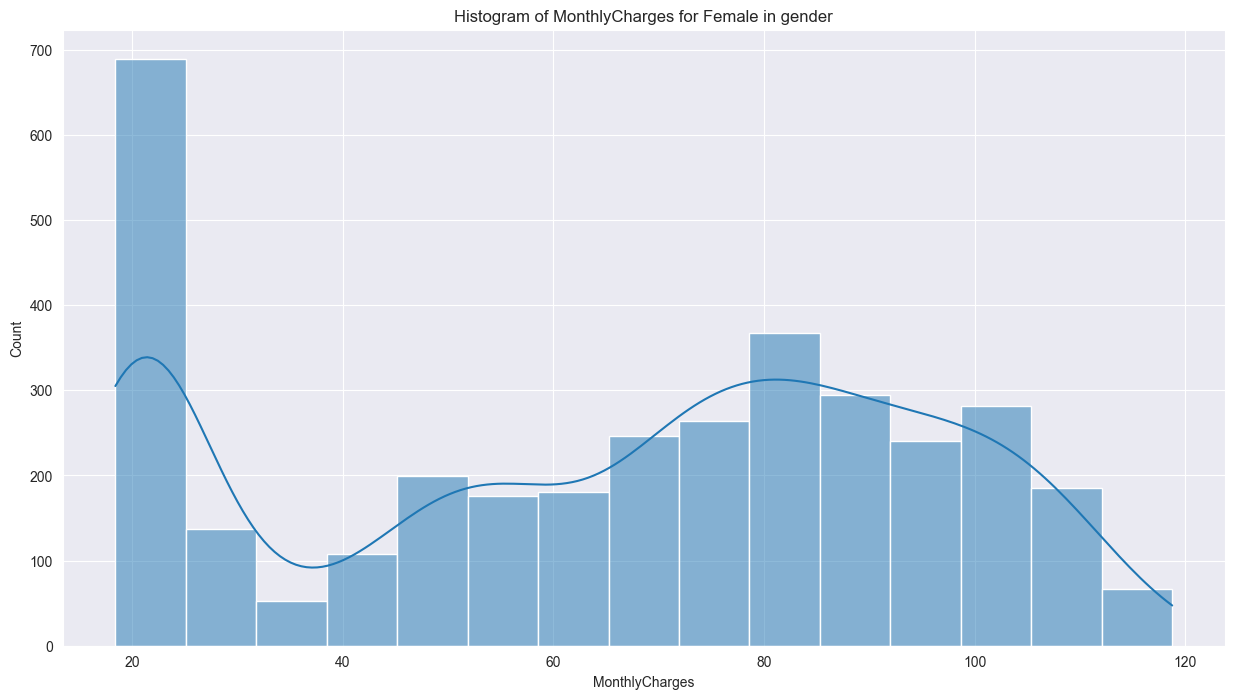

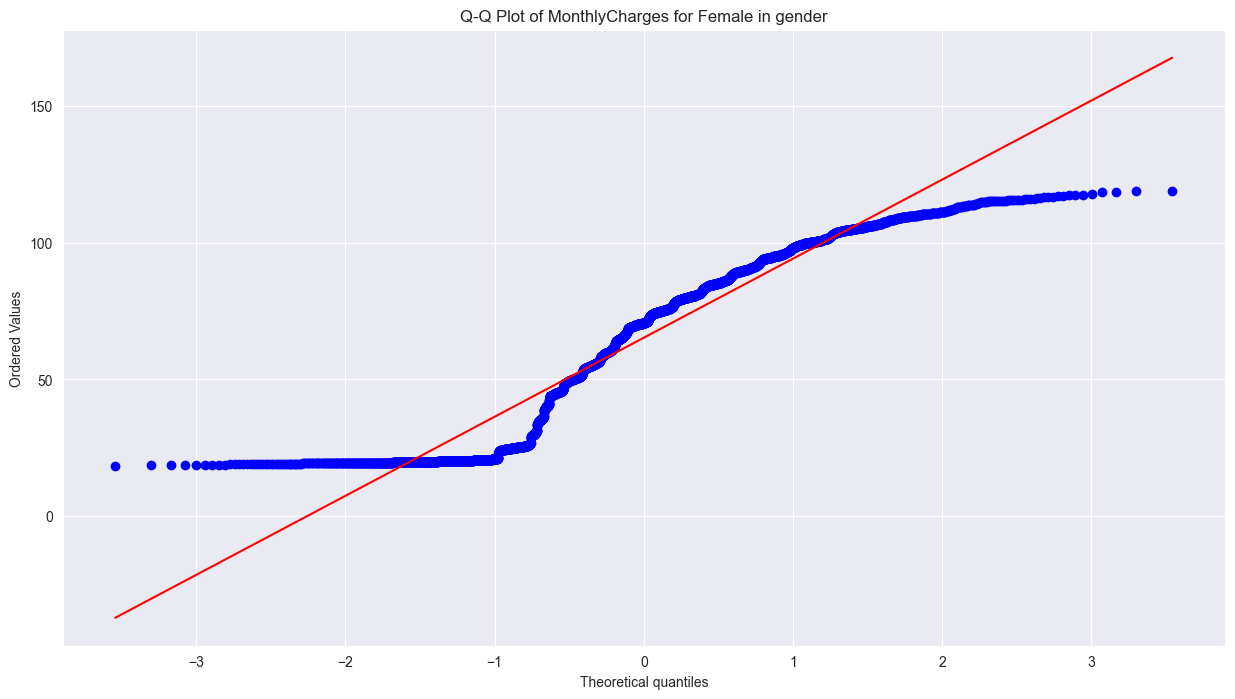


Checking normality for Male in gender
Shapiro-Wilk test for Male in gender: Stat=0.9201173652220237, P-value=7.152396493585343e-40
Sample does not look Gaussian (reject H0)


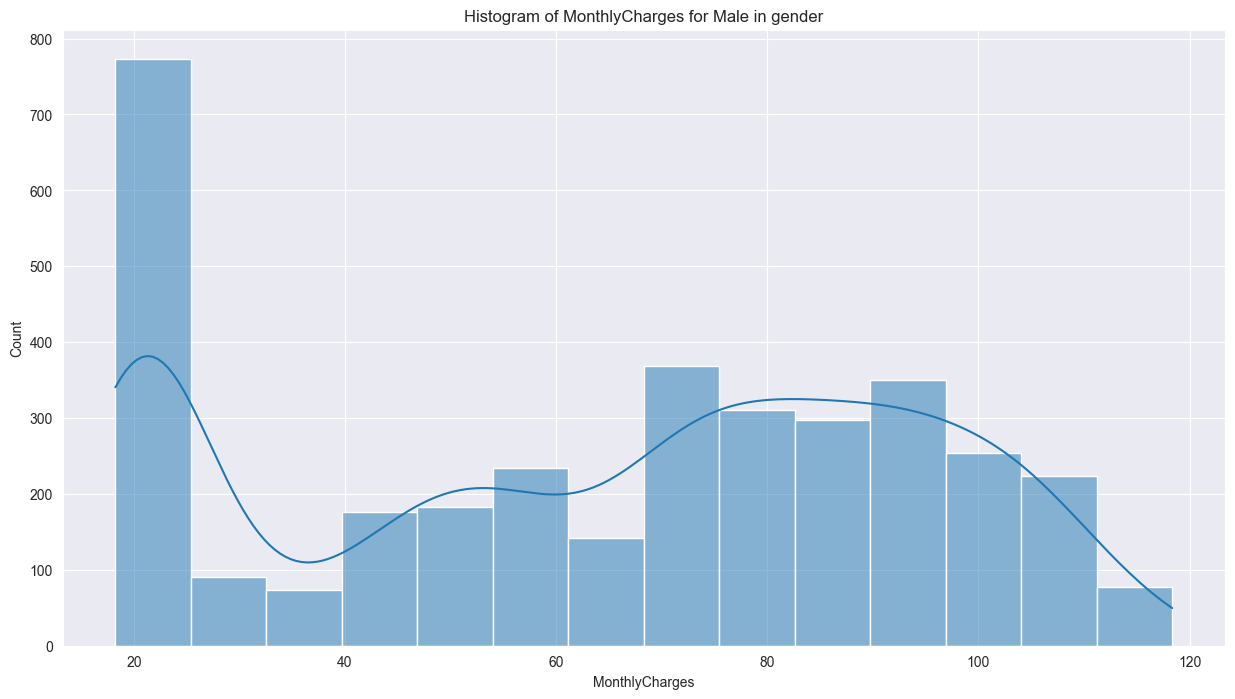

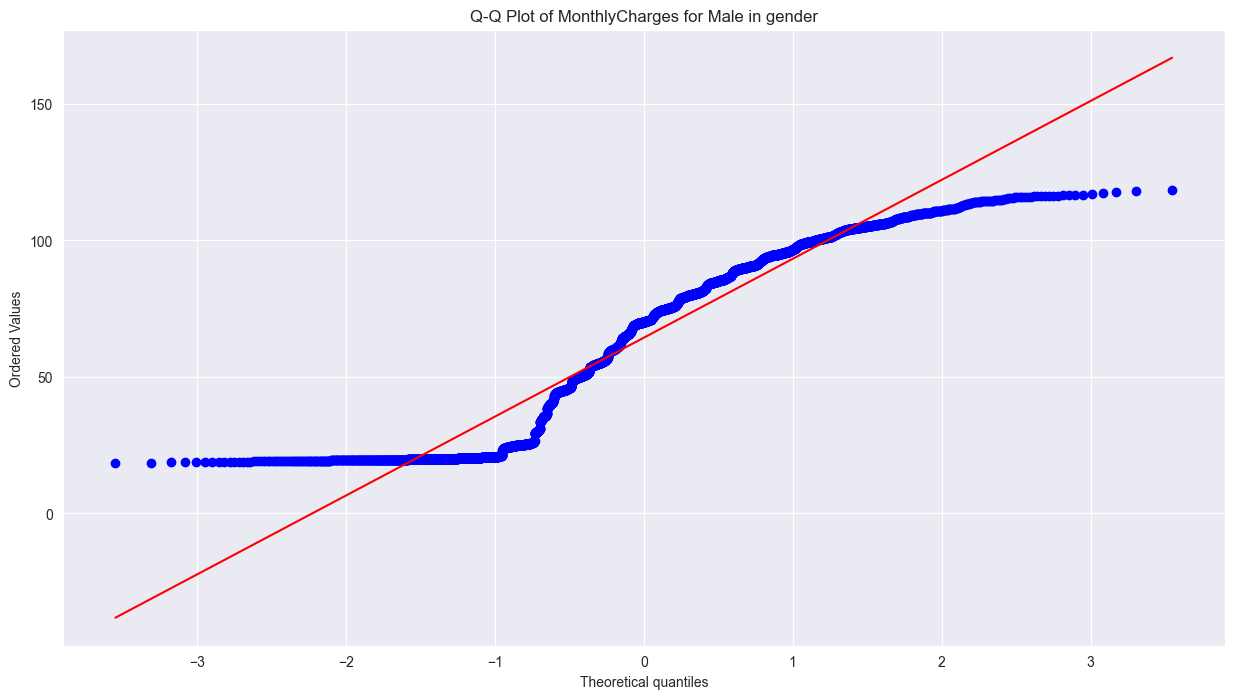



Testing normality for tenure across gender

Checking normality for Female in gender
Shapiro-Wilk test for Female in gender: Stat=0.9044979088968438, P-value=2.871654347143685e-42
Sample does not look Gaussian (reject H0)


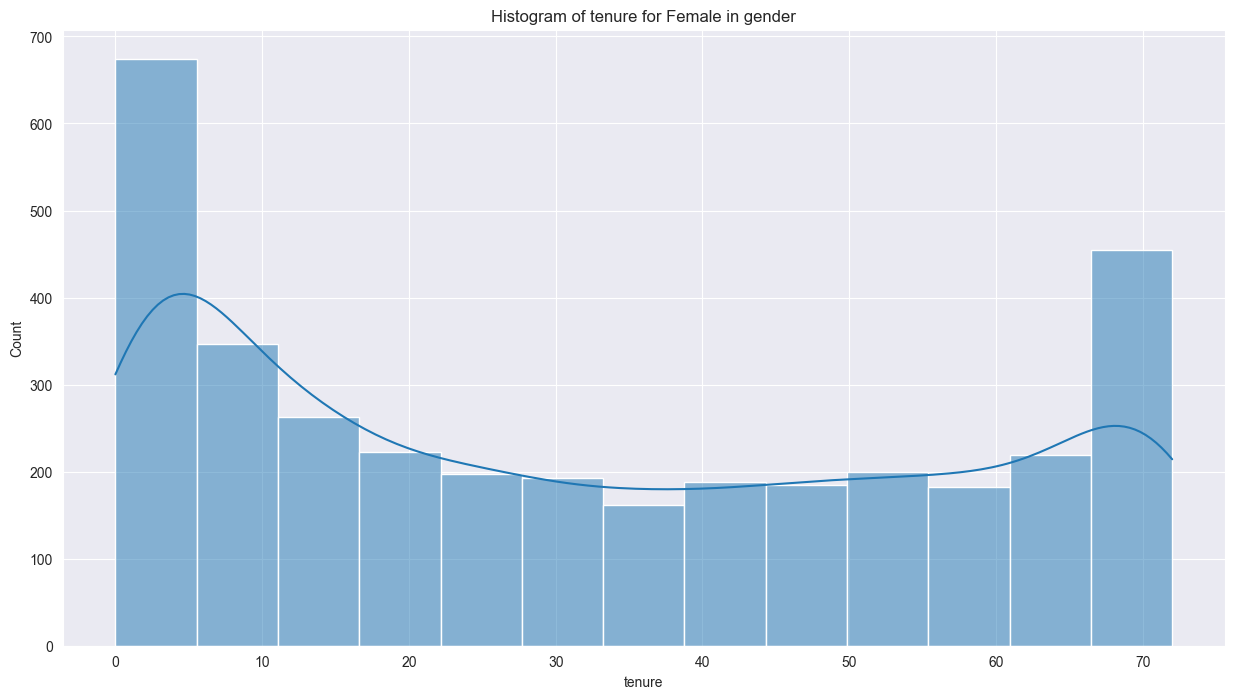

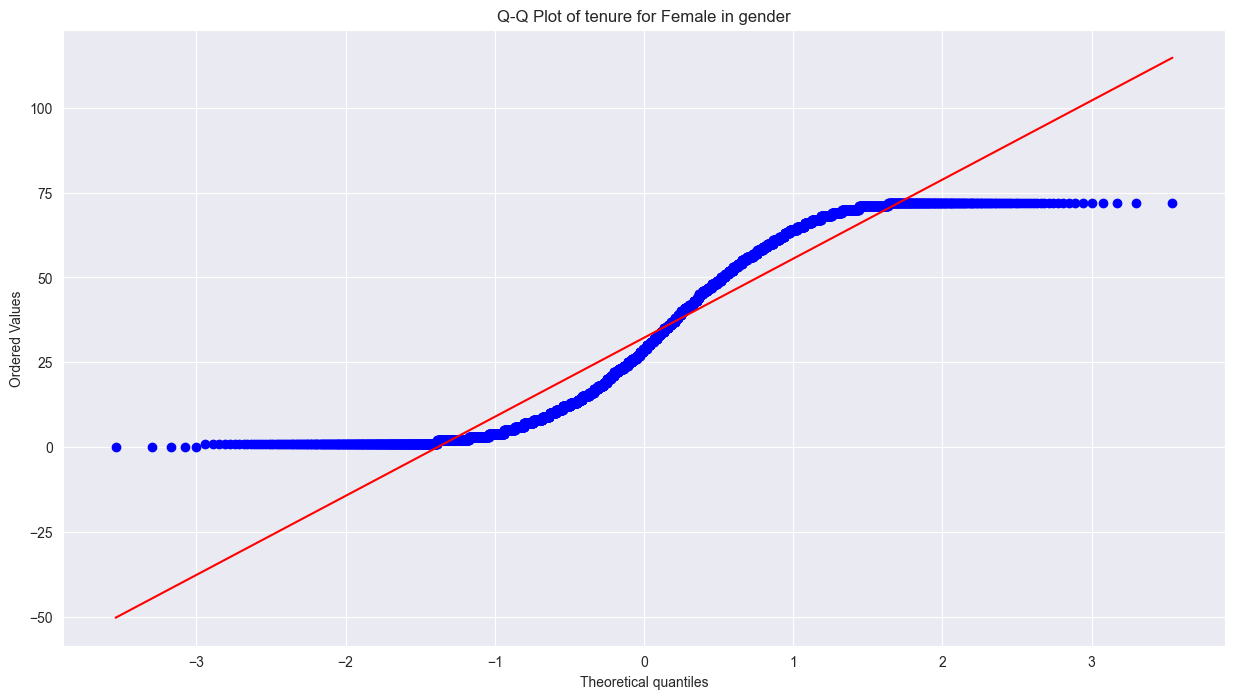


Checking normality for Male in gender
Shapiro-Wilk test for Male in gender: Stat=0.9028324980454678, P-value=7.514769408279577e-43
Sample does not look Gaussian (reject H0)


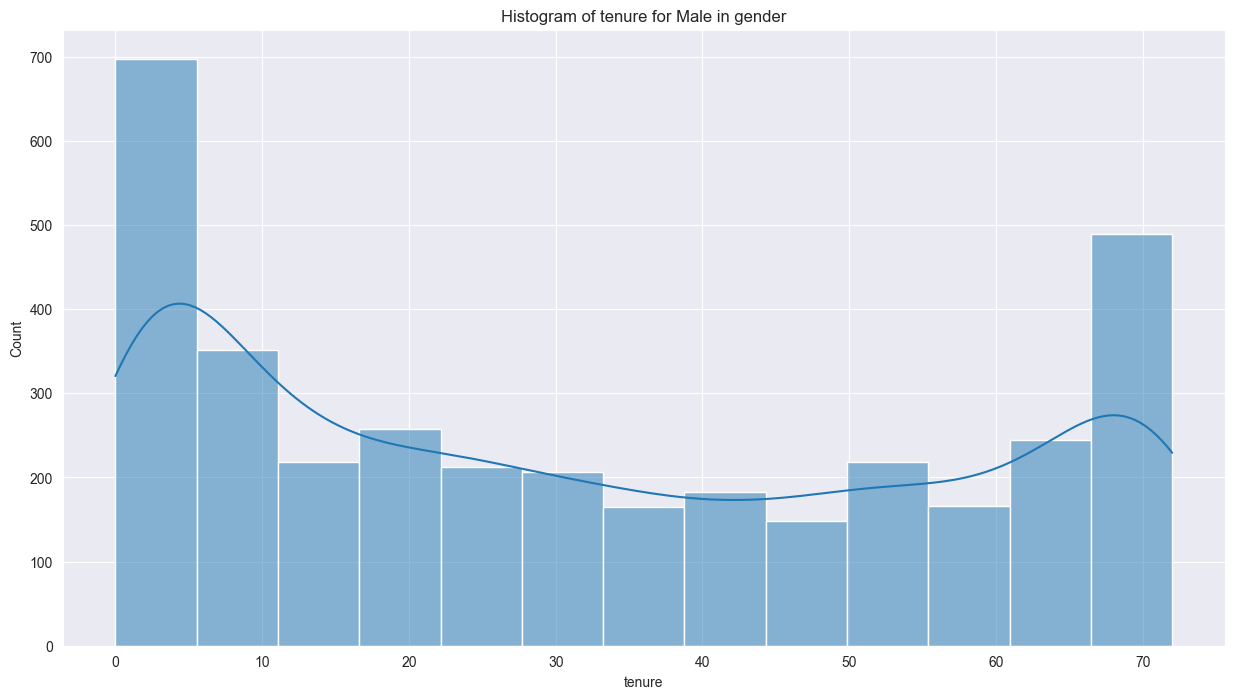

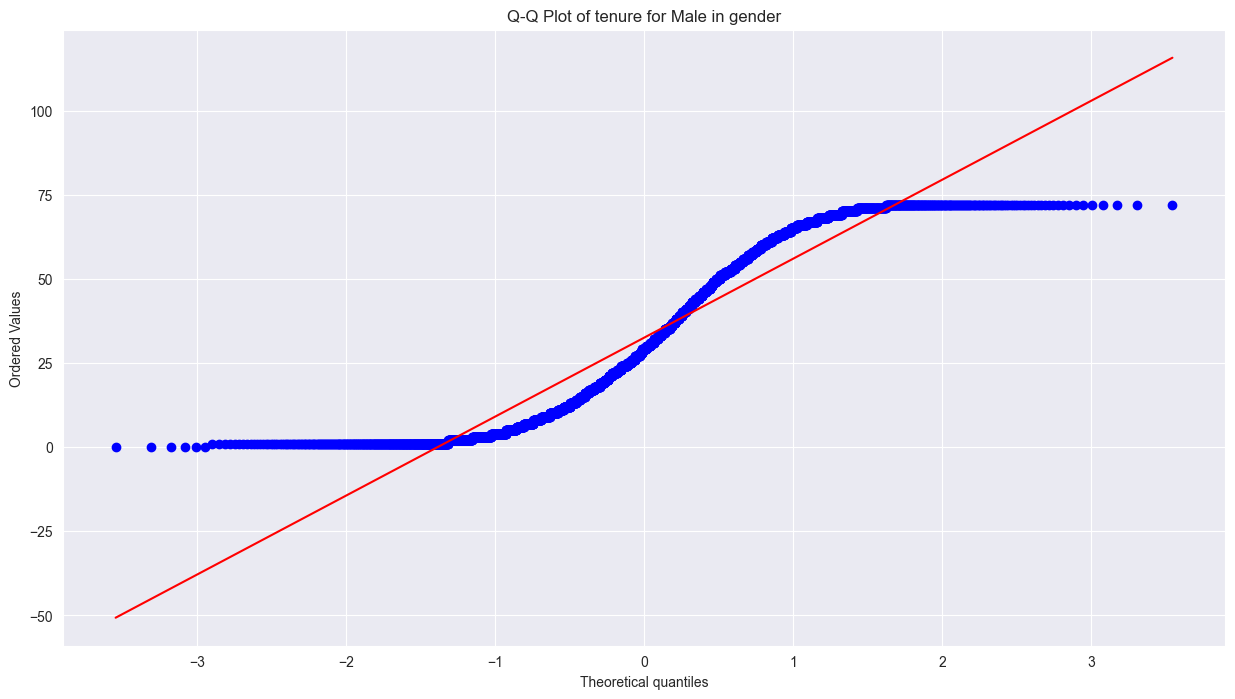



Testing normality for TotalCharges across Dependents

Checking normality for False in Dependents
Shapiro-Wilk test for False in Dependents: Stat=0.8519102372277468, P-value=8.729200341173788e-56
Sample does not look Gaussian (reject H0)


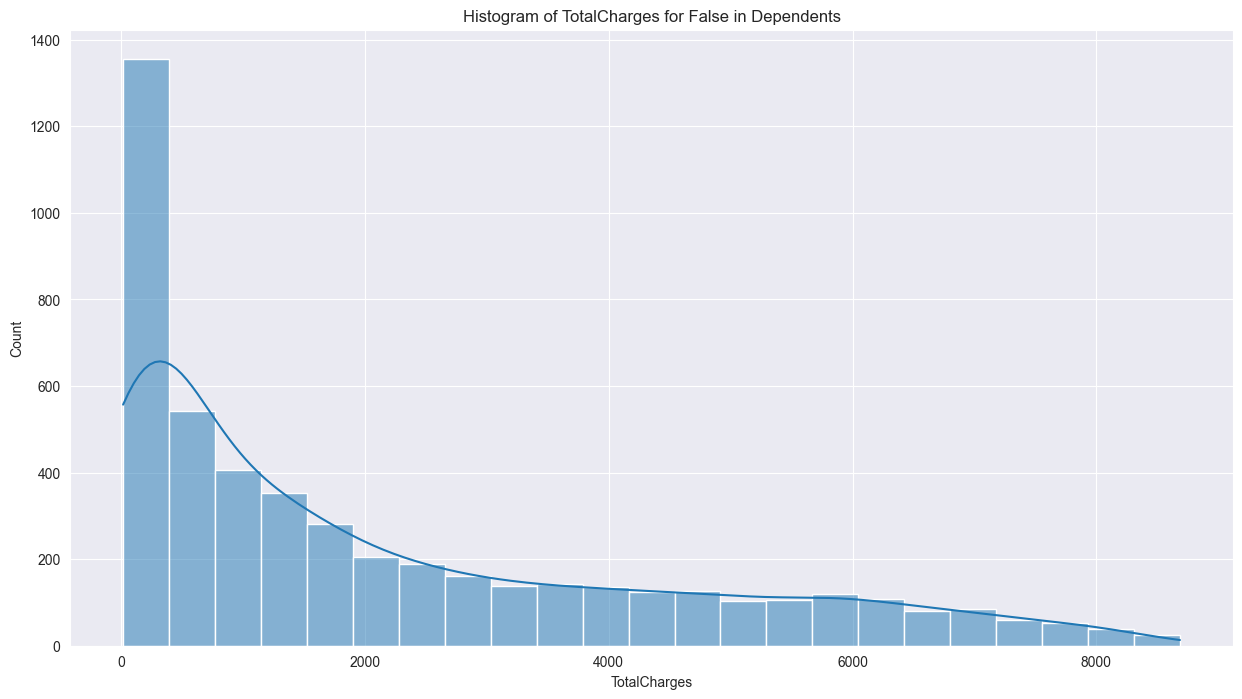

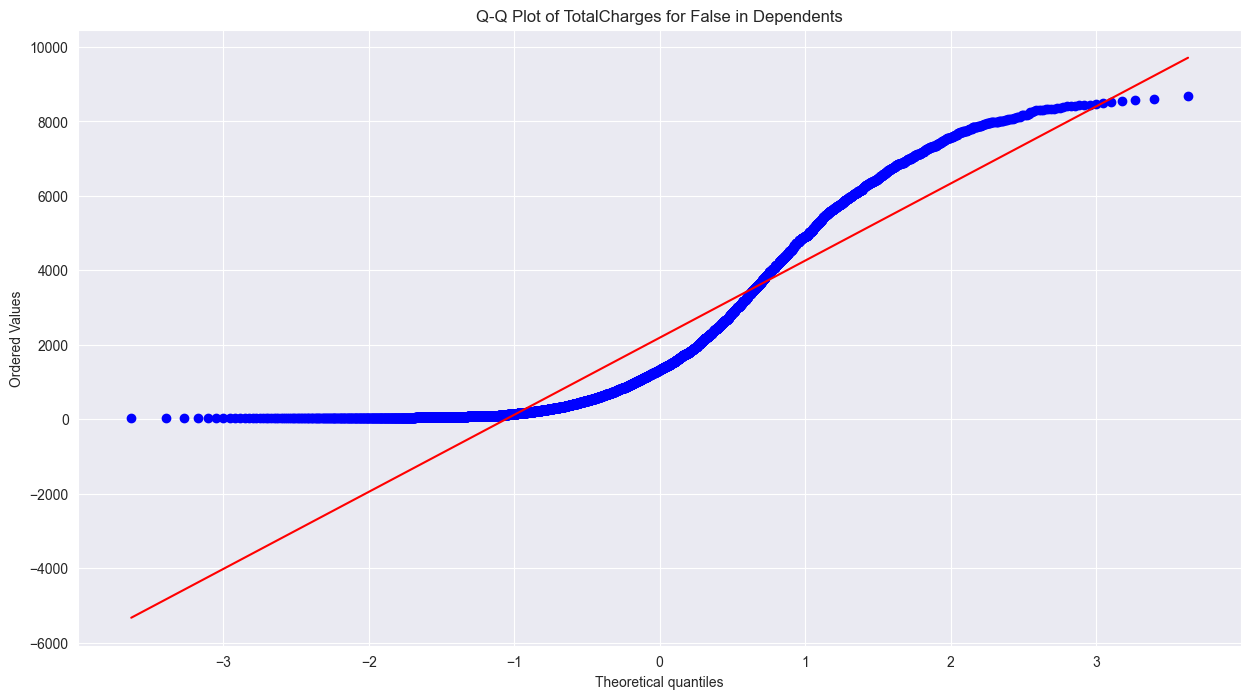


Checking normality for True in Dependents
Shapiro-Wilk test for True in Dependents: Stat=0.8761785251030705, P-value=4.843738521894198e-38
Sample does not look Gaussian (reject H0)


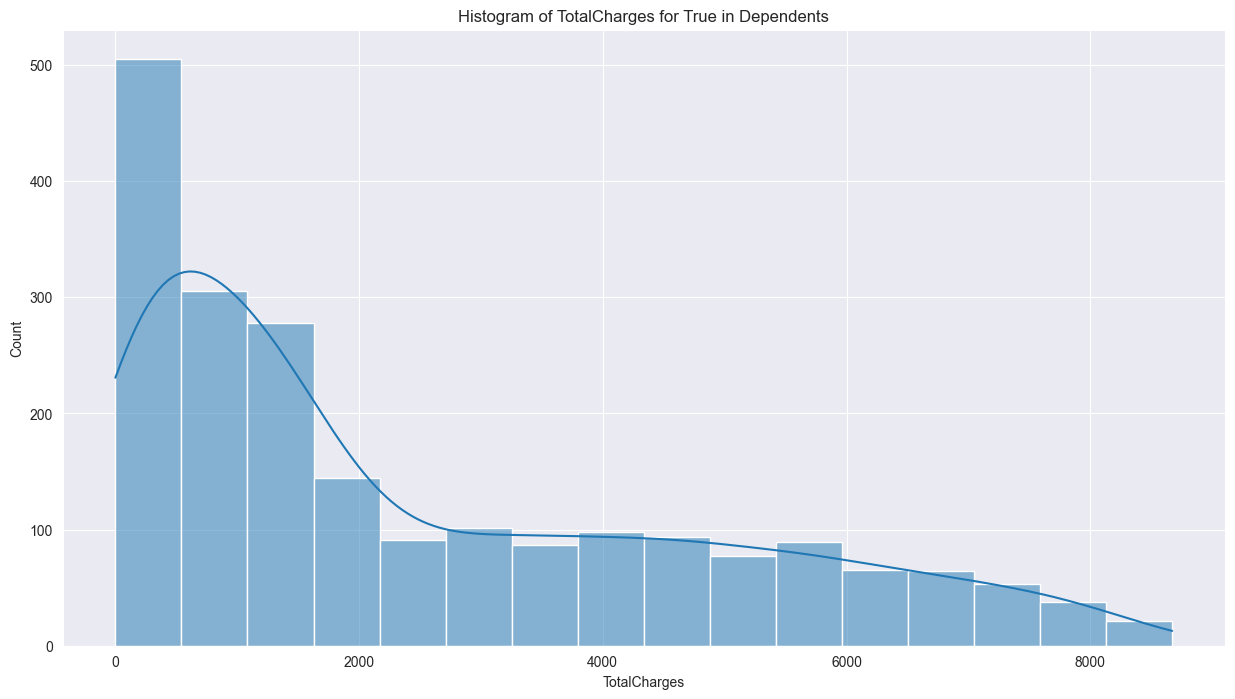

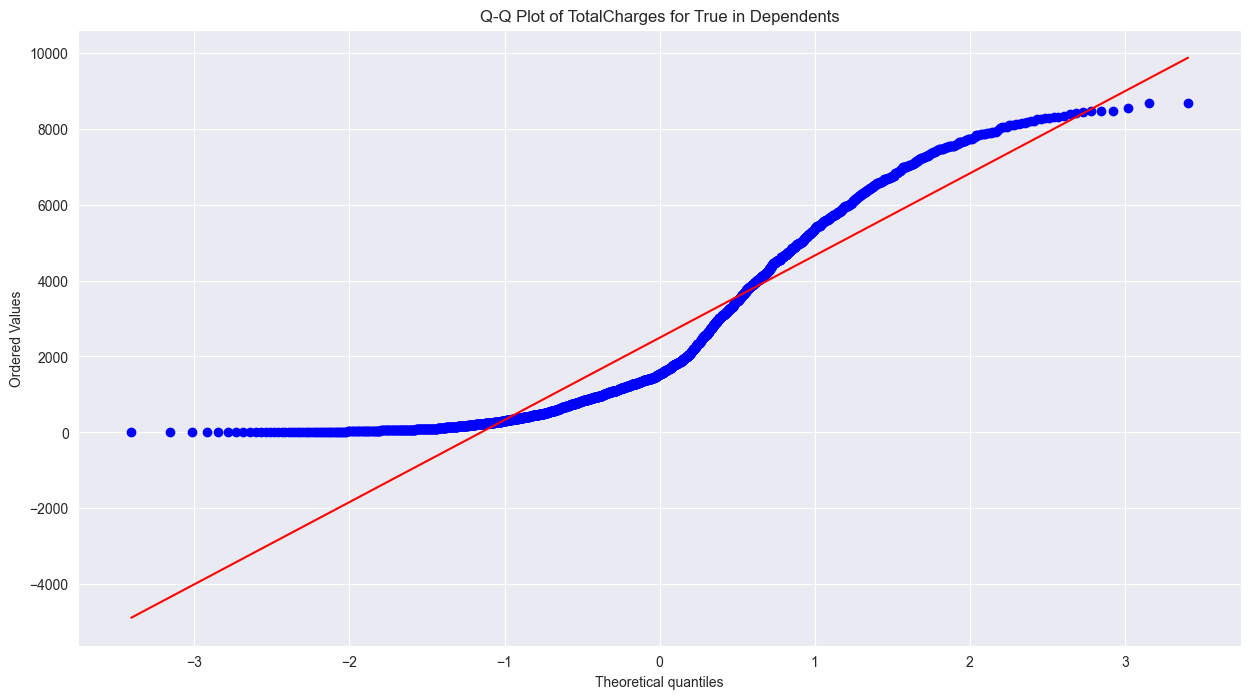



Testing normality for MonthlyCharges across Dependents

Checking normality for False in Dependents
Shapiro-Wilk test for False in Dependents: Stat=0.9264603462622869, P-value=5.935115979821675e-44
Sample does not look Gaussian (reject H0)


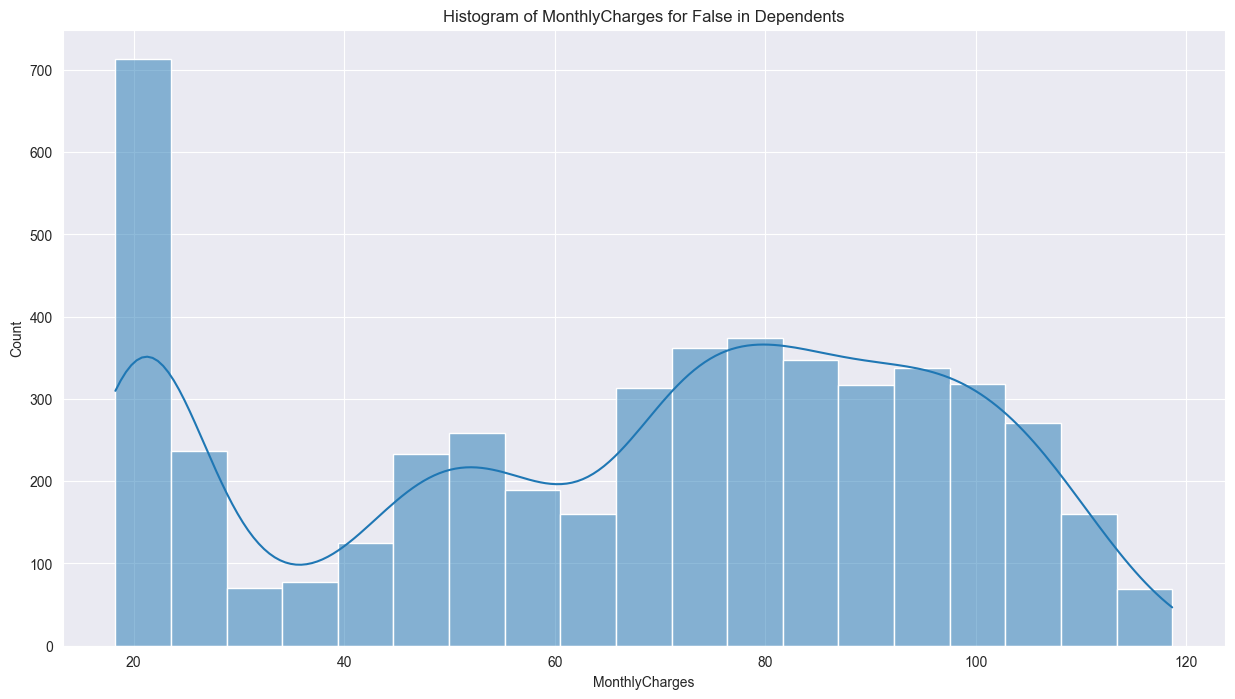

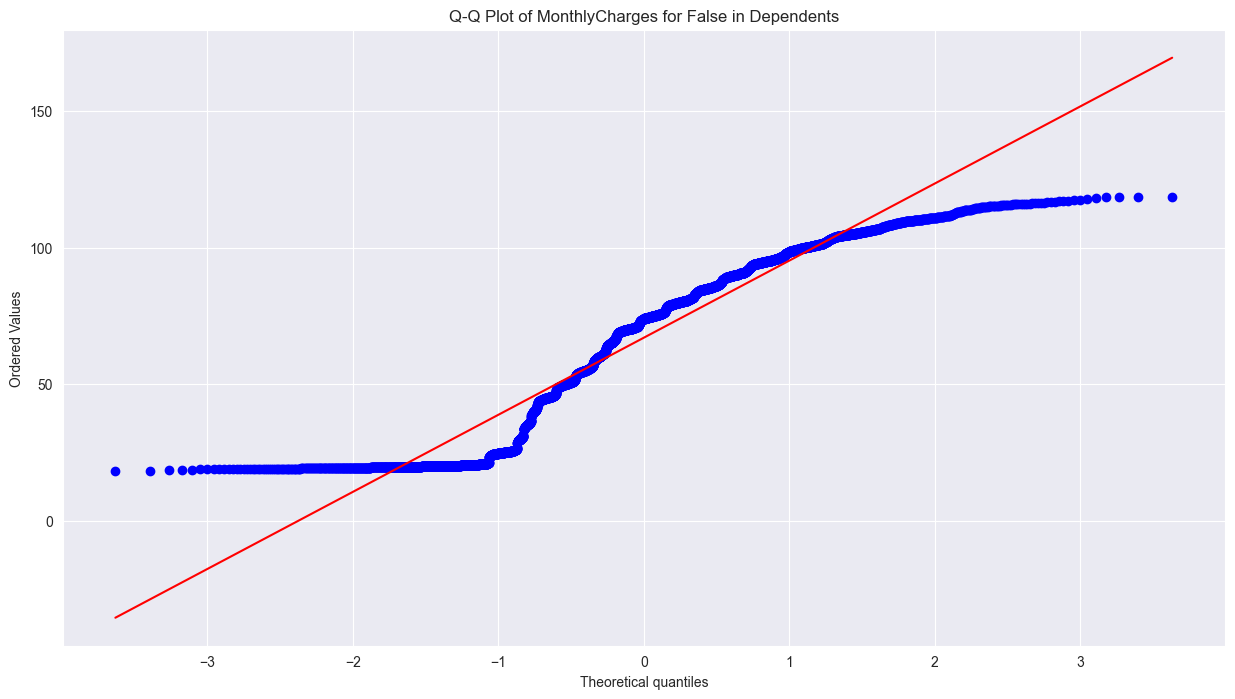


Checking normality for True in Dependents
Shapiro-Wilk test for True in Dependents: Stat=0.9034127789327586, P-value=1.4137990389011644e-34
Sample does not look Gaussian (reject H0)


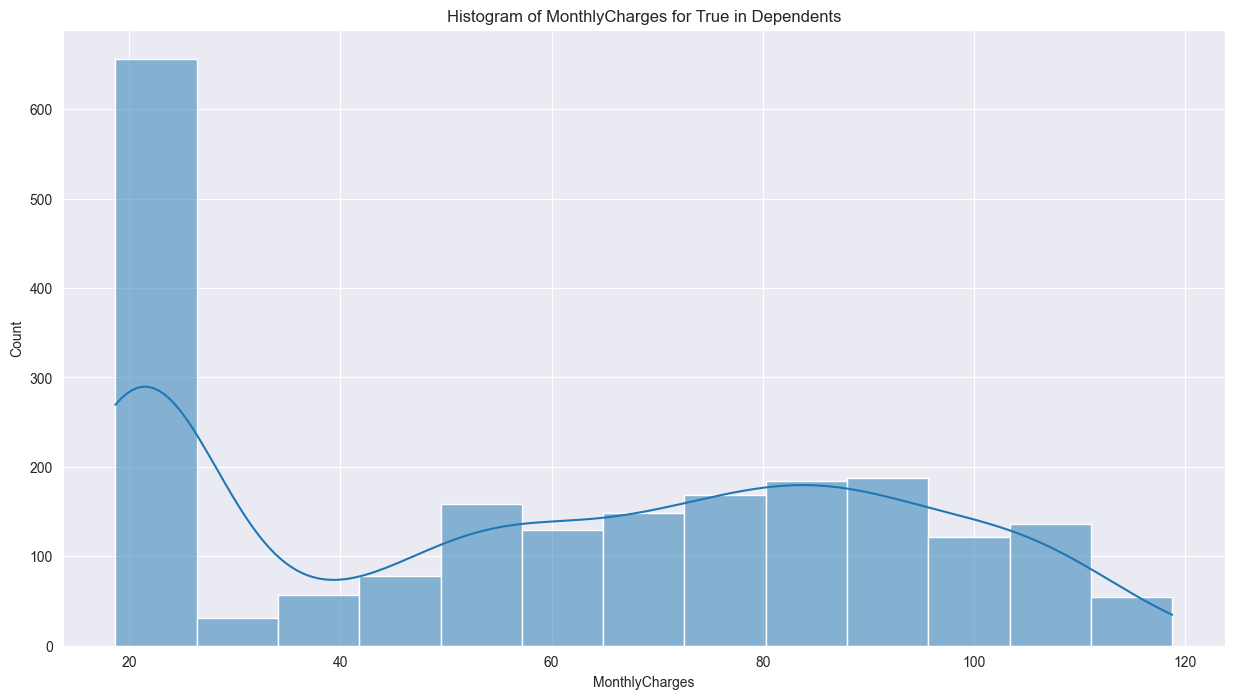

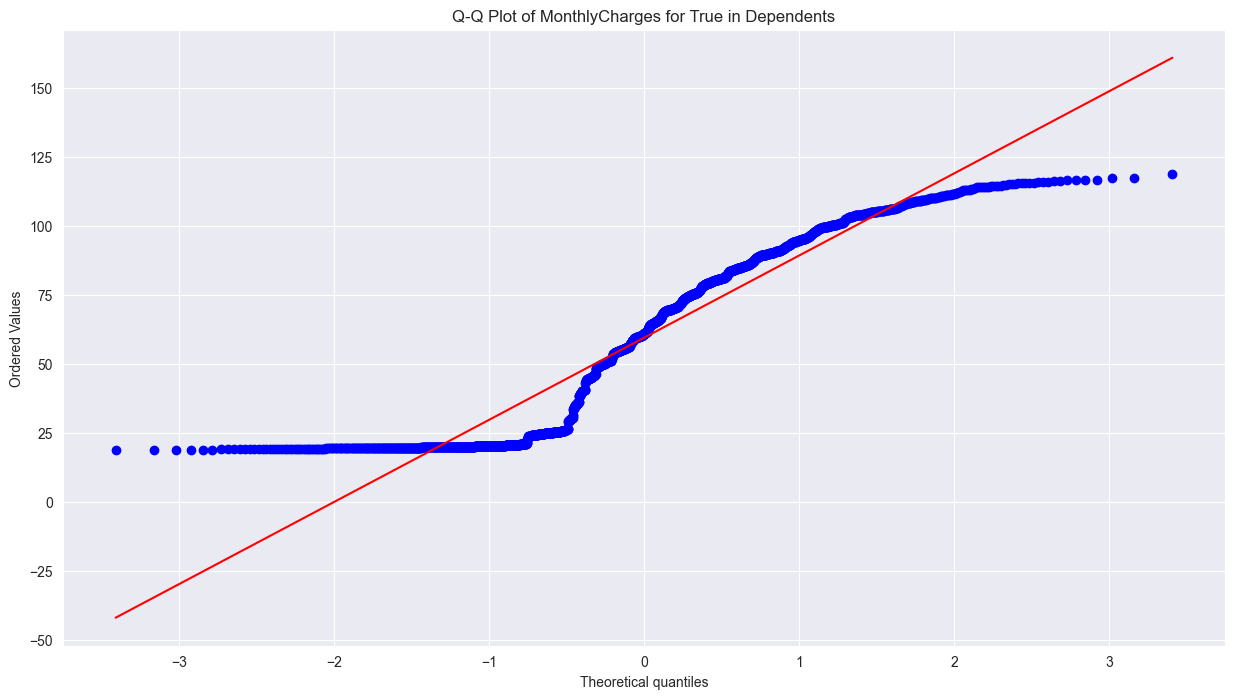



Testing normality for tenure across Dependents

Checking normality for False in Dependents
Shapiro-Wilk test for False in Dependents: Stat=0.8947357906293296, P-value=7.8163859352894375e-50
Sample does not look Gaussian (reject H0)


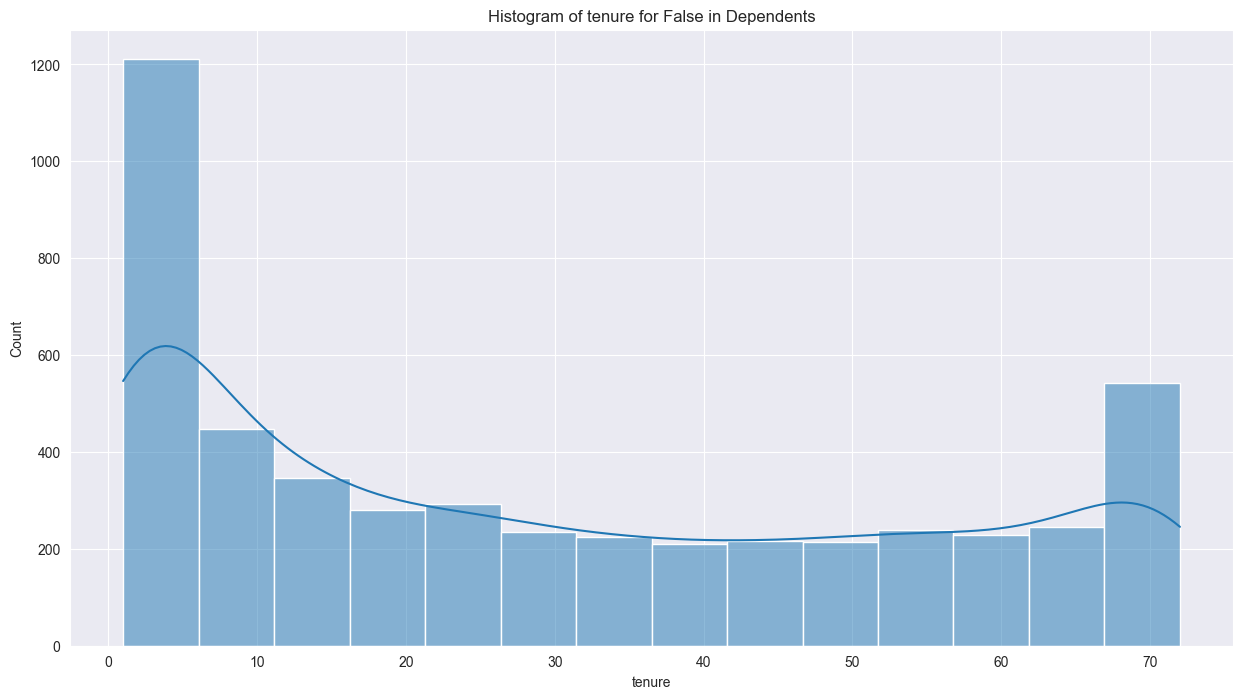

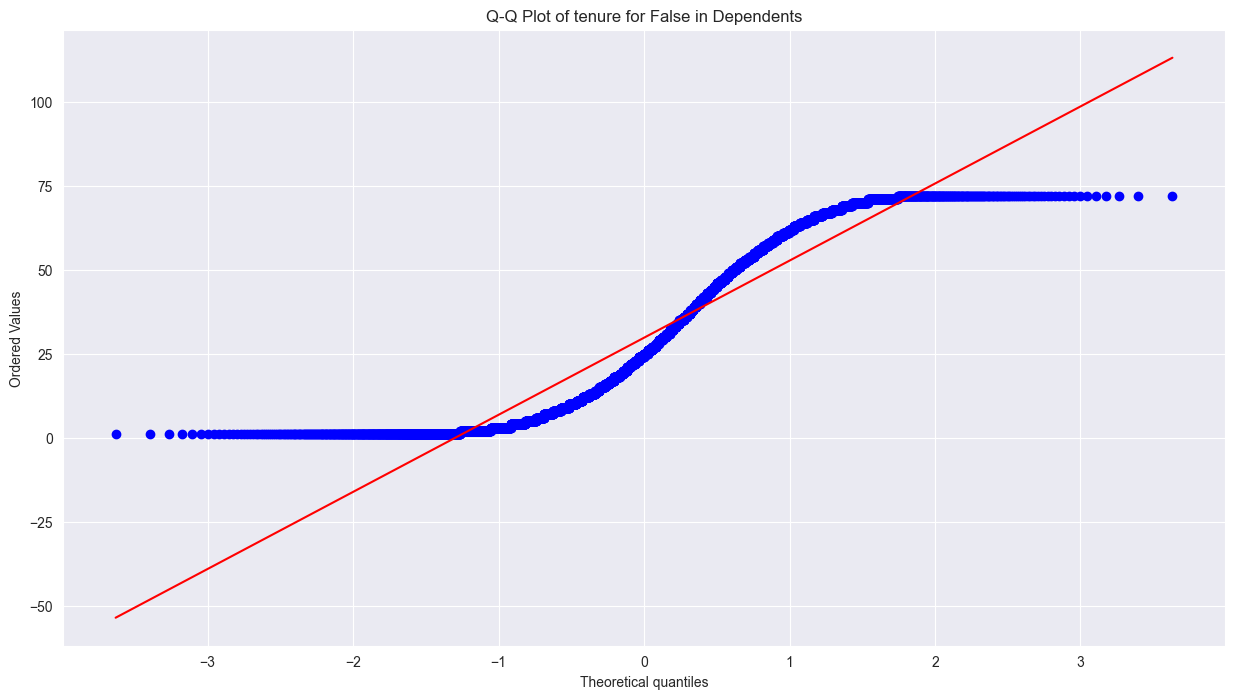


Checking normality for True in Dependents
Shapiro-Wilk test for True in Dependents: Stat=0.9159677480041576, P-value=1.0405660542598192e-32
Sample does not look Gaussian (reject H0)


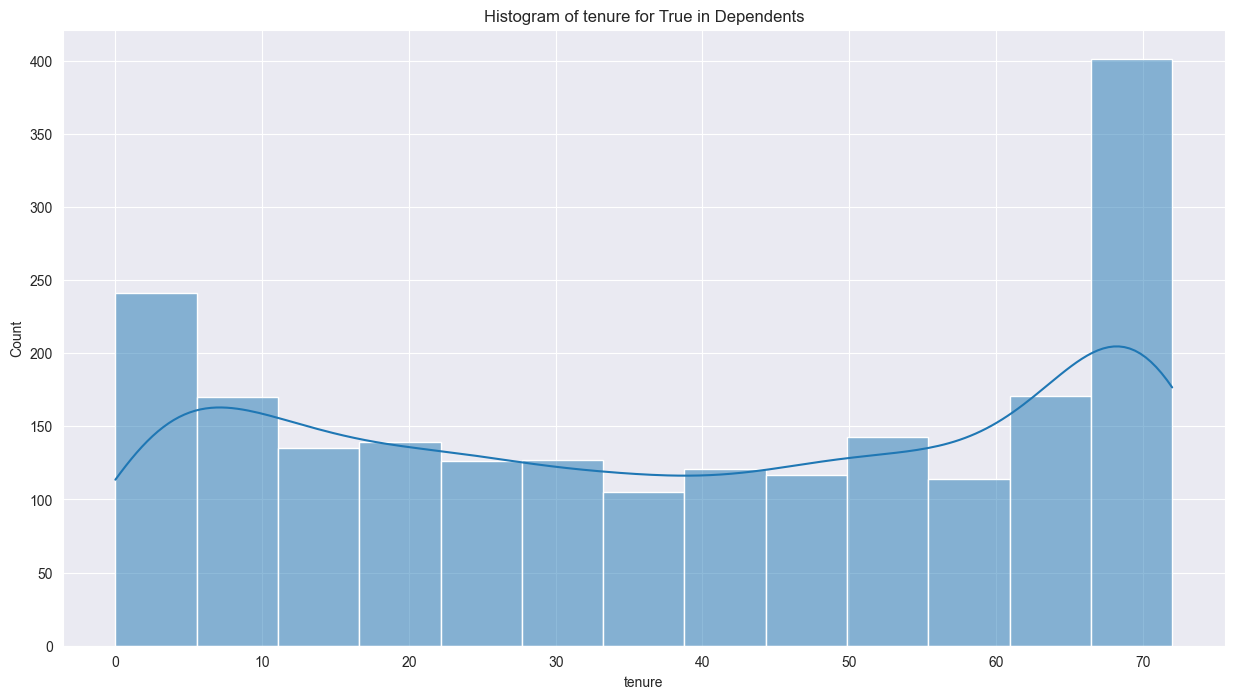

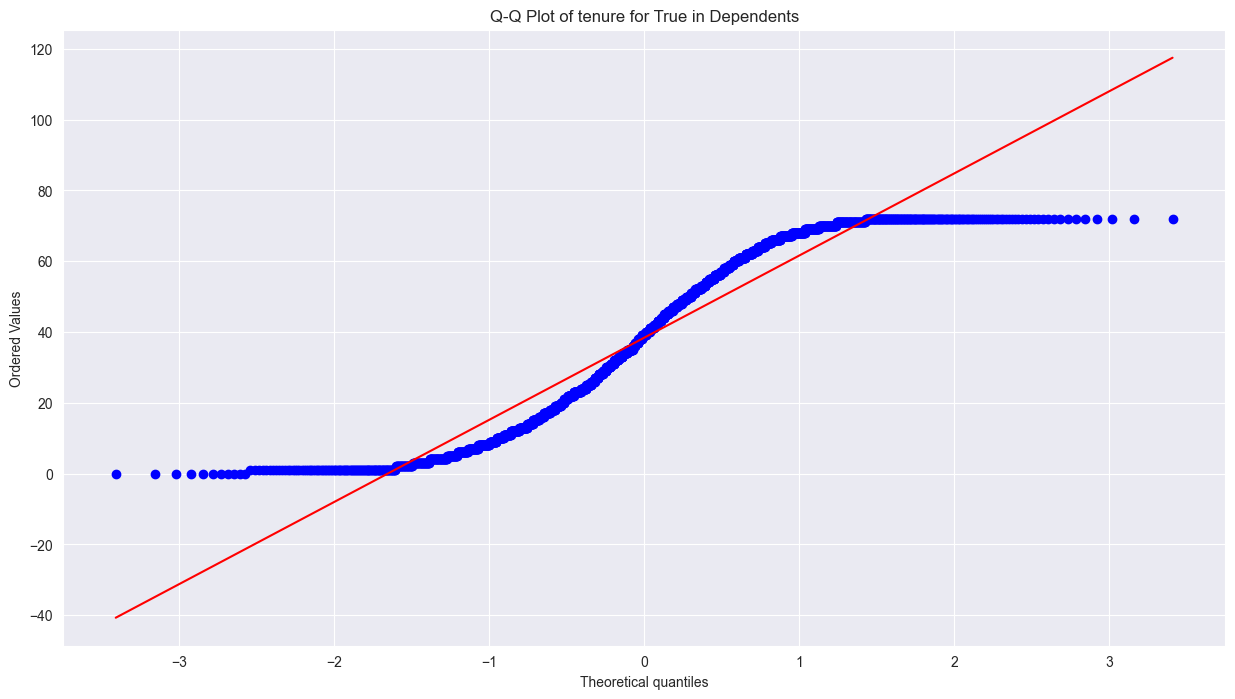



Testing normality for TotalCharges across MultipleLines

Checking normality for No phone service in MultipleLines
Shapiro-Wilk test for No phone service in MultipleLines: Stat=0.8987576457017774, P-value=8.35298068077978e-21
Sample does not look Gaussian (reject H0)


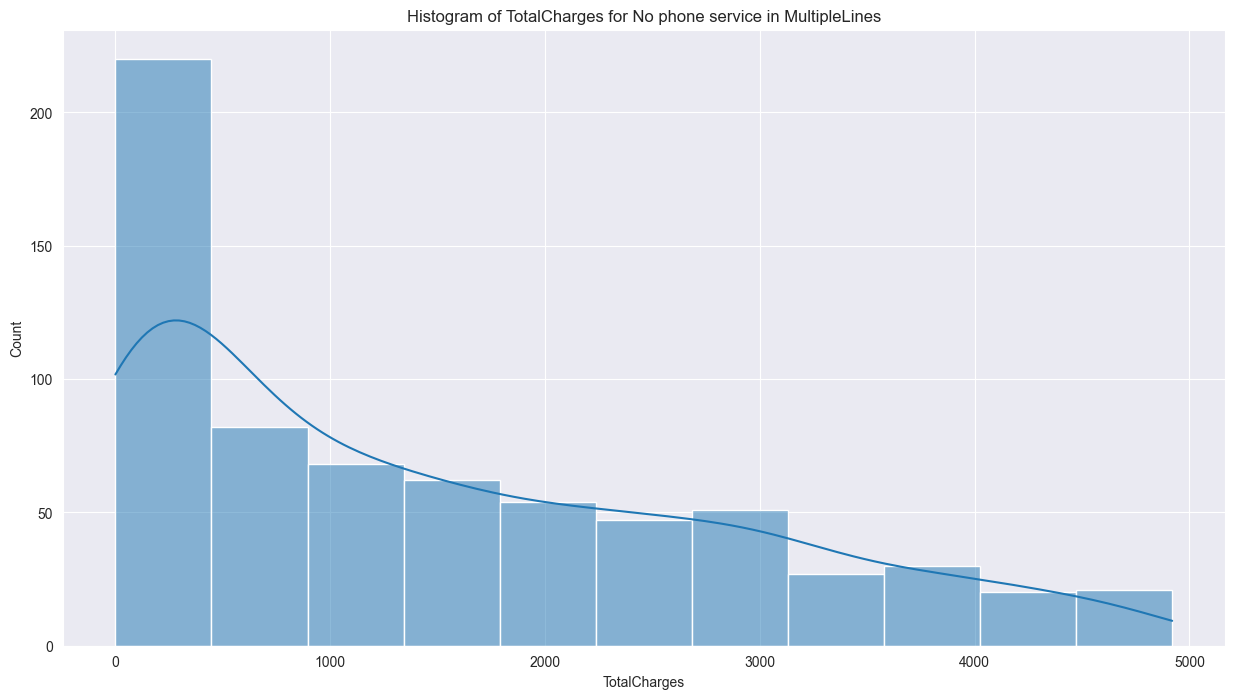

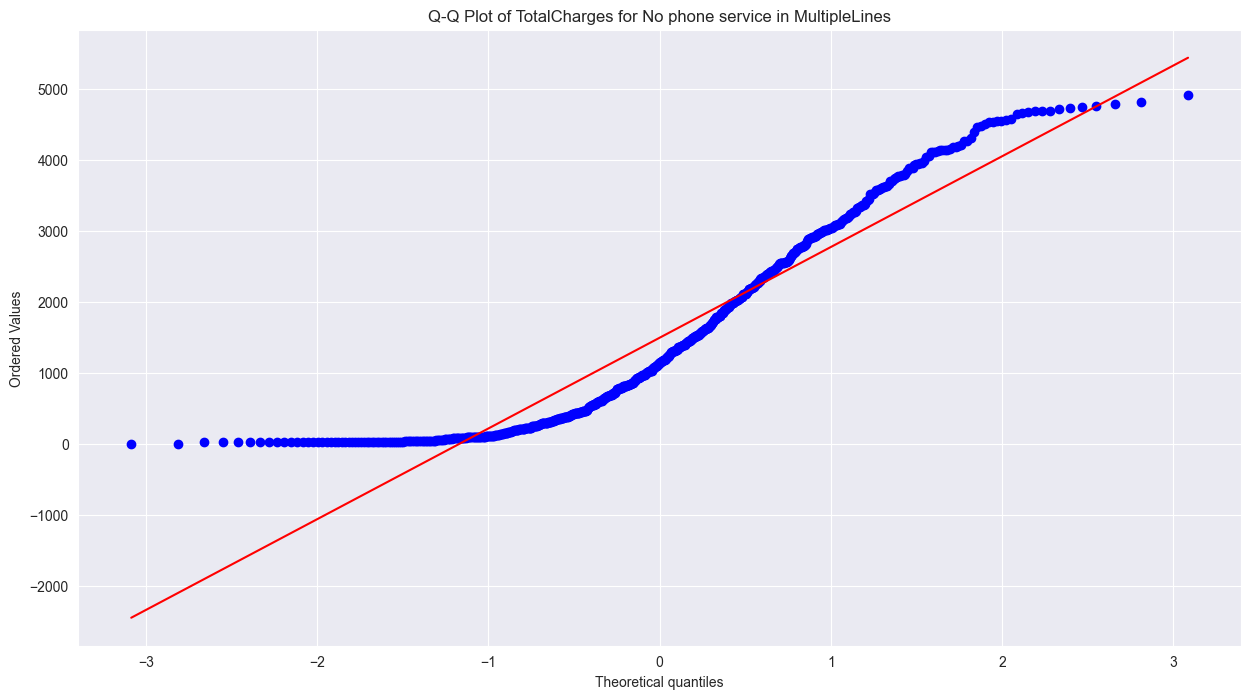


Checking normality for No in MultipleLines
Shapiro-Wilk test for No in MultipleLines: Stat=0.772665619047908, P-value=3.929089661440931e-56
Sample does not look Gaussian (reject H0)


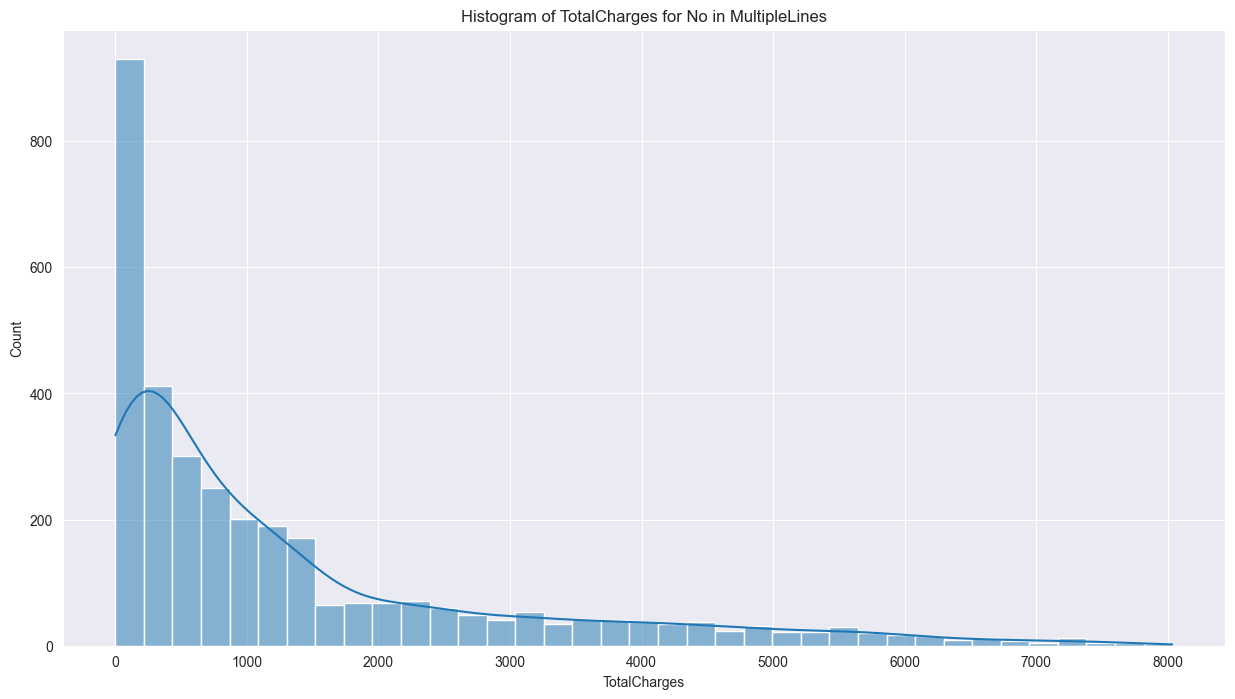

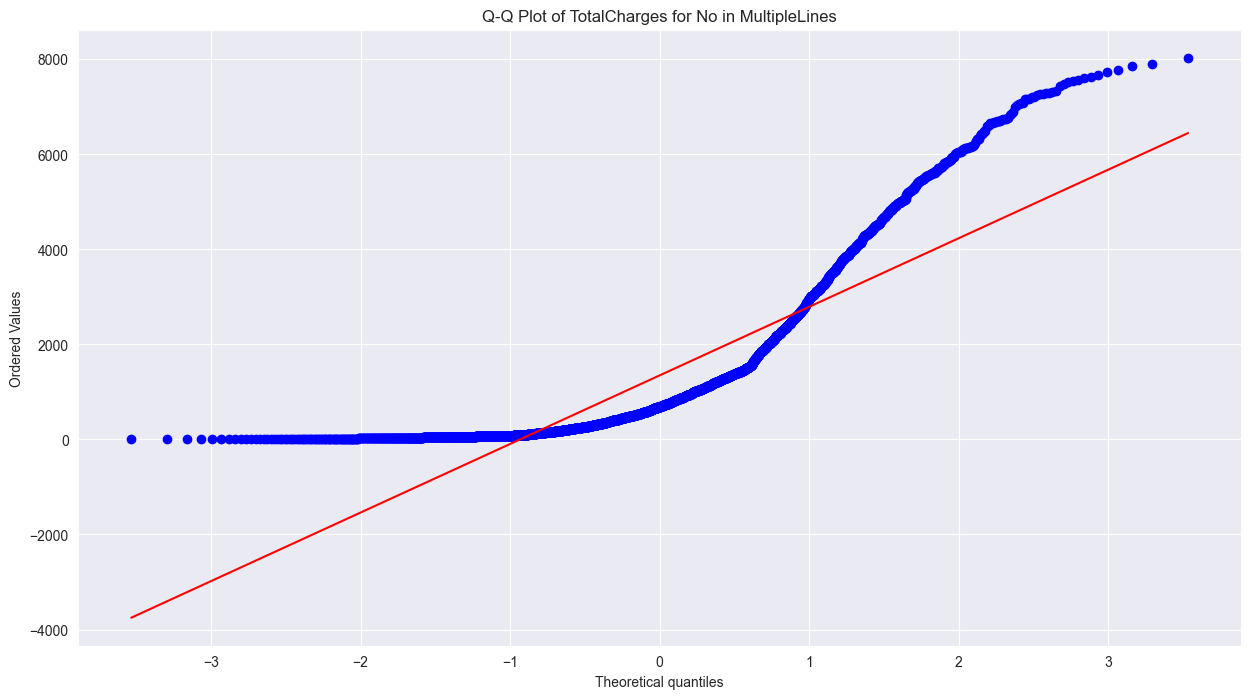


Checking normality for Yes in MultipleLines
Shapiro-Wilk test for Yes in MultipleLines: Stat=0.9368263570460625, P-value=8.491769222360412e-34
Sample does not look Gaussian (reject H0)


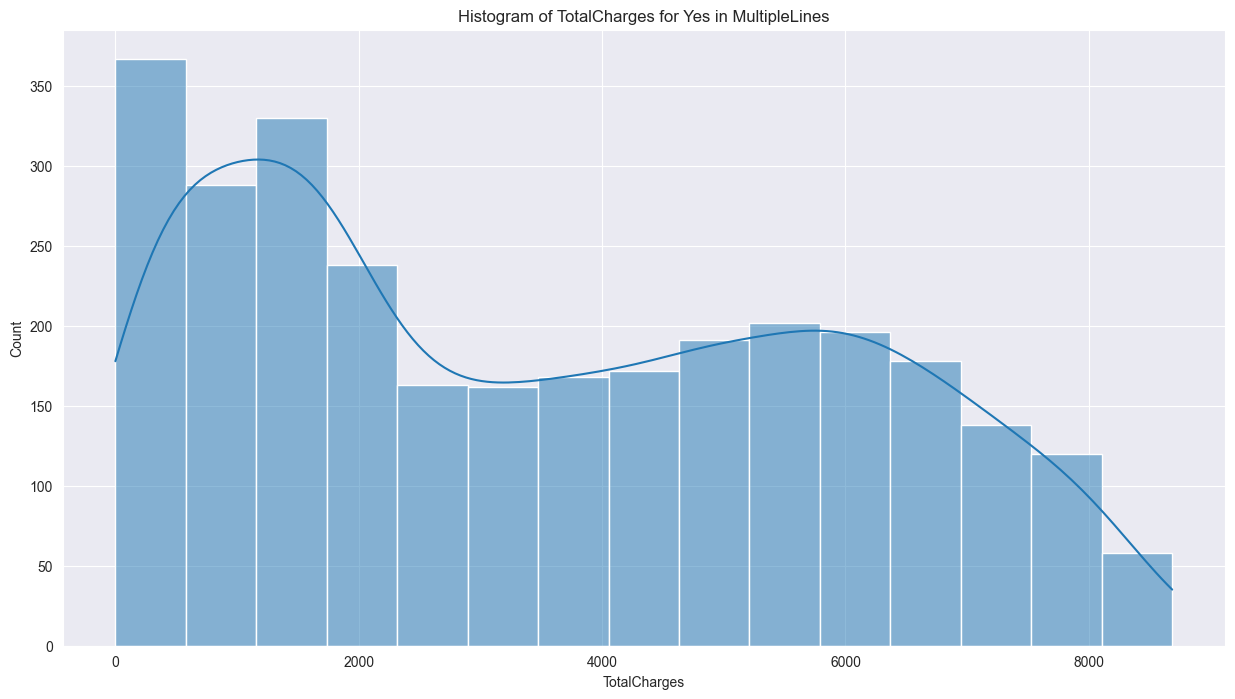

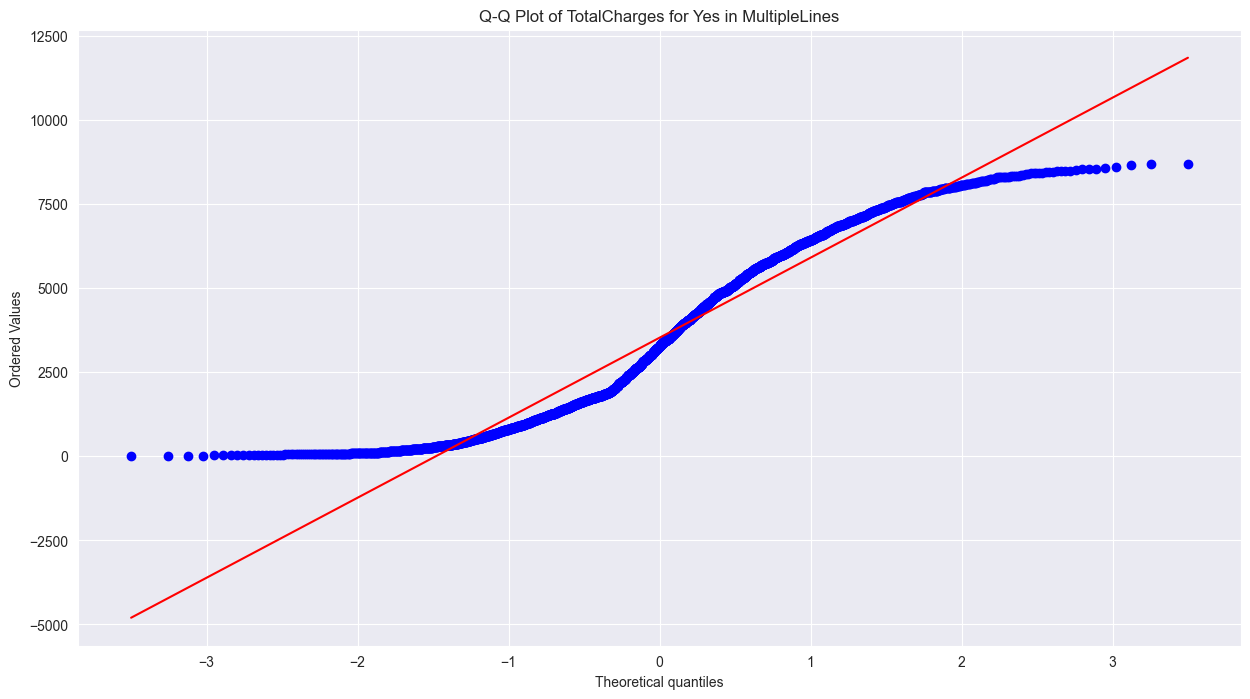



Testing normality for MonthlyCharges across MultipleLines

Checking normality for No phone service in MultipleLines
Shapiro-Wilk test for No phone service in MultipleLines: Stat=0.9634546082903801, P-value=5.290607318239772e-12
Sample does not look Gaussian (reject H0)


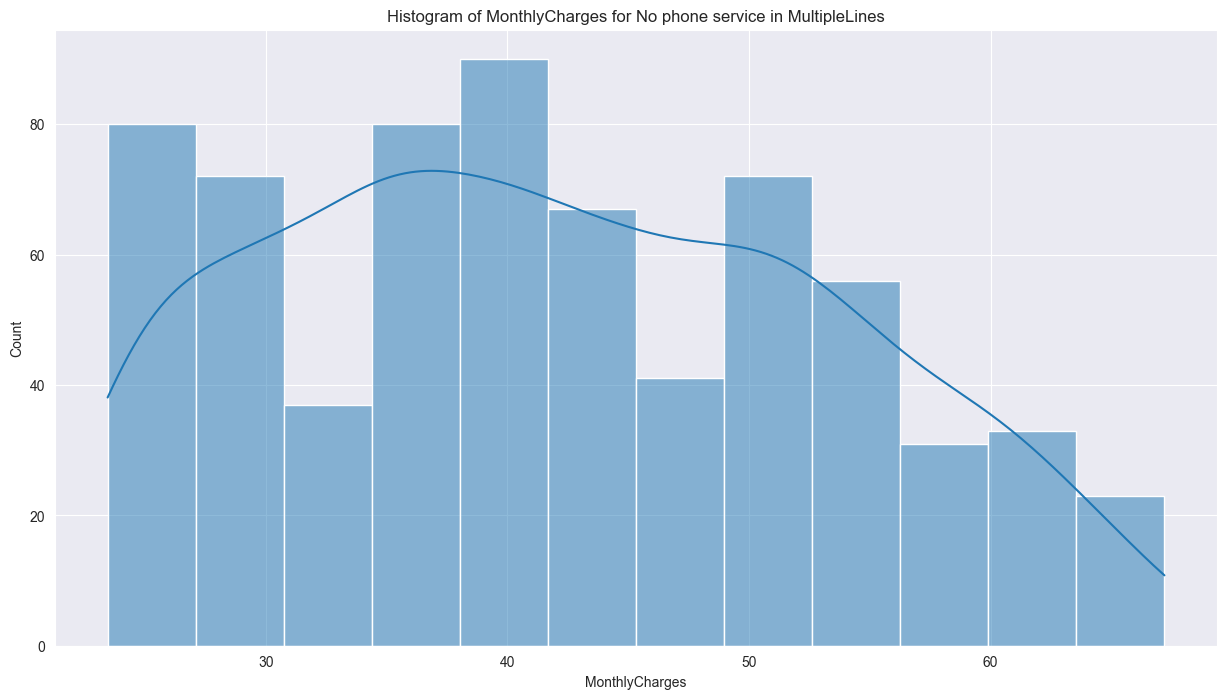

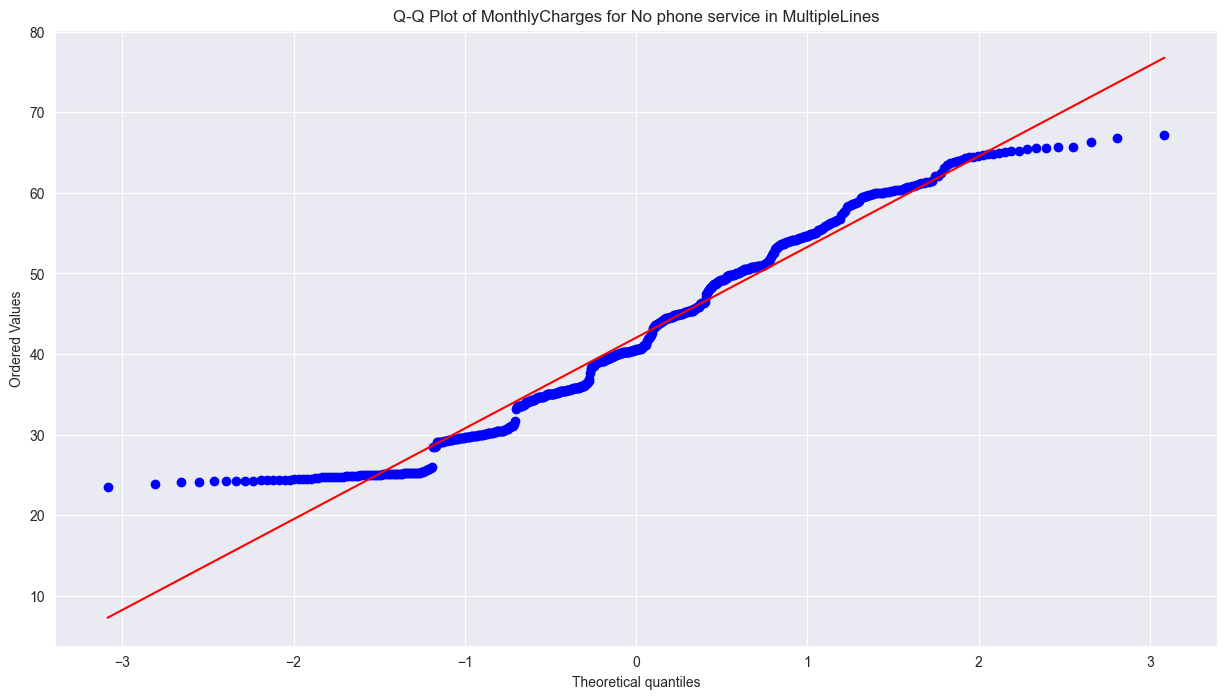


Checking normality for No in MultipleLines
Shapiro-Wilk test for No in MultipleLines: Stat=0.881624614428588, P-value=3.8211444113696643e-45
Sample does not look Gaussian (reject H0)


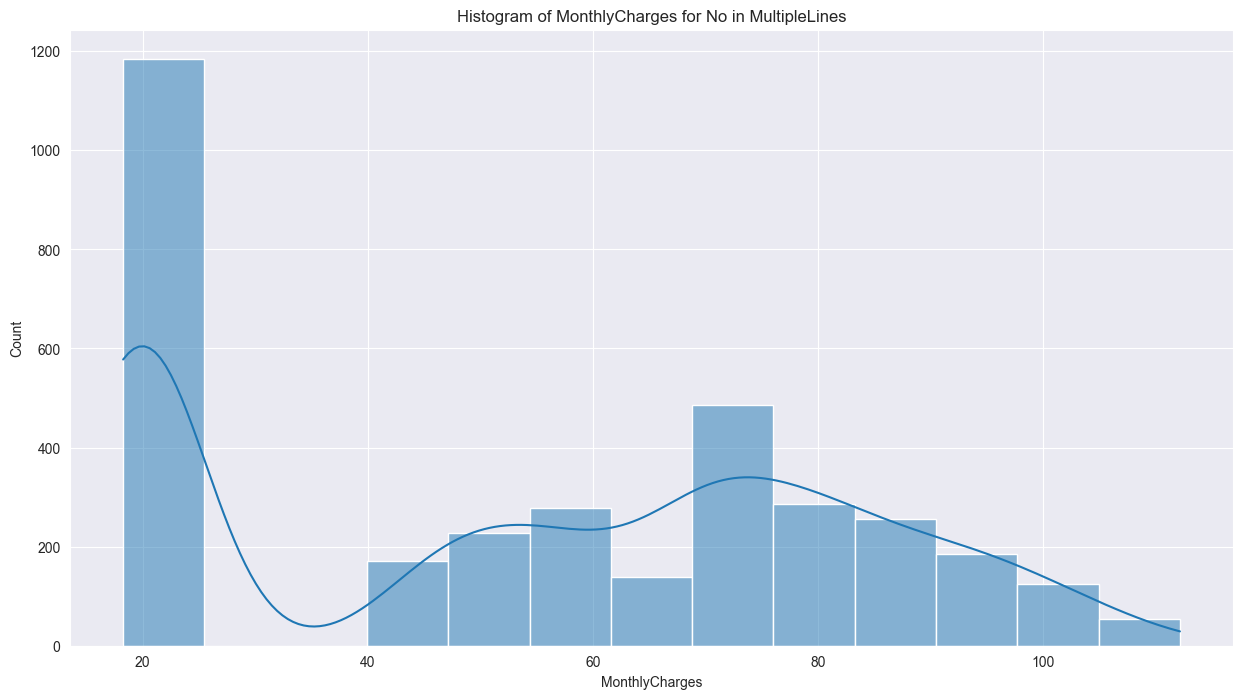

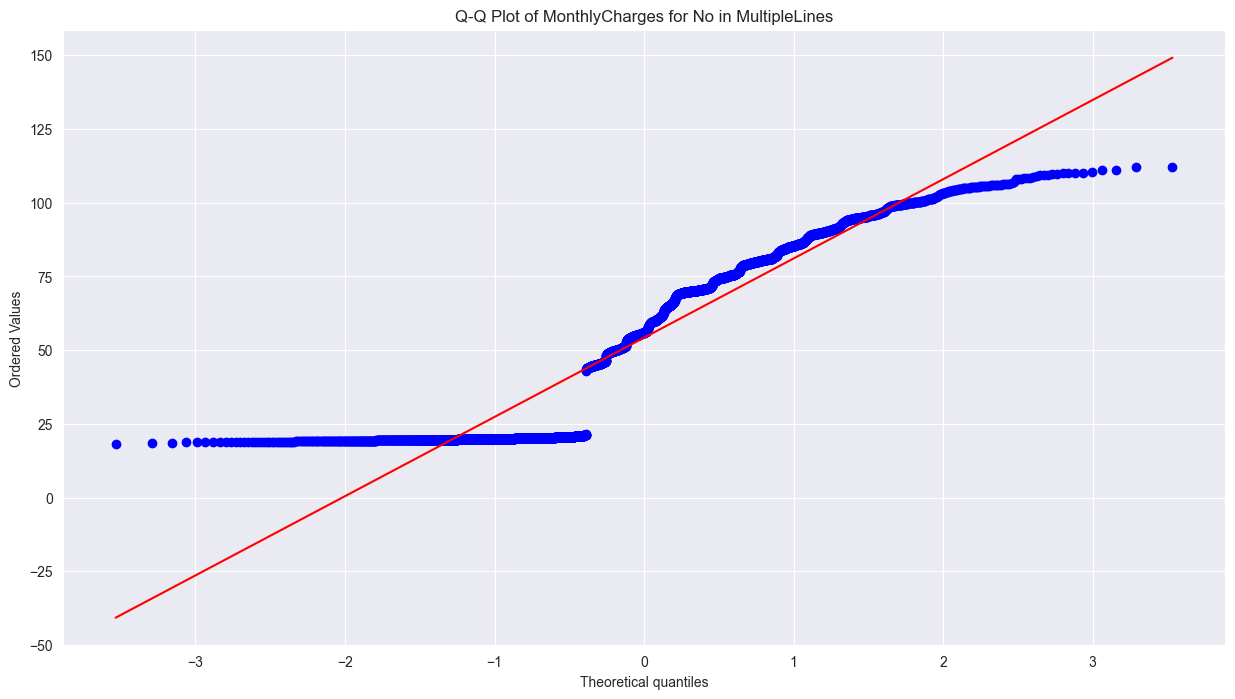


Checking normality for Yes in MultipleLines
Shapiro-Wilk test for Yes in MultipleLines: Stat=0.8719483261119053, P-value=3.9823398032923927e-44
Sample does not look Gaussian (reject H0)


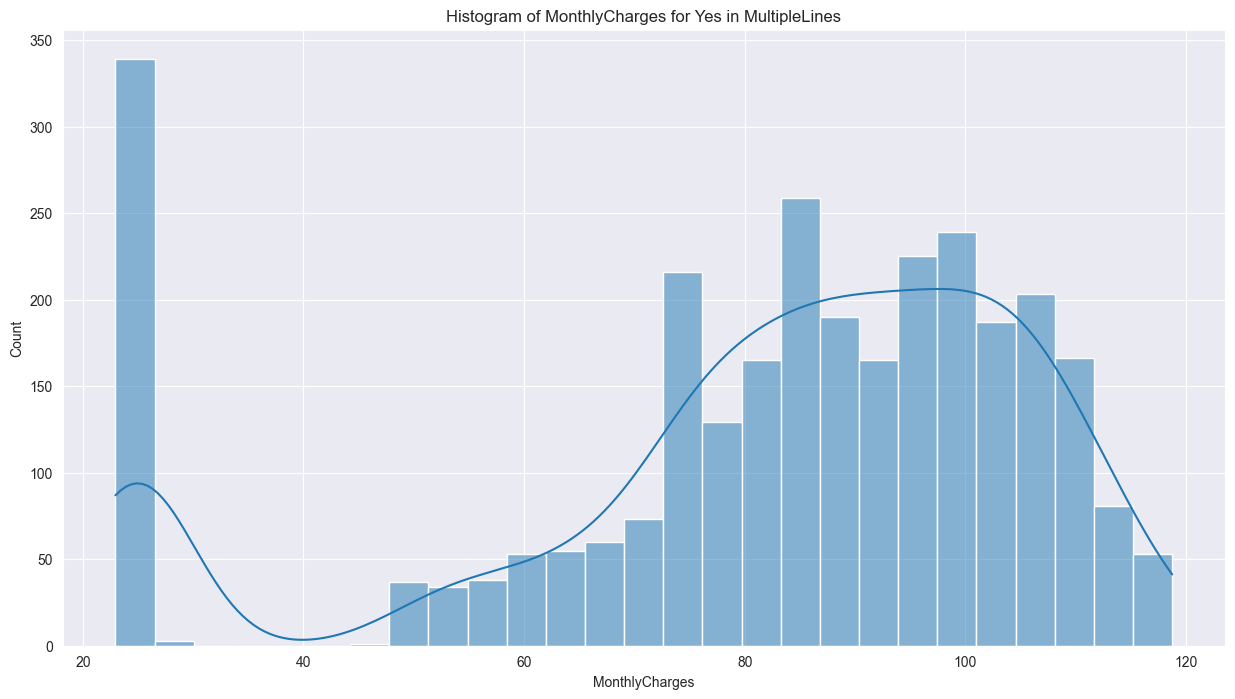

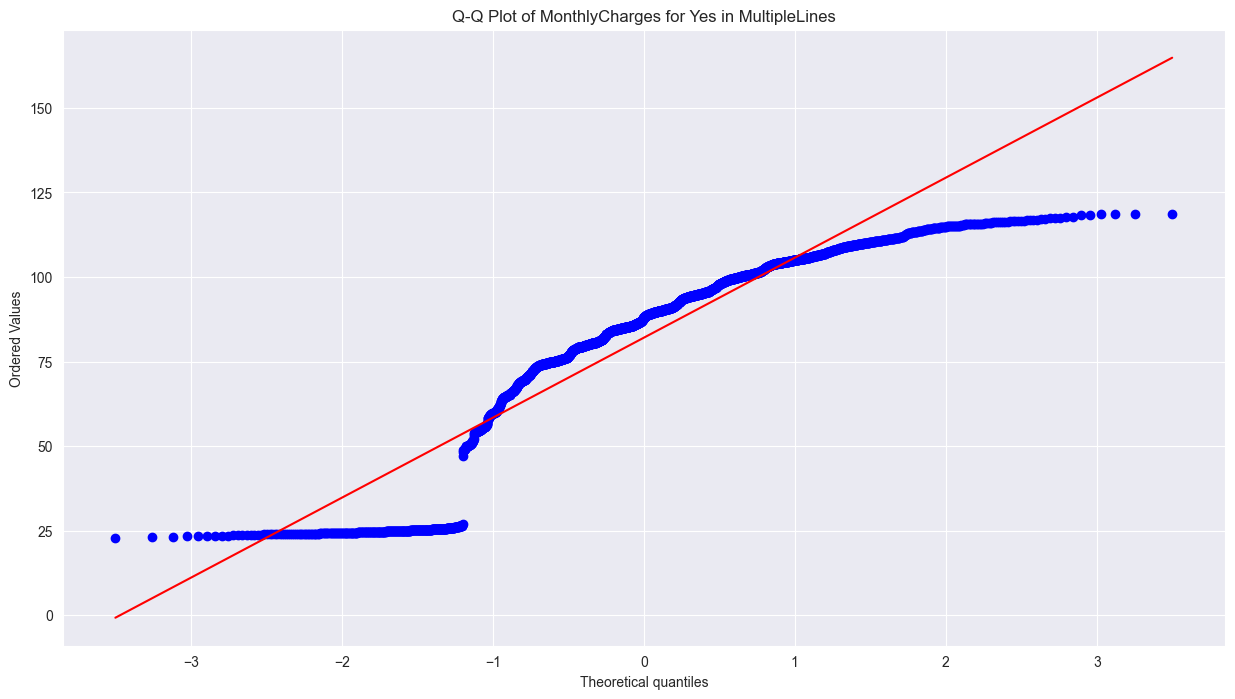



Testing normality for tenure across MultipleLines

Checking normality for No phone service in MultipleLines
Shapiro-Wilk test for No phone service in MultipleLines: Stat=0.9073215000088486, P-value=6.164730623378062e-20
Sample does not look Gaussian (reject H0)


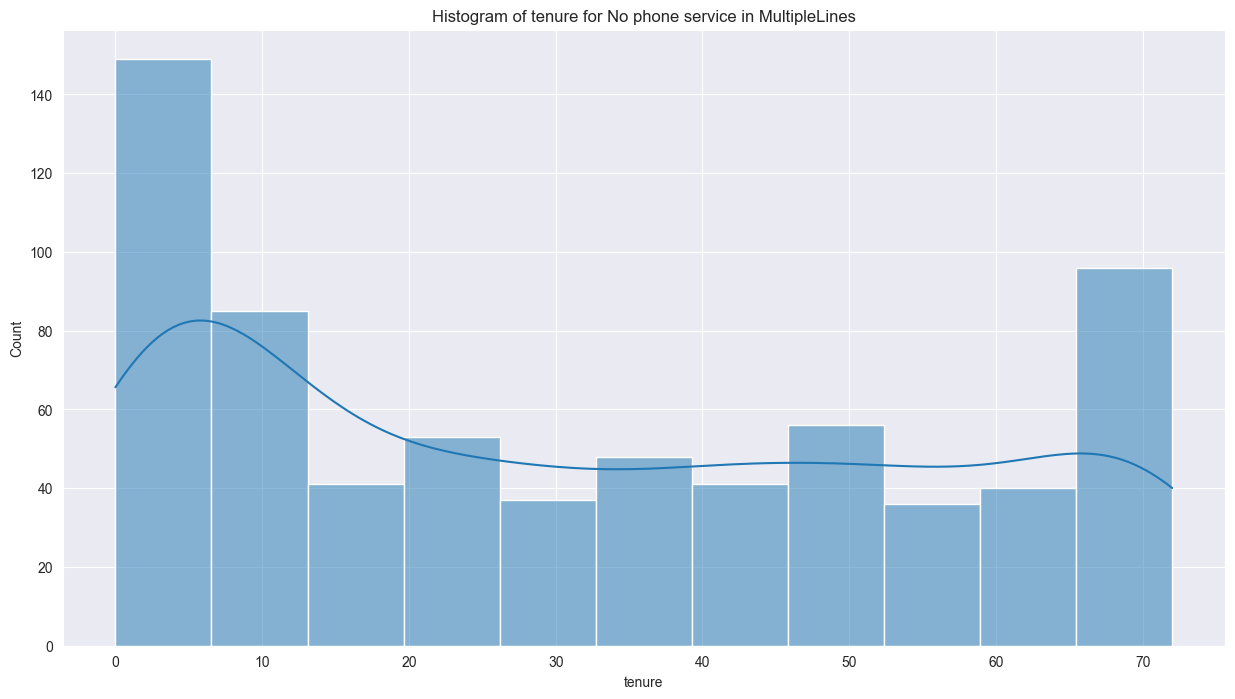

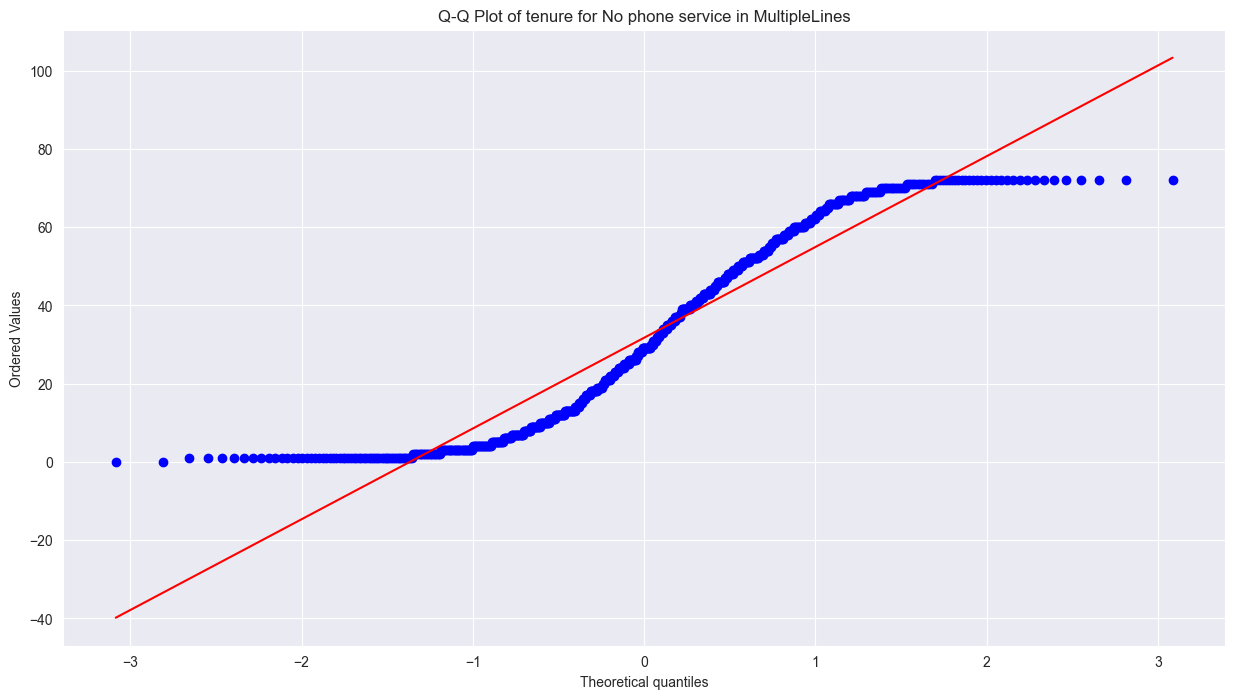


Checking normality for No in MultipleLines
Shapiro-Wilk test for No in MultipleLines: Stat=0.875669605294424, P-value=6.291291818785514e-46
Sample does not look Gaussian (reject H0)


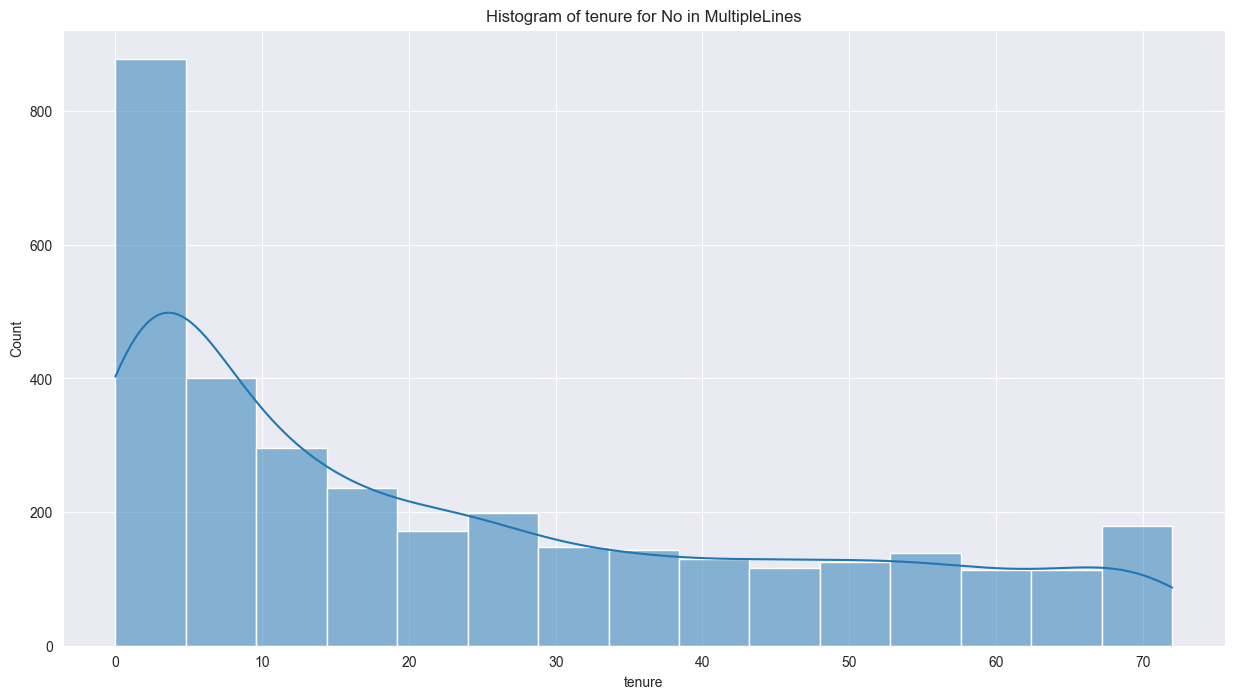

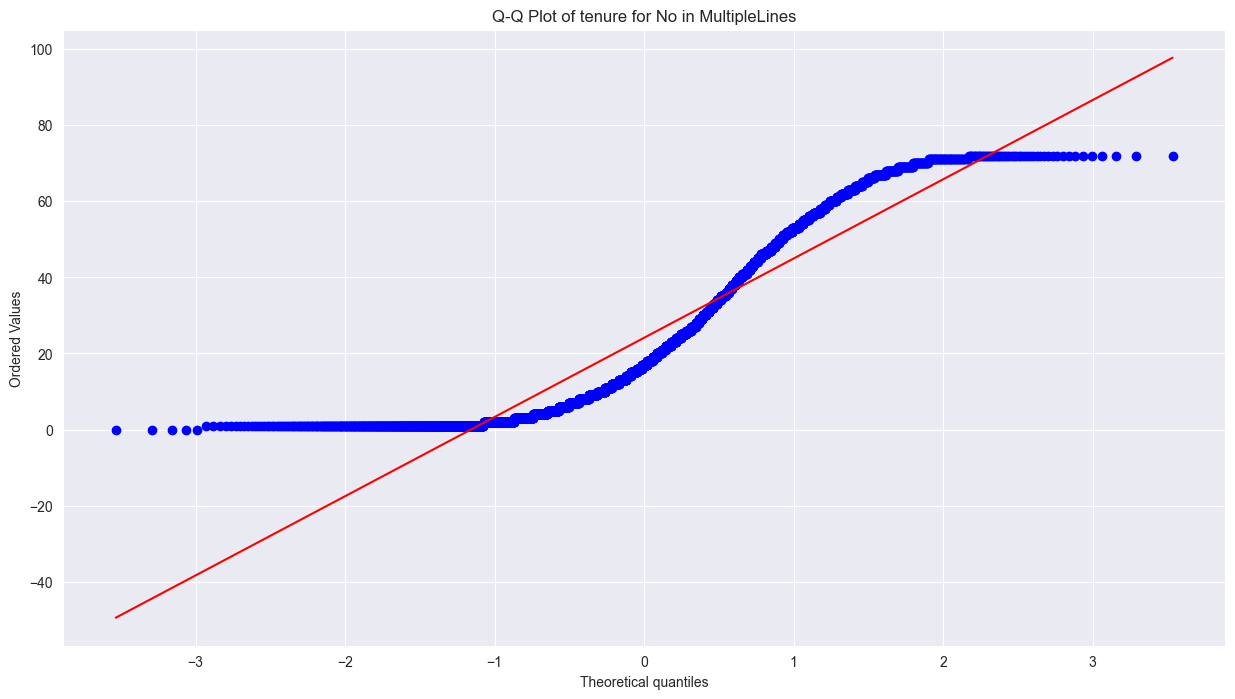


Checking normality for Yes in MultipleLines
Shapiro-Wilk test for Yes in MultipleLines: Stat=0.9104816621636843, P-value=1.0299121624219484e-38
Sample does not look Gaussian (reject H0)


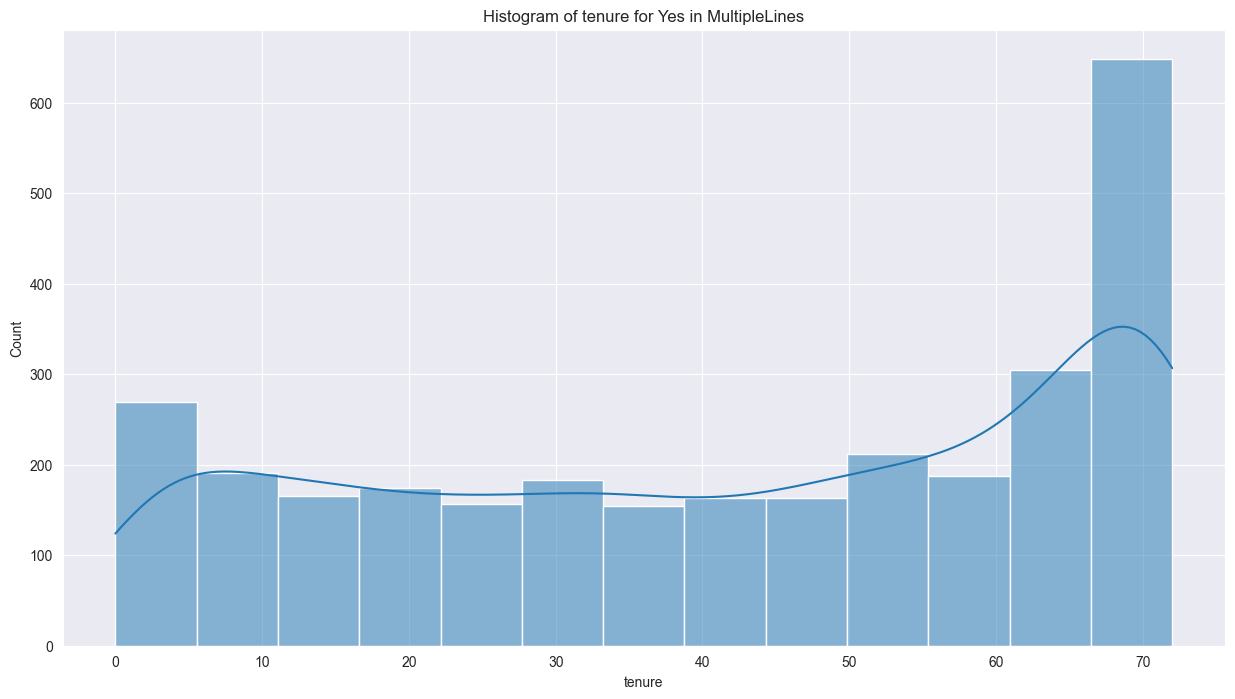

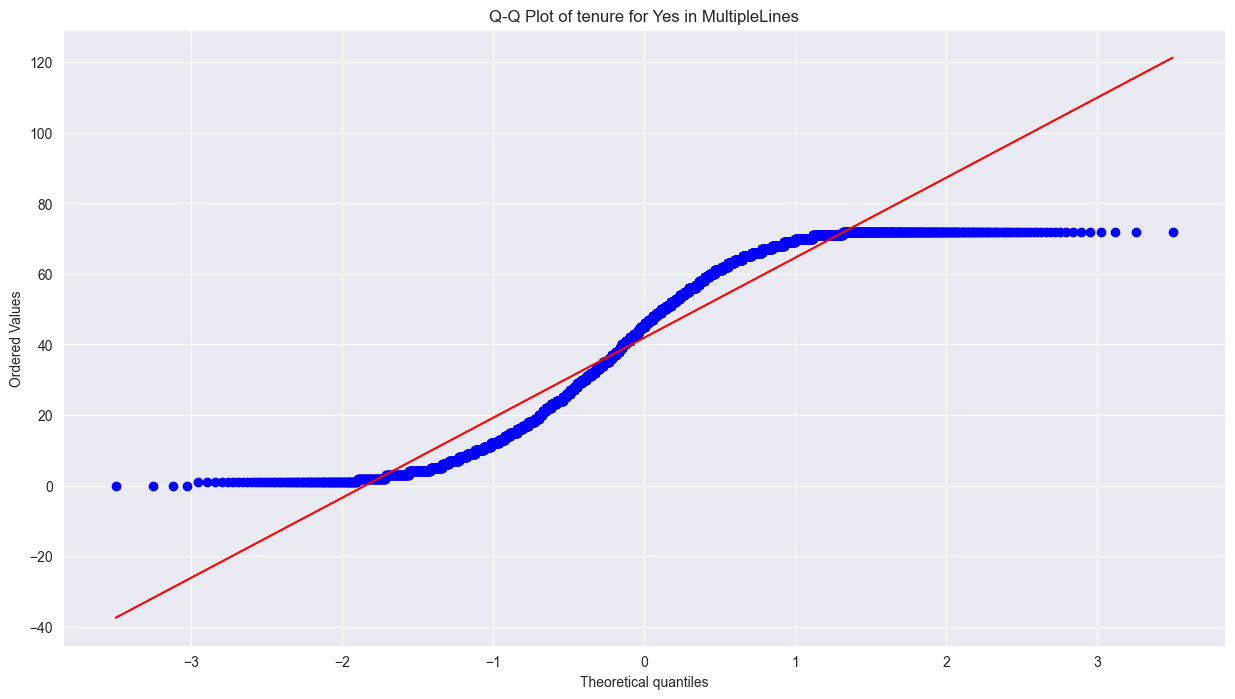



Testing normality for TotalCharges across OnlineBackup

Checking normality for Yes in OnlineBackup
Shapiro-Wilk test for Yes in OnlineBackup: Stat=0.9580077784658472, P-value=6.370454906726503e-26
Sample does not look Gaussian (reject H0)


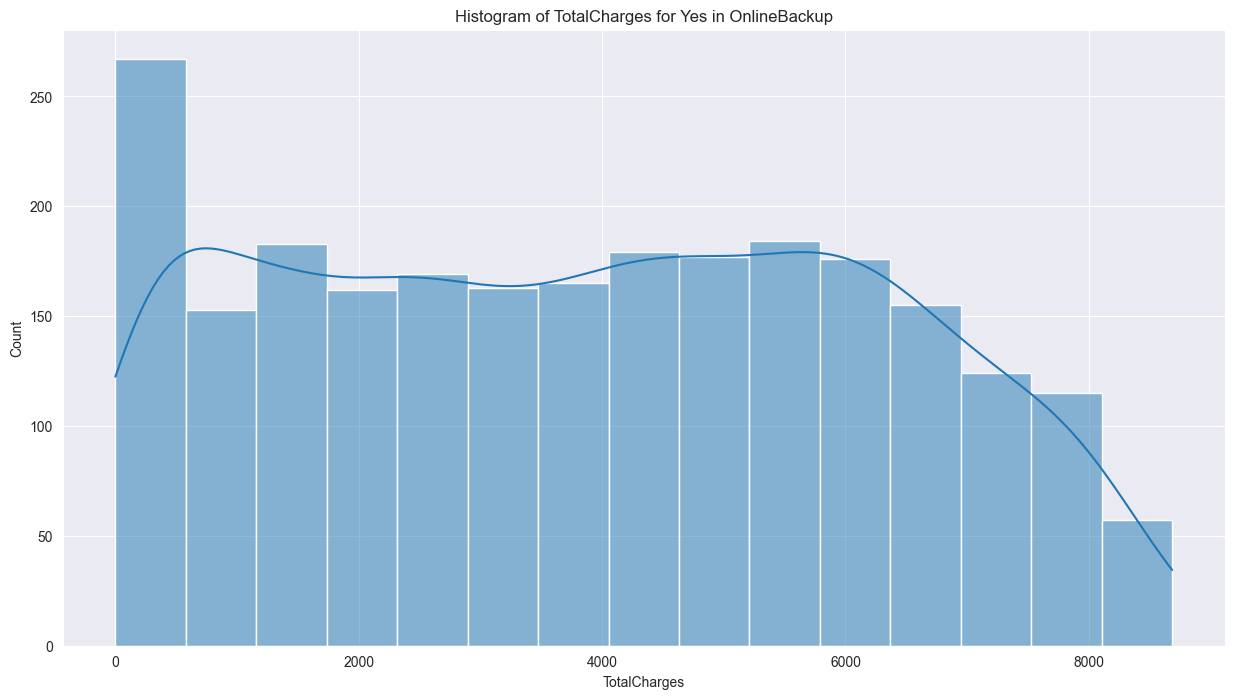

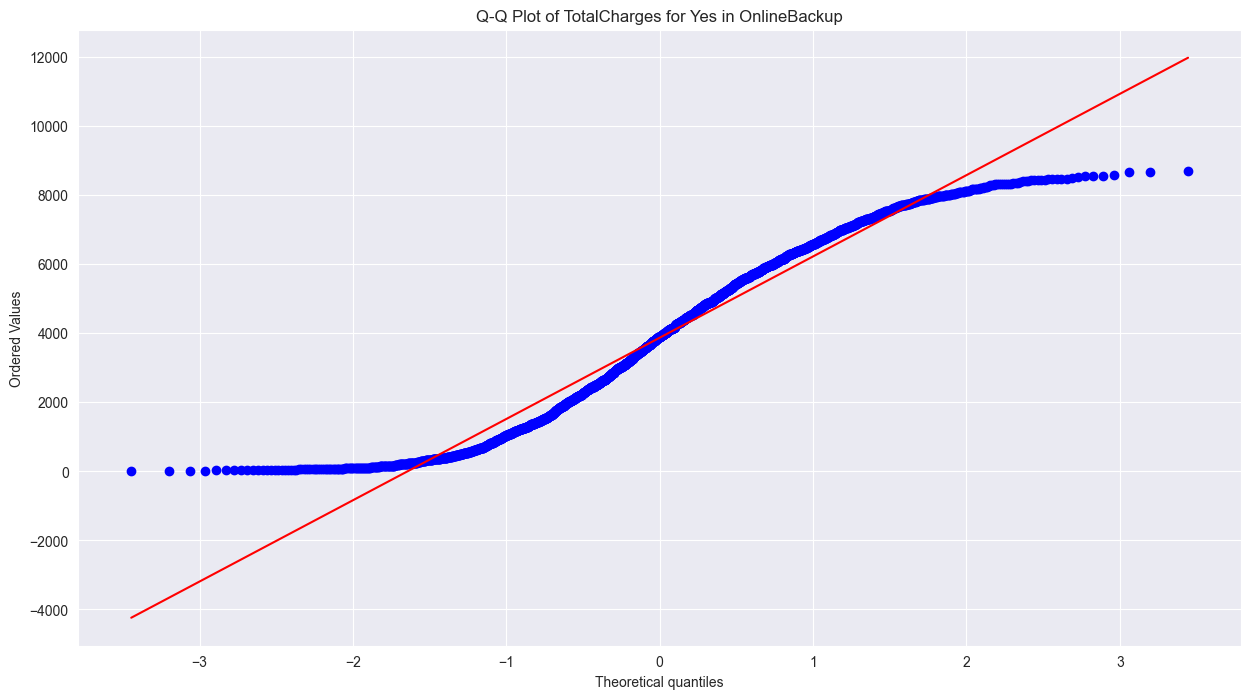


Checking normality for No in OnlineBackup
Shapiro-Wilk test for No in OnlineBackup: Stat=0.8511432775054896, P-value=3.410003878747411e-47
Sample does not look Gaussian (reject H0)


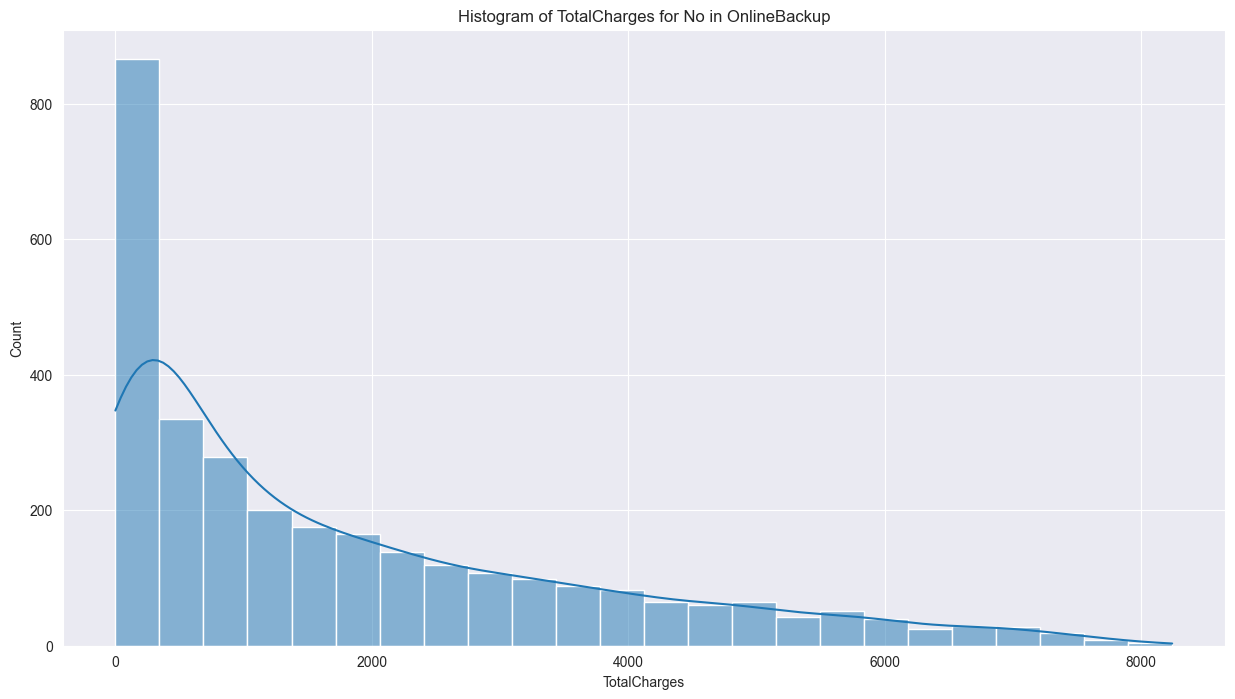

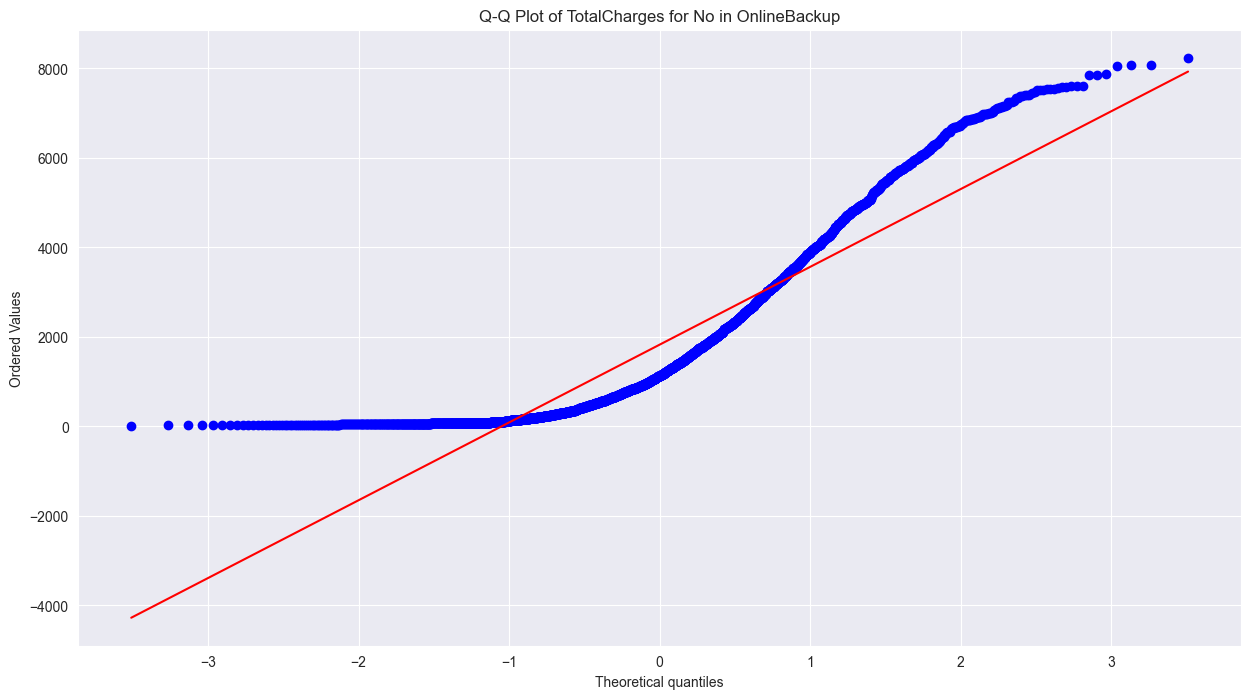


Checking normality for No internet service in OnlineBackup
Shapiro-Wilk test for No internet service in OnlineBackup: Stat=0.9104922590276707, P-value=4.65300183601524e-29
Sample does not look Gaussian (reject H0)


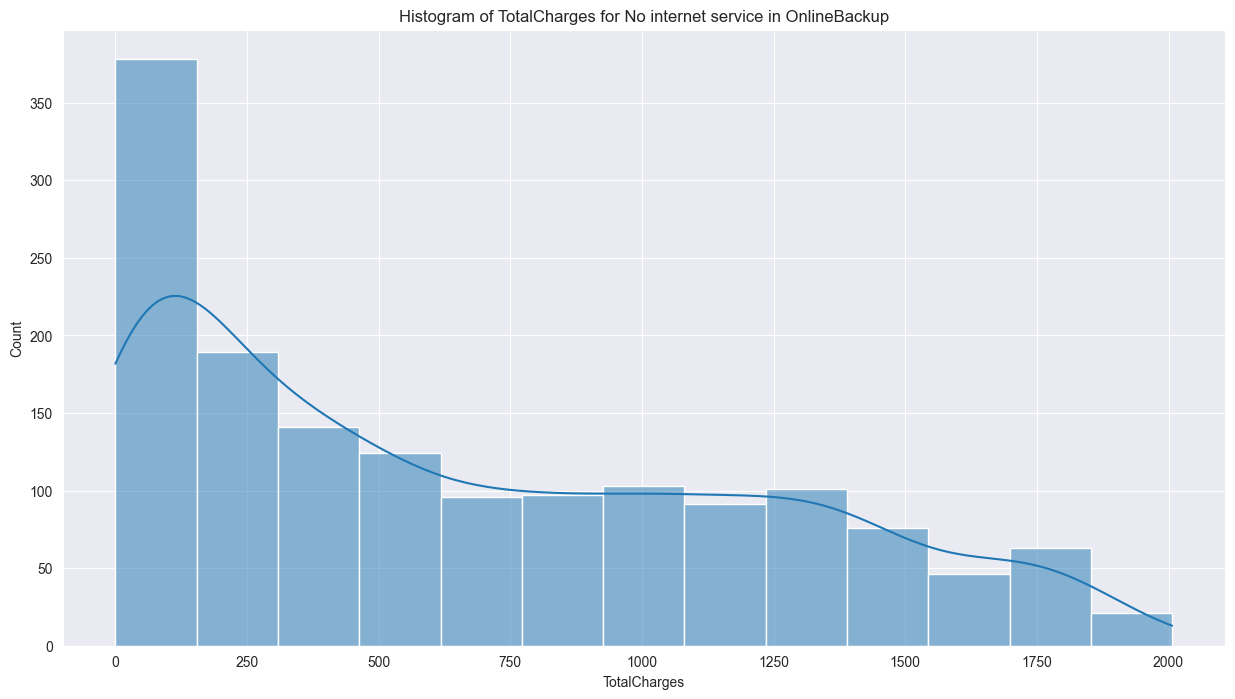

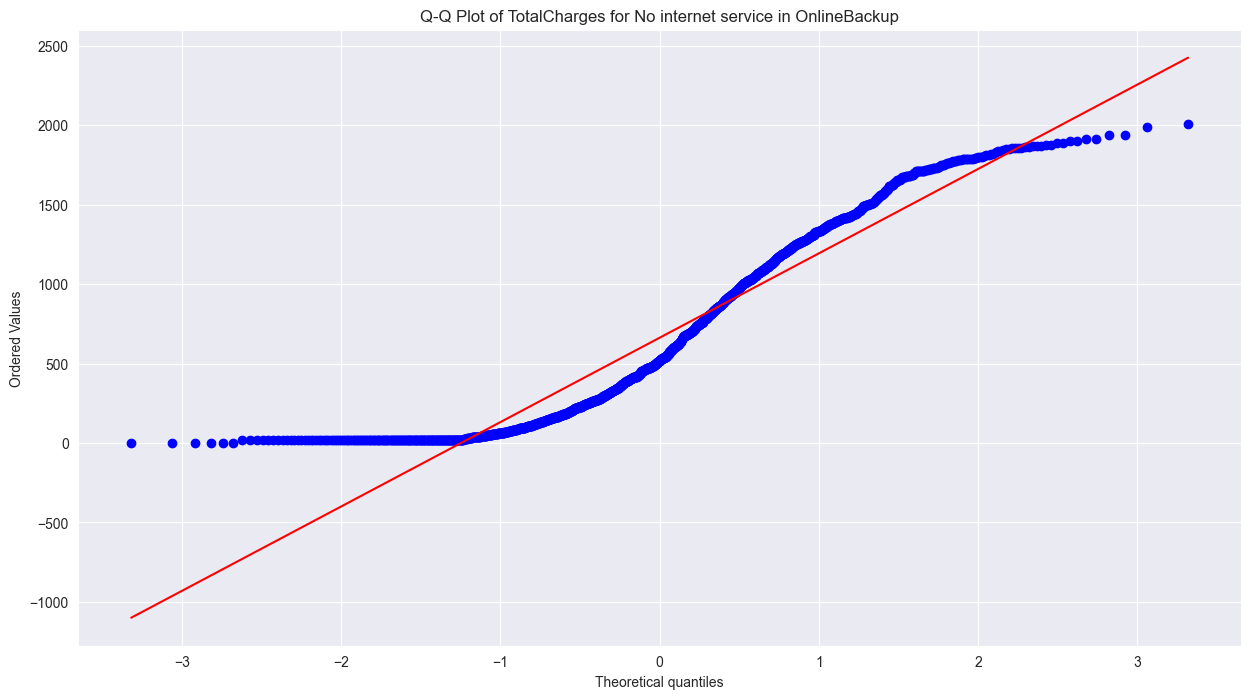



Testing normality for MonthlyCharges across OnlineBackup

Checking normality for Yes in OnlineBackup
Shapiro-Wilk test for Yes in OnlineBackup: Stat=0.9604696941756723, P-value=3.22554311215621e-25
Sample does not look Gaussian (reject H0)


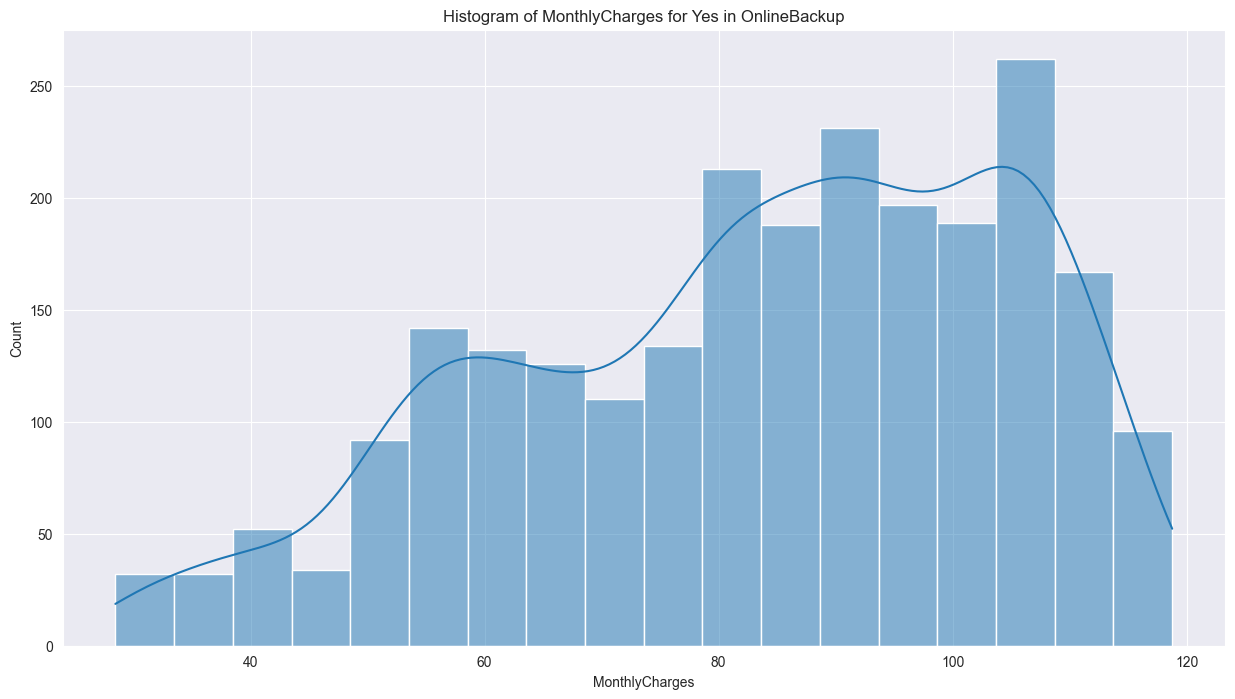

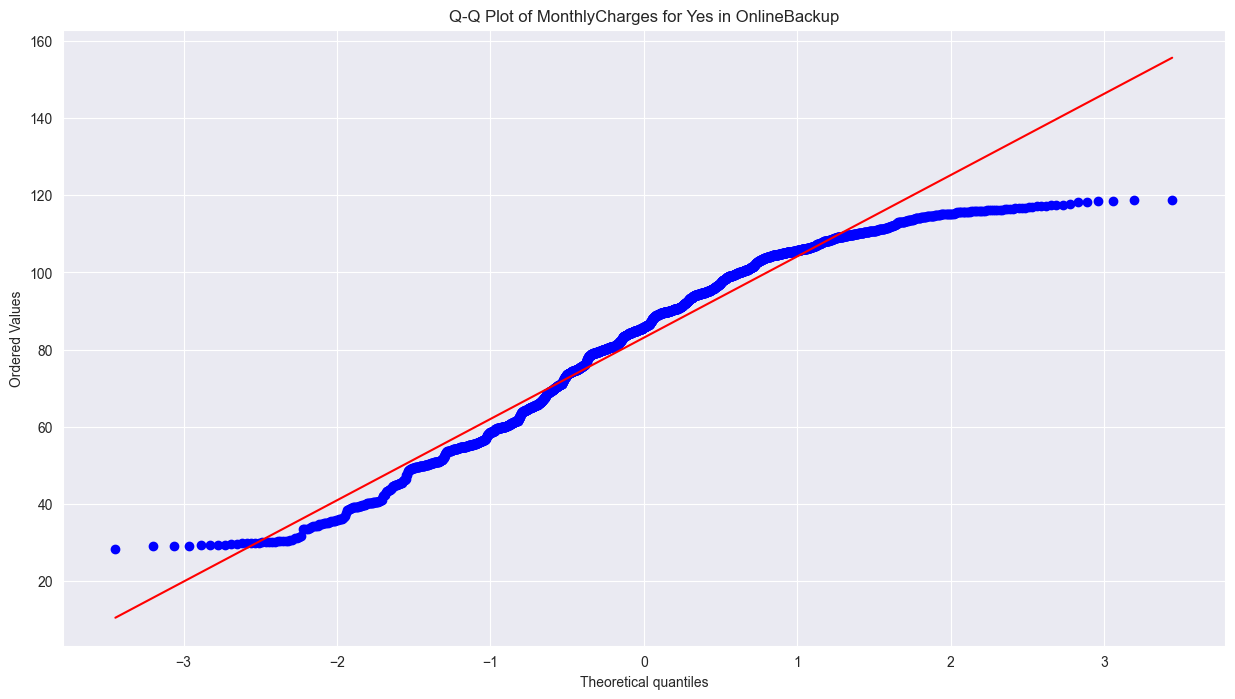


Checking normality for No in OnlineBackup
Shapiro-Wilk test for No in OnlineBackup: Stat=0.9702709747779701, P-value=8.07200877117198e-25
Sample does not look Gaussian (reject H0)


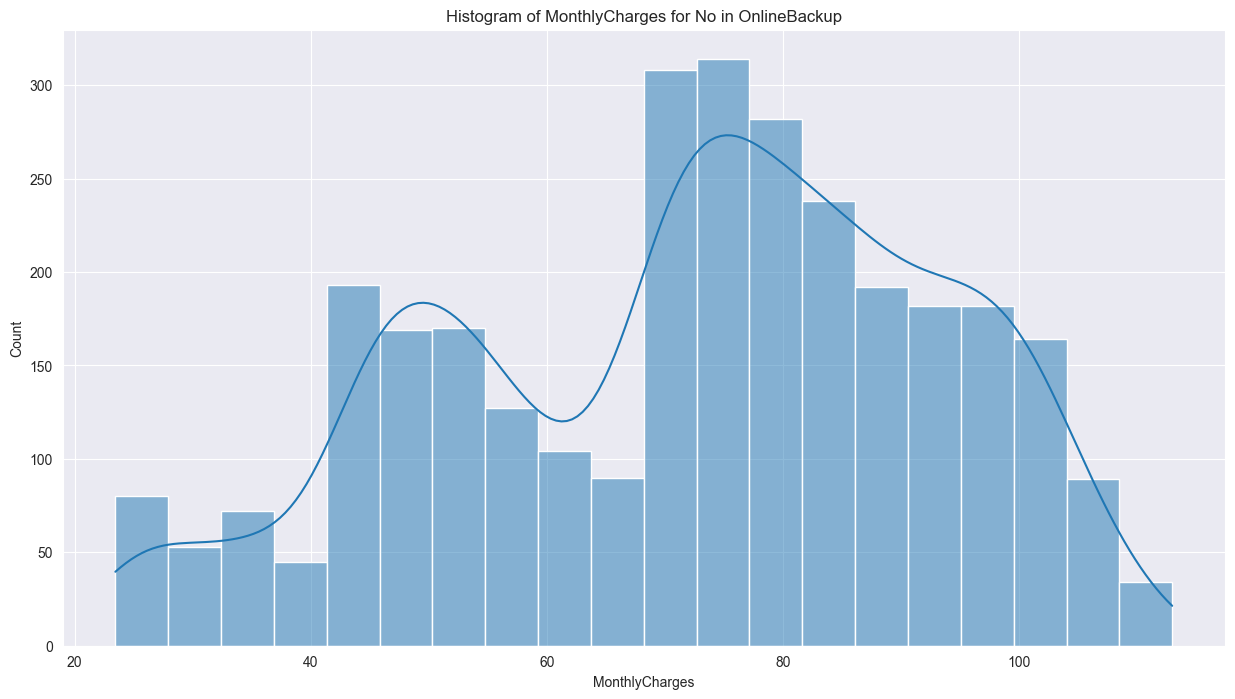

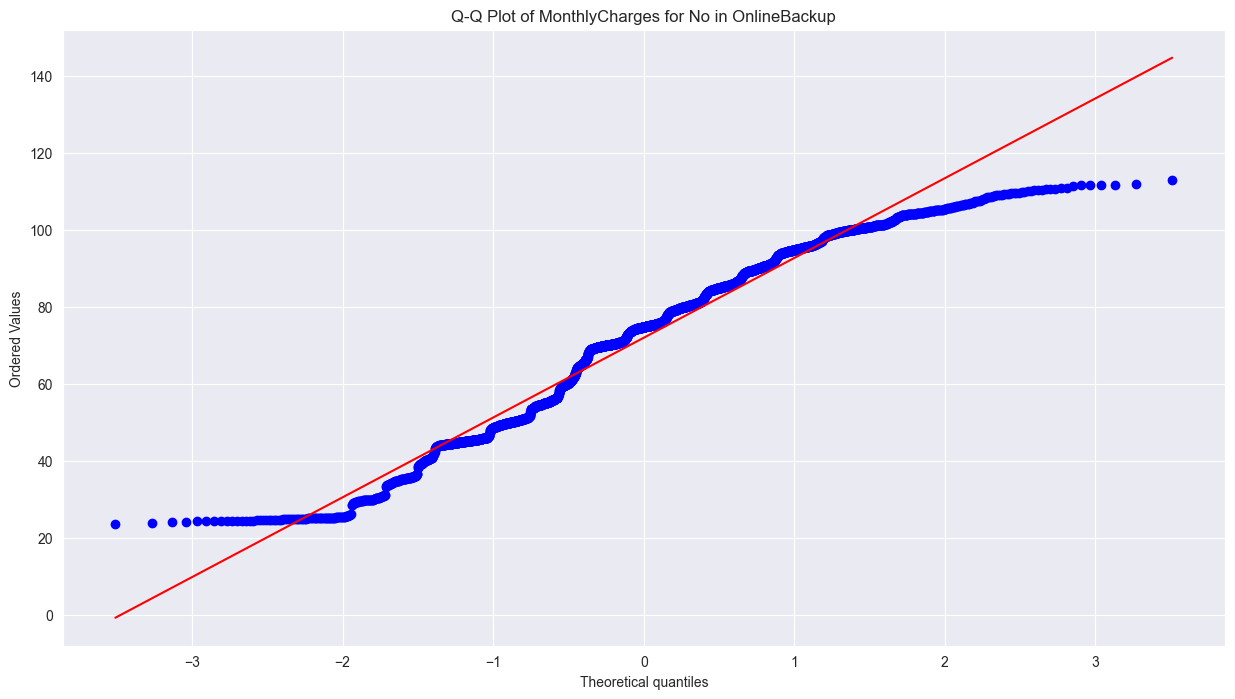


Checking normality for No internet service in OnlineBackup
Shapiro-Wilk test for No internet service in OnlineBackup: Stat=0.737174468549471, P-value=7.401146663640557e-44
Sample does not look Gaussian (reject H0)


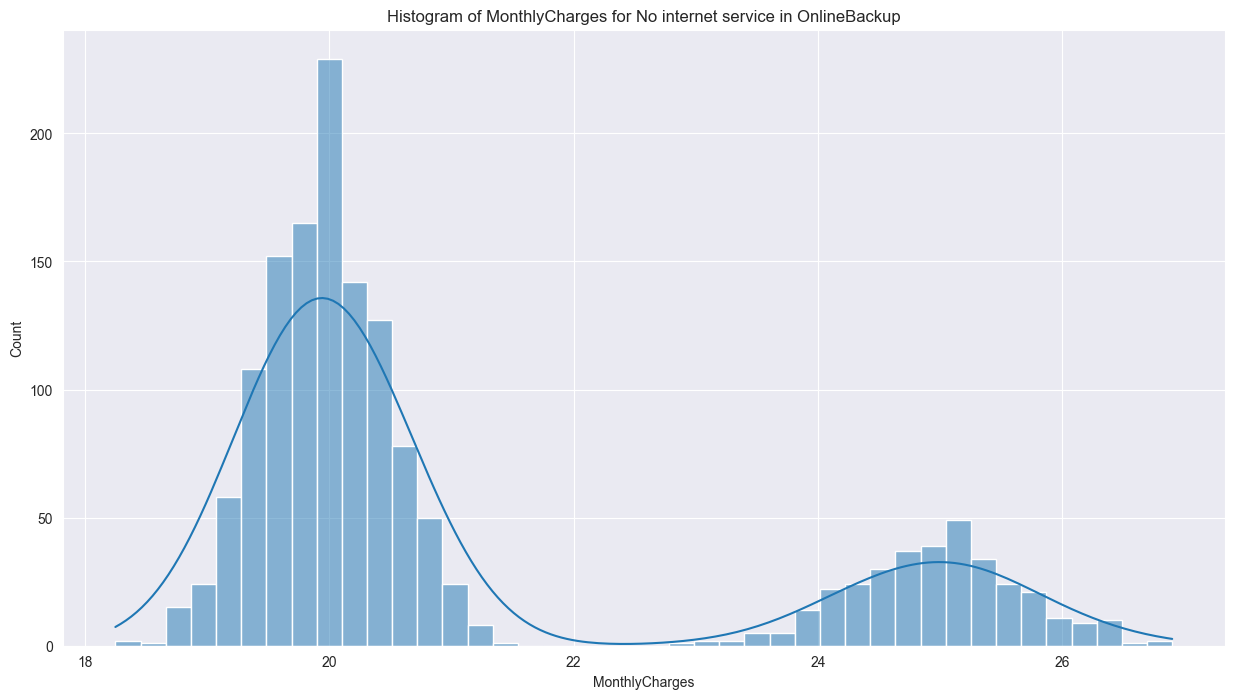

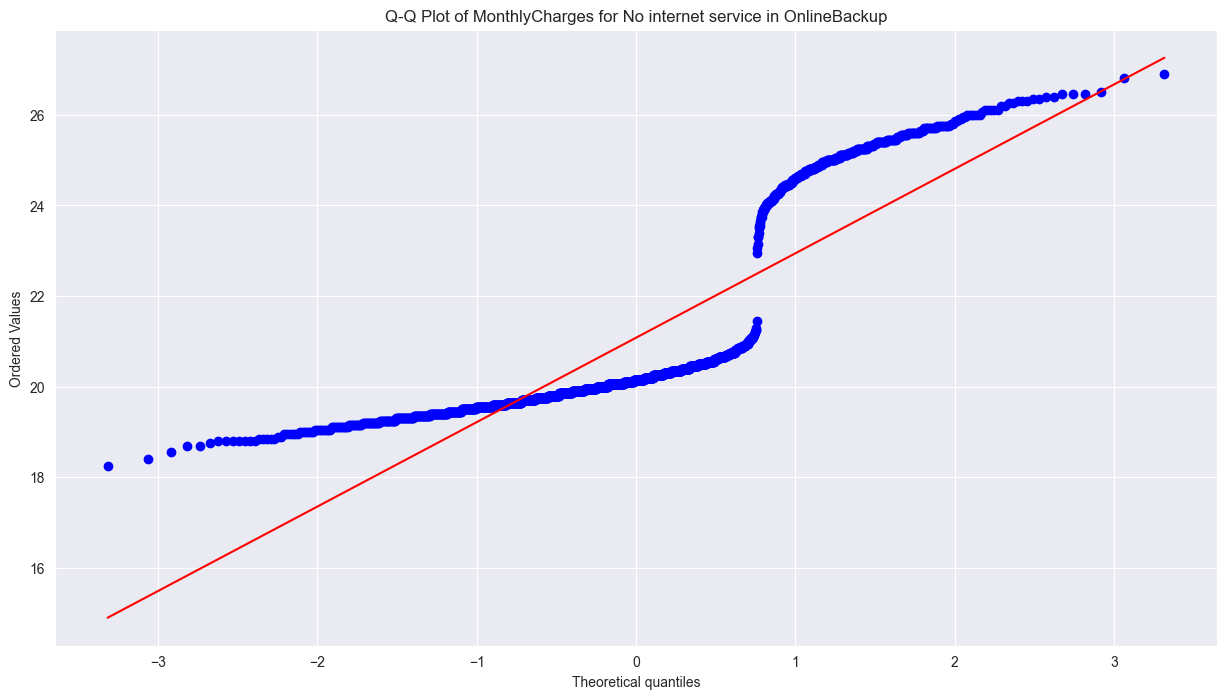



Testing normality for tenure across OnlineBackup

Checking normality for Yes in OnlineBackup
Shapiro-Wilk test for Yes in OnlineBackup: Stat=0.9020782492743271, P-value=7.019632571183518e-37
Sample does not look Gaussian (reject H0)


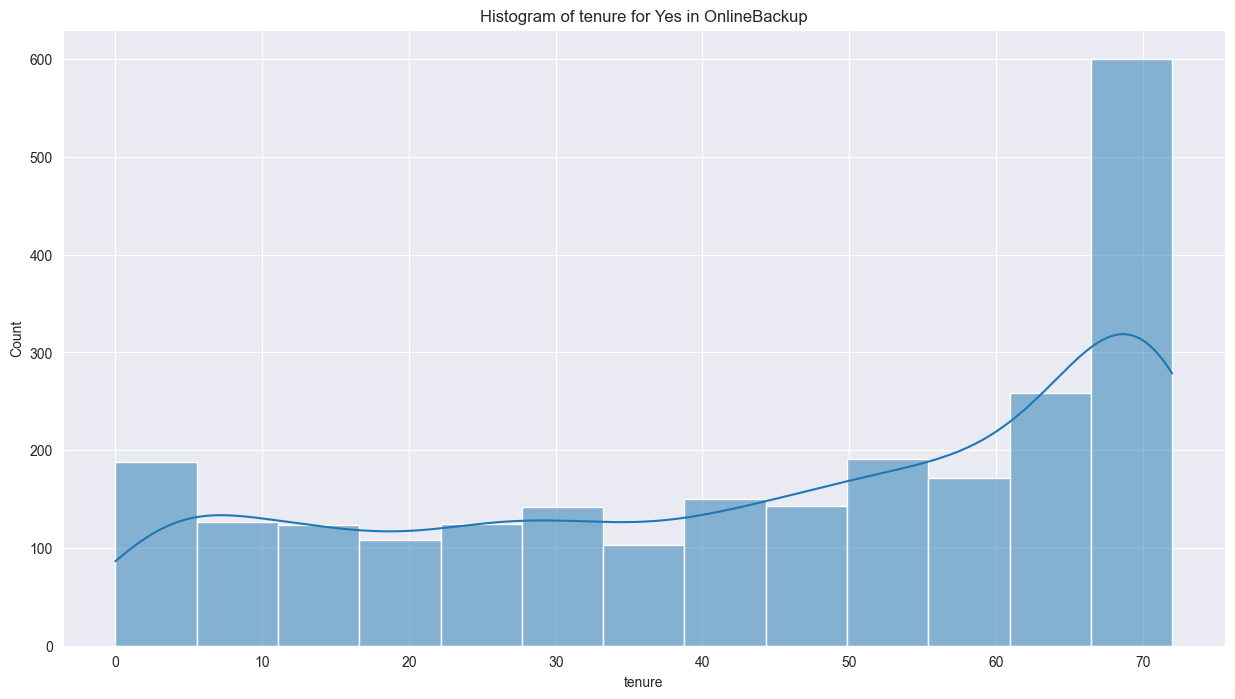

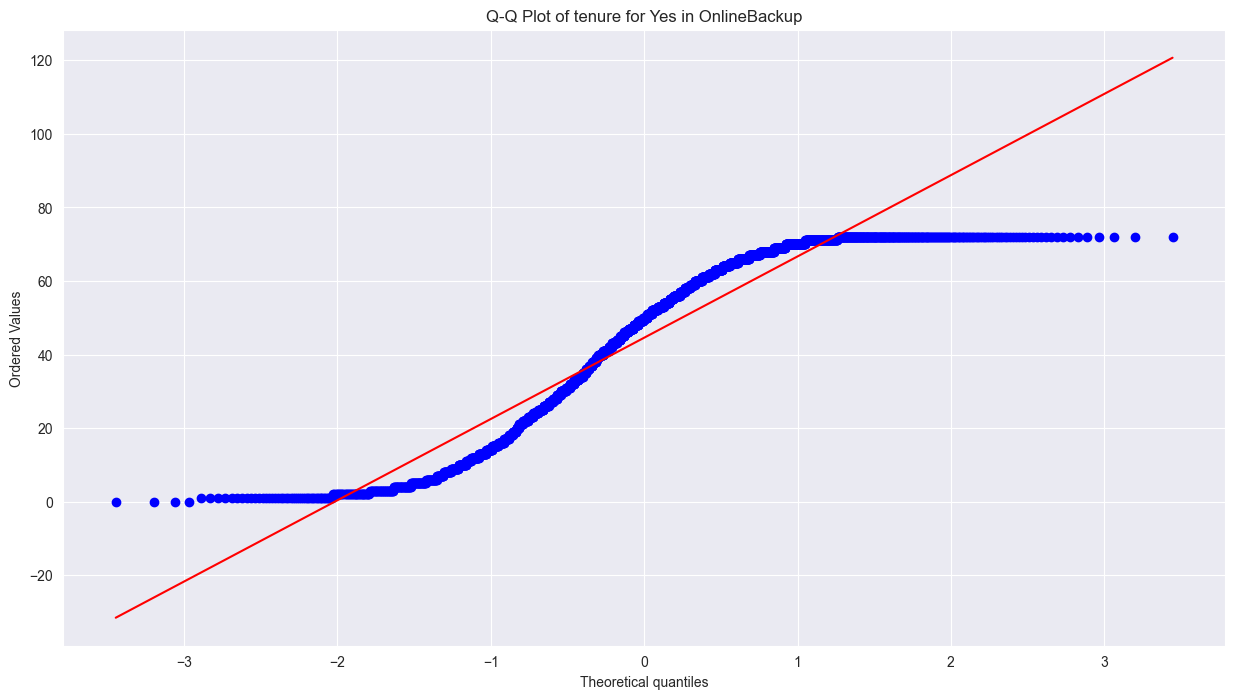


Checking normality for No in OnlineBackup
Shapiro-Wilk test for No in OnlineBackup: Stat=0.8810451269504784, P-value=1.2450024378348414e-43
Sample does not look Gaussian (reject H0)


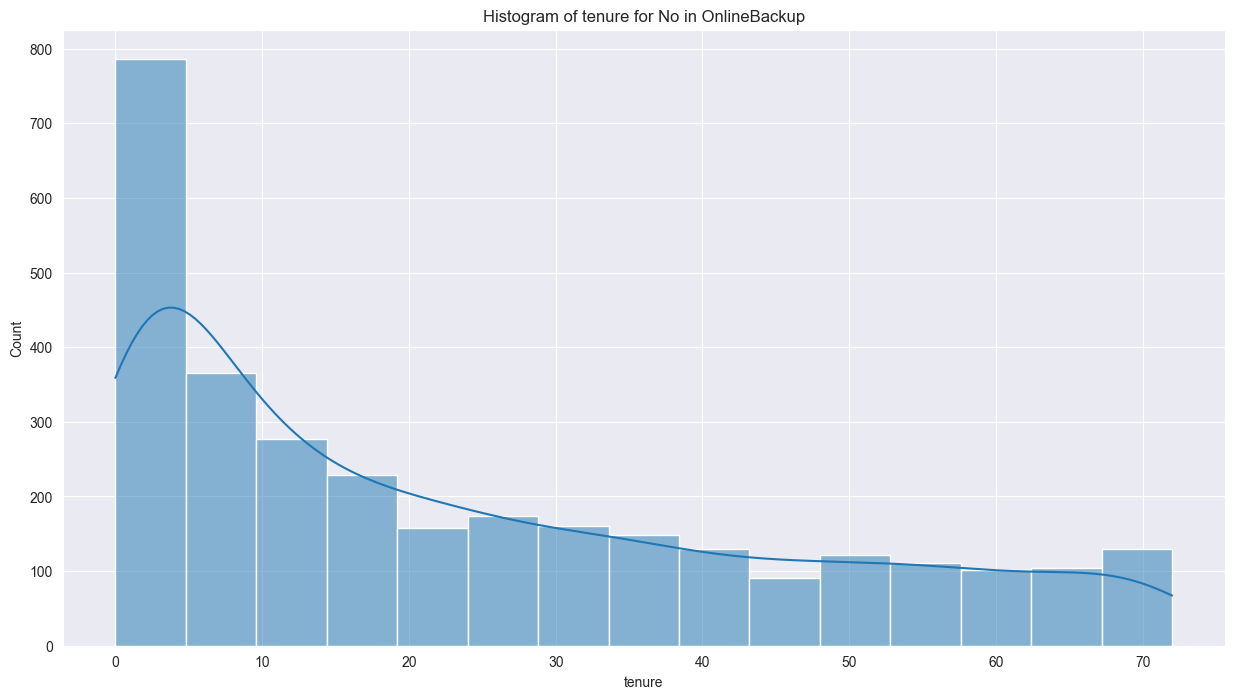

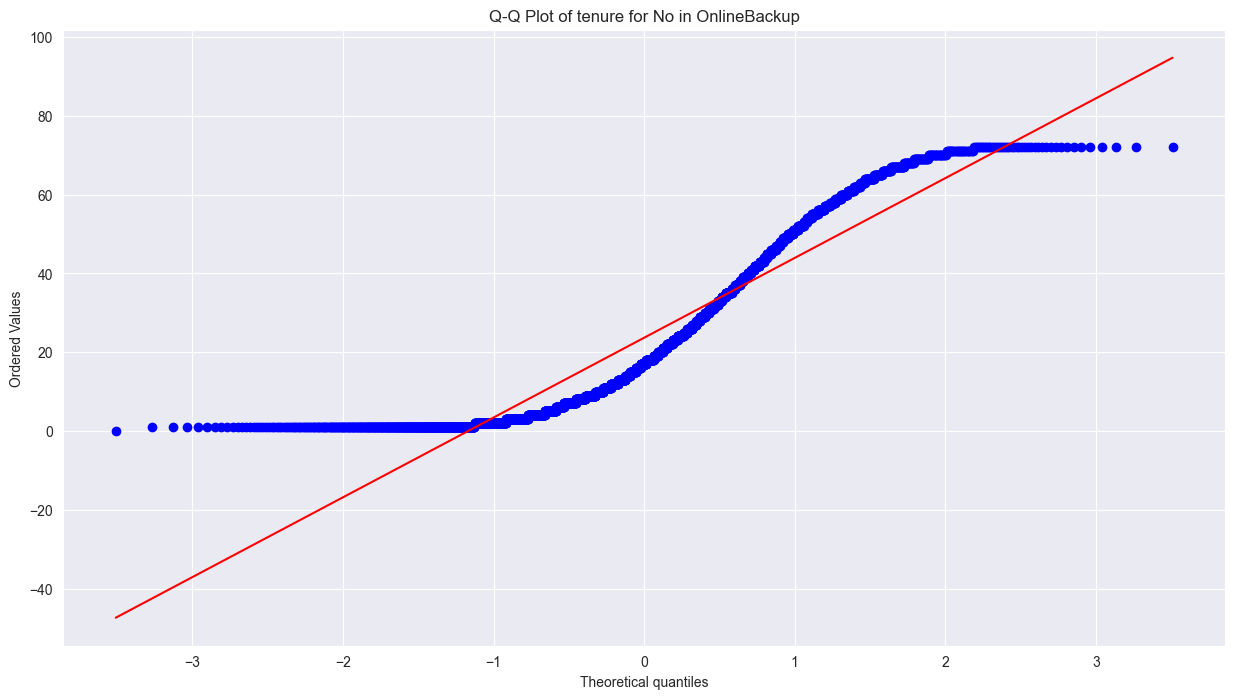


Checking normality for No internet service in OnlineBackup
Shapiro-Wilk test for No internet service in OnlineBackup: Stat=0.8989356849365119, P-value=1.4395104677621417e-30
Sample does not look Gaussian (reject H0)


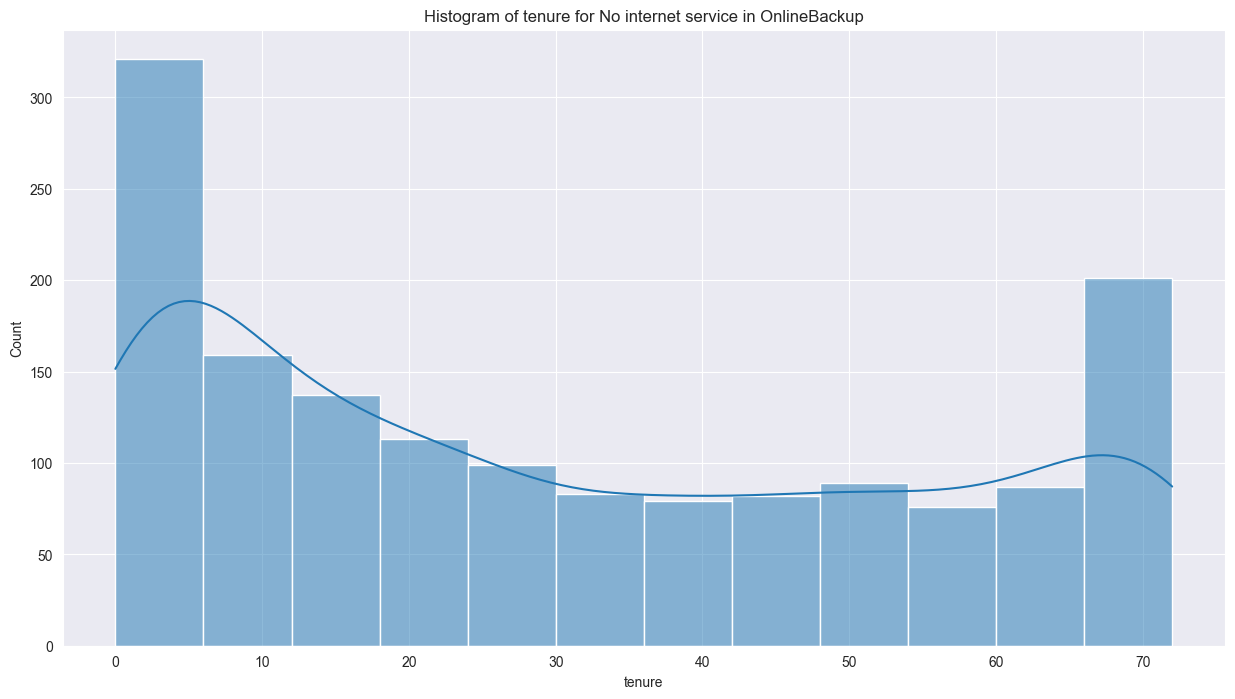

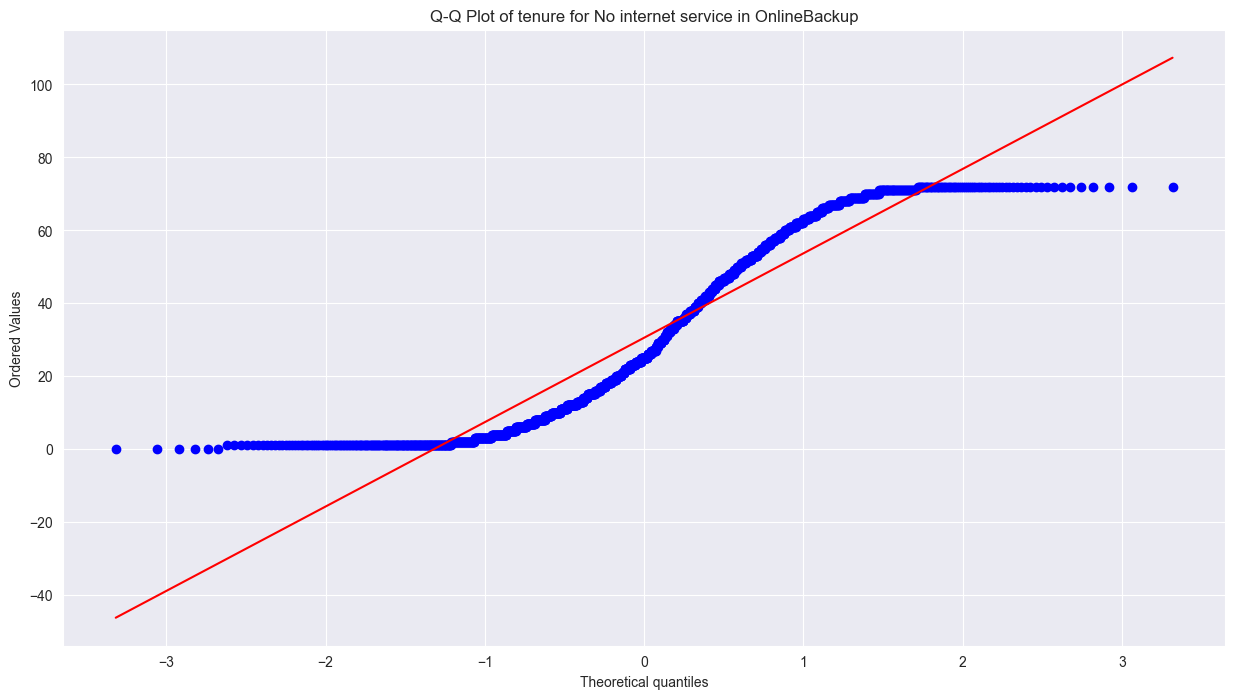



Testing normality for TotalCharges across StreamingTV

Checking normality for No in StreamingTV
Shapiro-Wilk test for No in StreamingTV: Stat=0.8566745603086661, P-value=6.096528225650486e-45
Sample does not look Gaussian (reject H0)


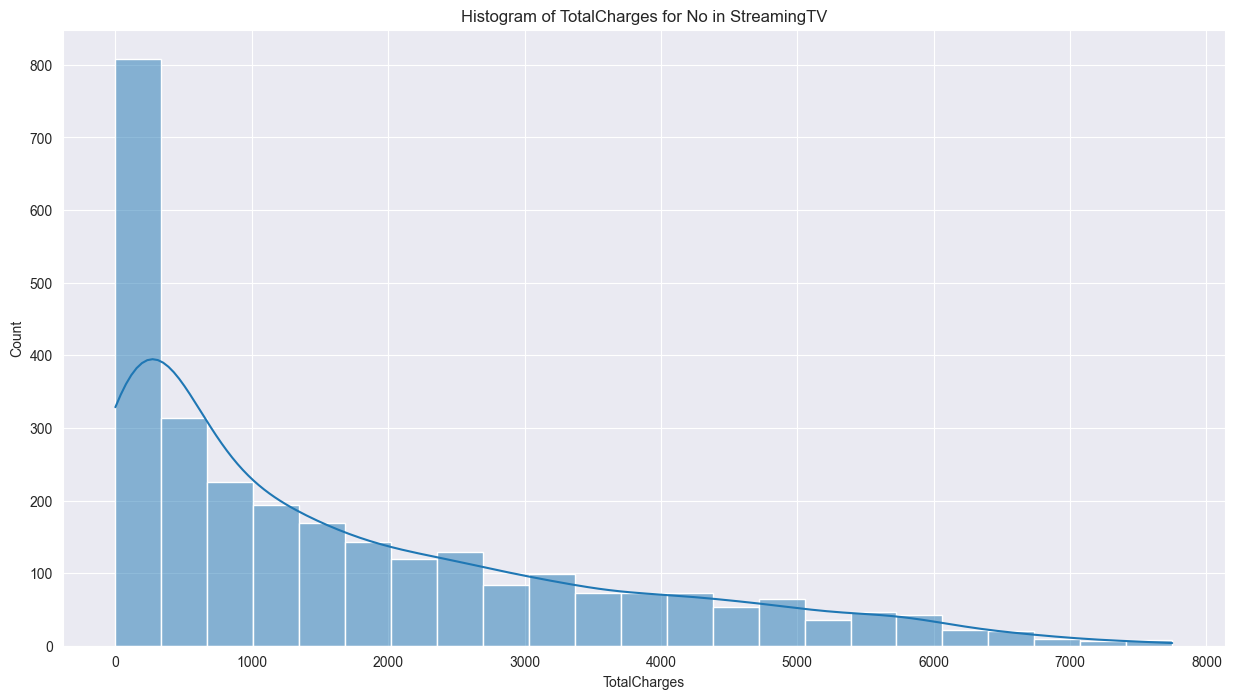

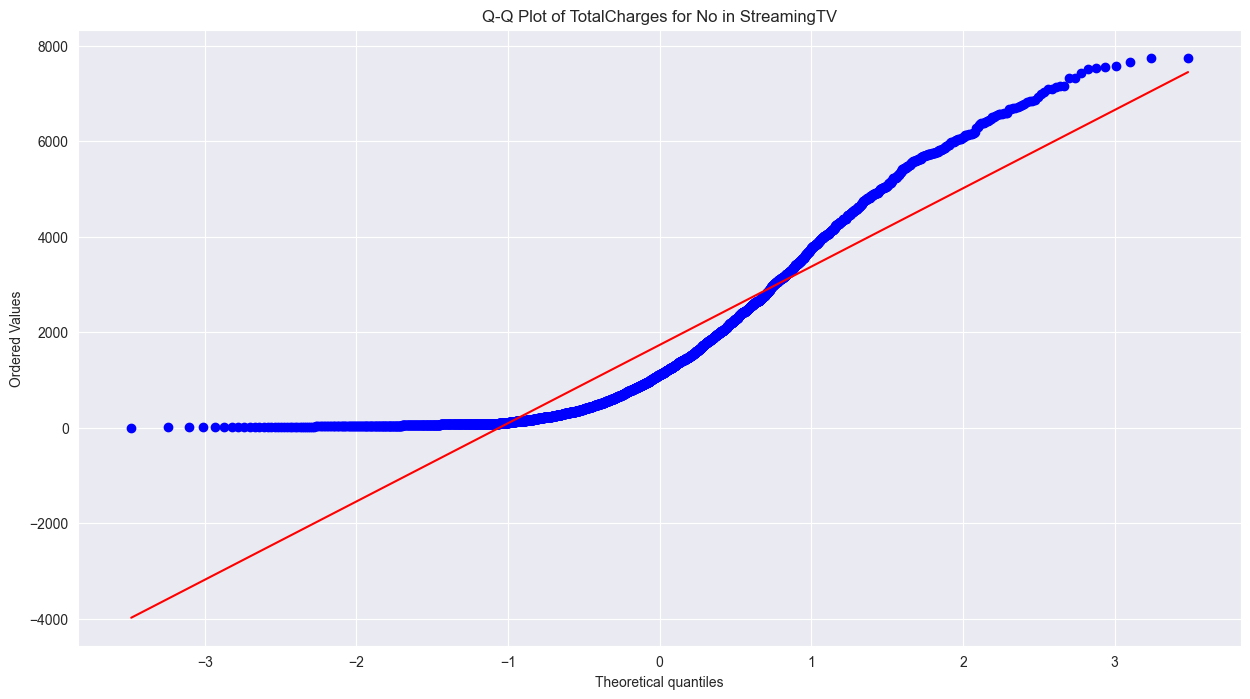


Checking normality for Yes in StreamingTV
Shapiro-Wilk test for Yes in StreamingTV: Stat=0.9502190330994961, P-value=2.2017830708552053e-29
Sample does not look Gaussian (reject H0)


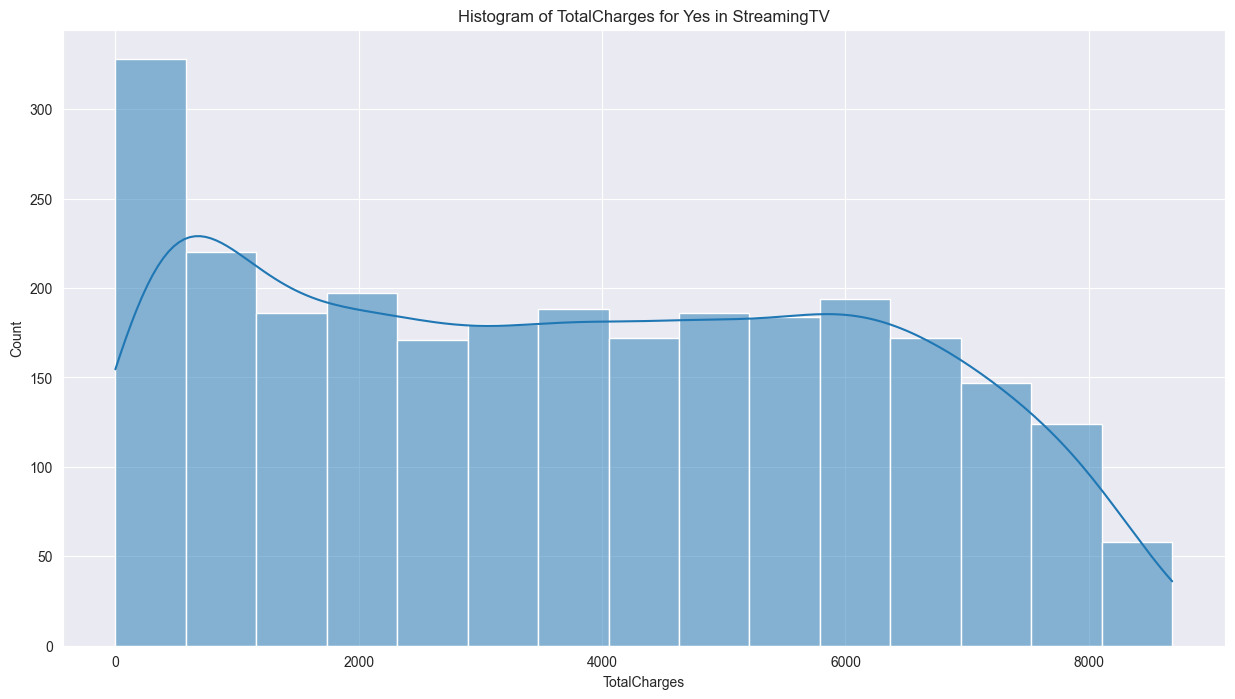

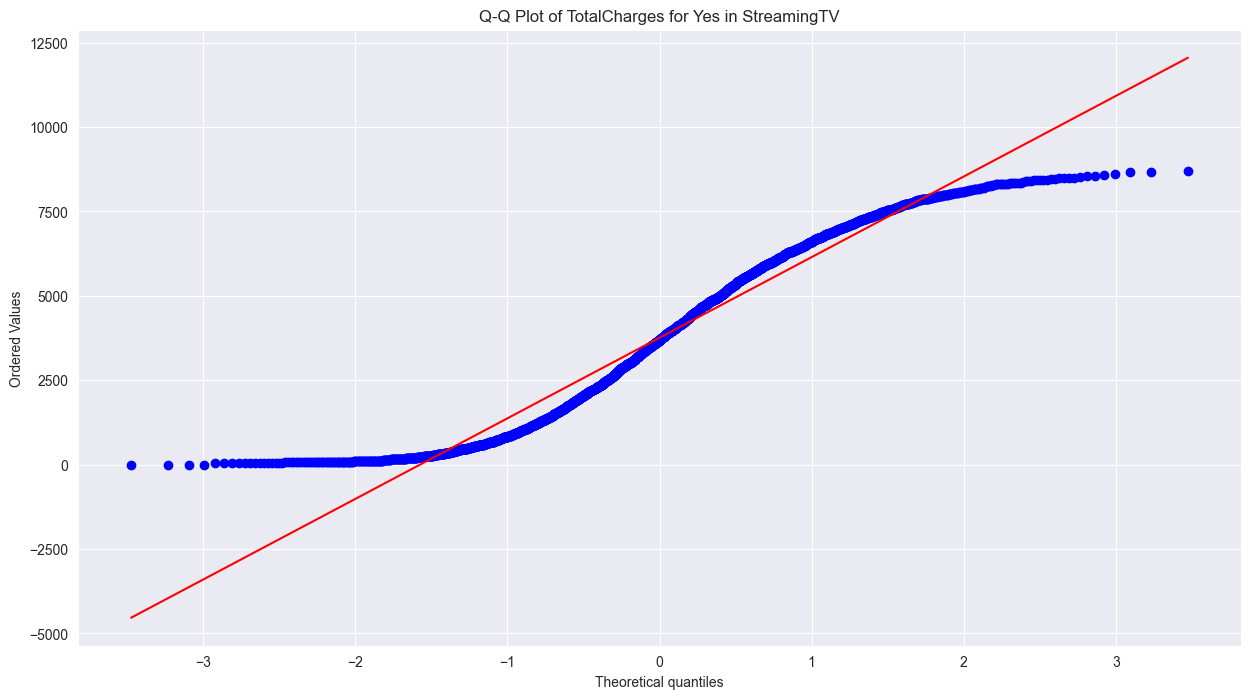


Checking normality for No internet service in StreamingTV
Shapiro-Wilk test for No internet service in StreamingTV: Stat=0.9104922590276707, P-value=4.65300183601524e-29
Sample does not look Gaussian (reject H0)


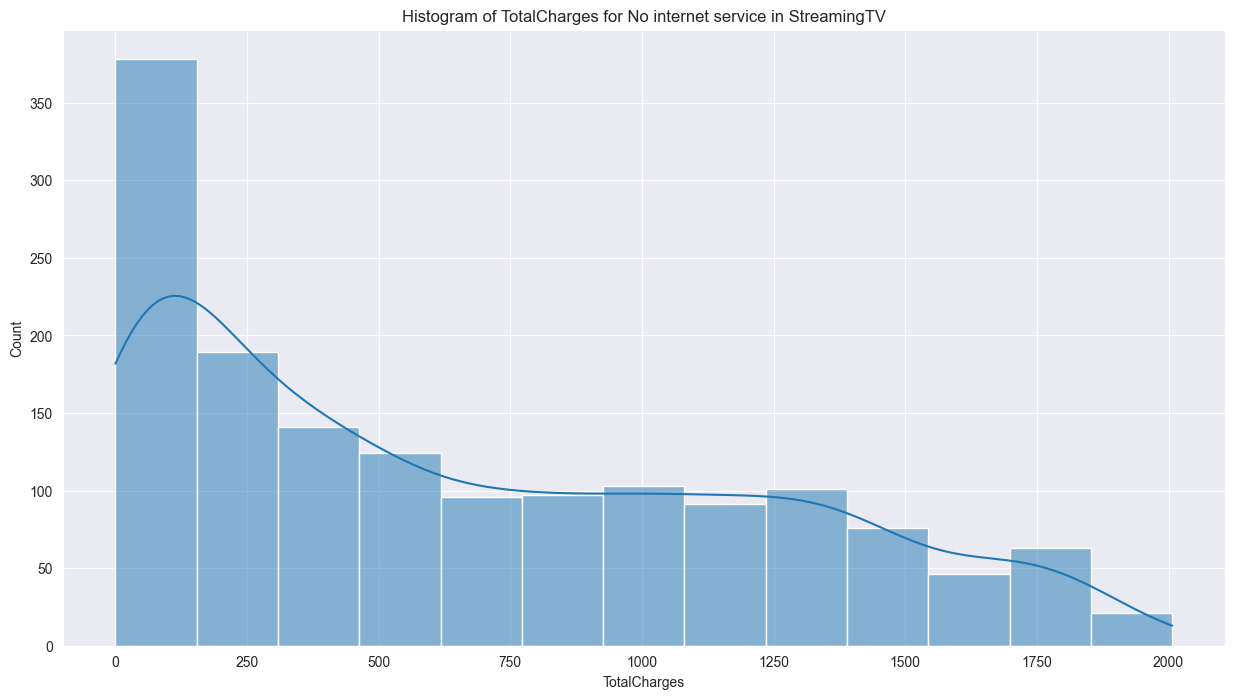

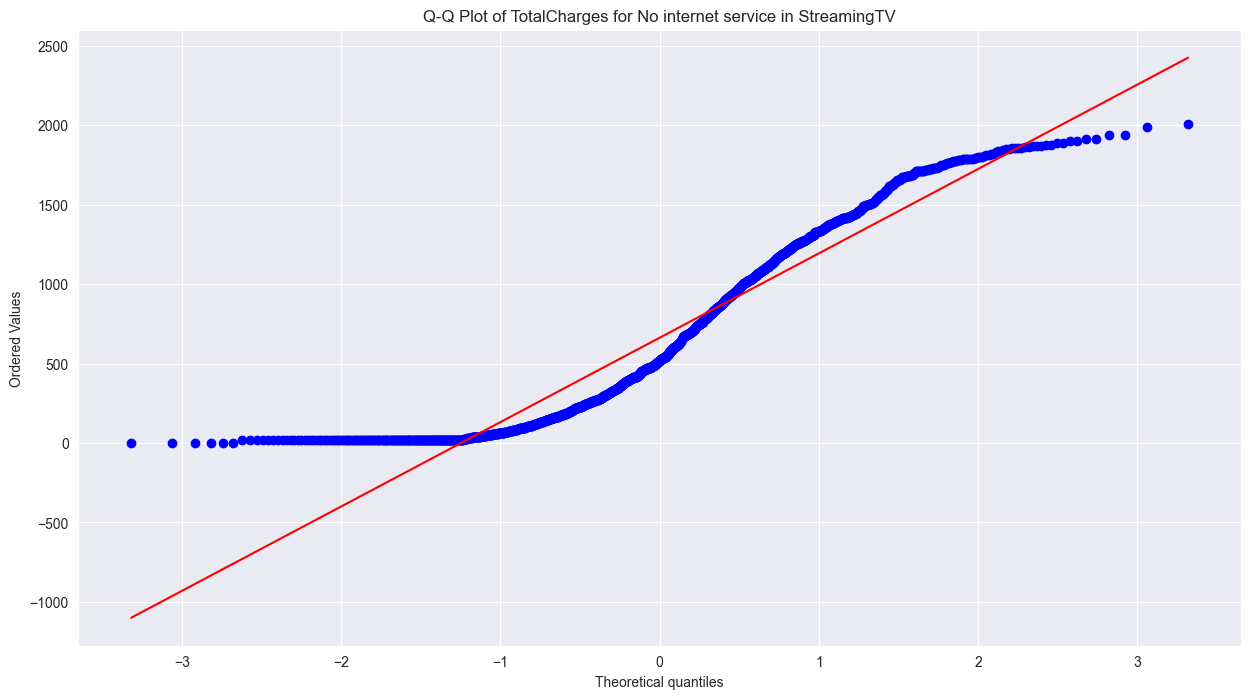



Testing normality for MonthlyCharges across StreamingTV

Checking normality for No in StreamingTV
Shapiro-Wilk test for No in StreamingTV: Stat=0.9739275345111972, P-value=3.0014188788701007e-22
Sample does not look Gaussian (reject H0)


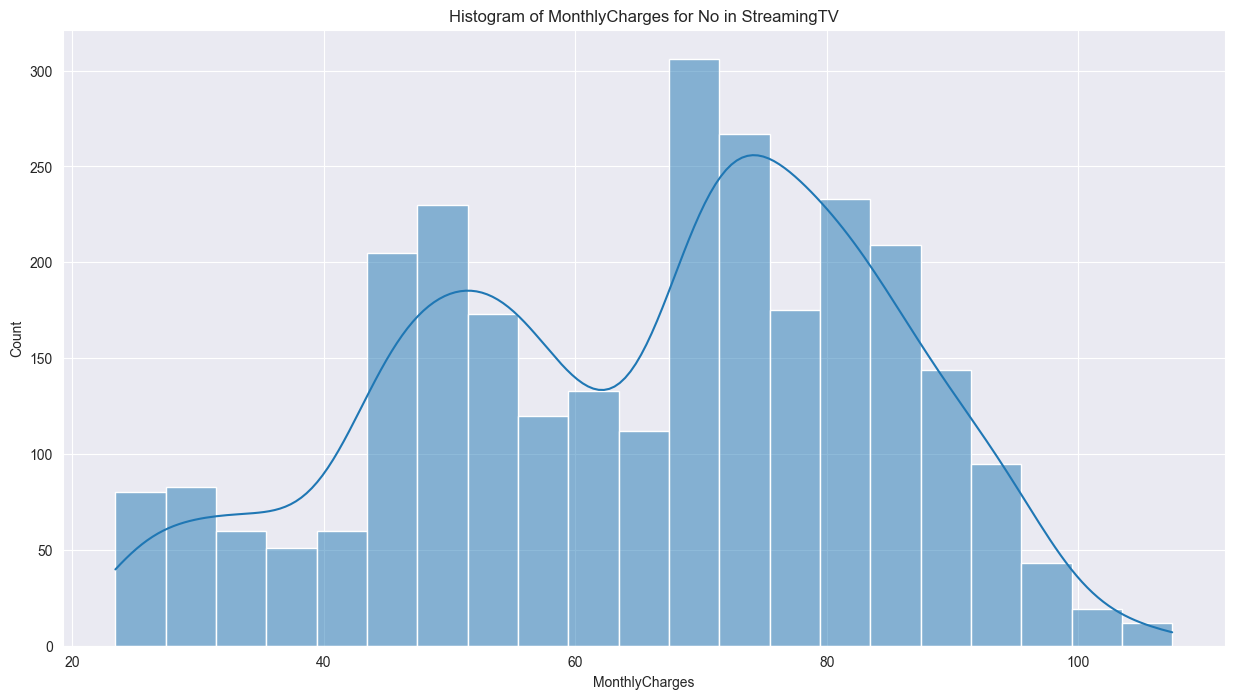

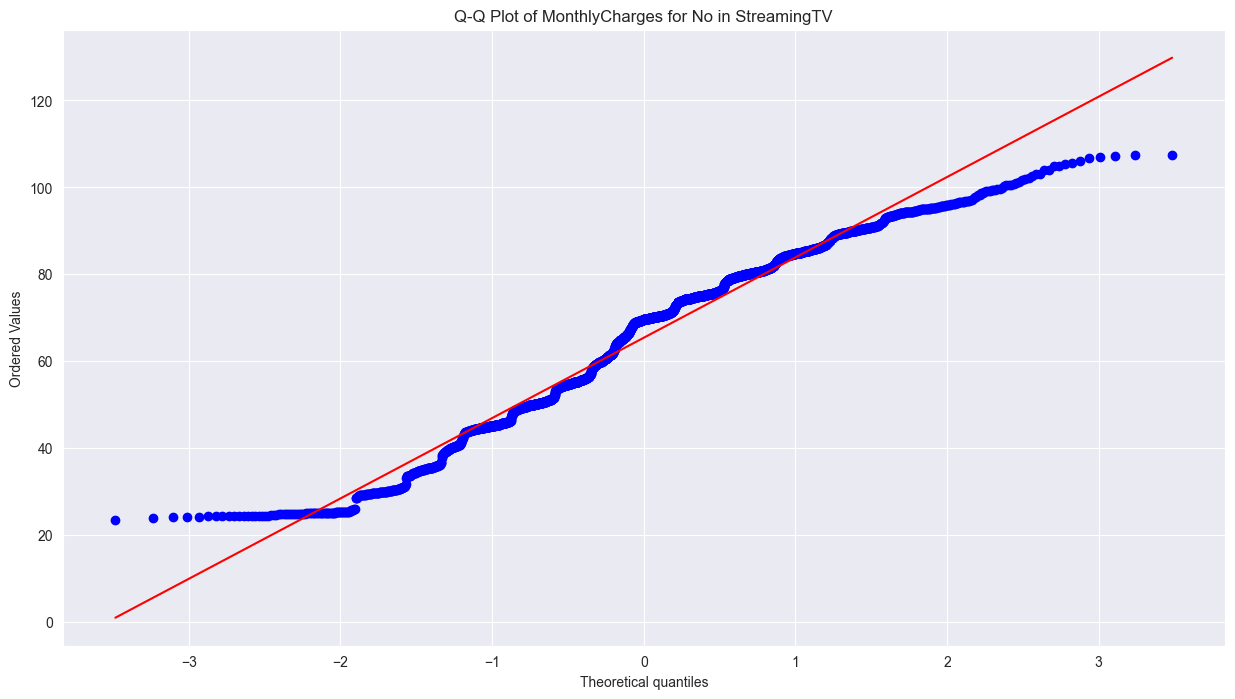


Checking normality for Yes in StreamingTV
Shapiro-Wilk test for Yes in StreamingTV: Stat=0.9369339798548028, P-value=1.9183909071657767e-32
Sample does not look Gaussian (reject H0)


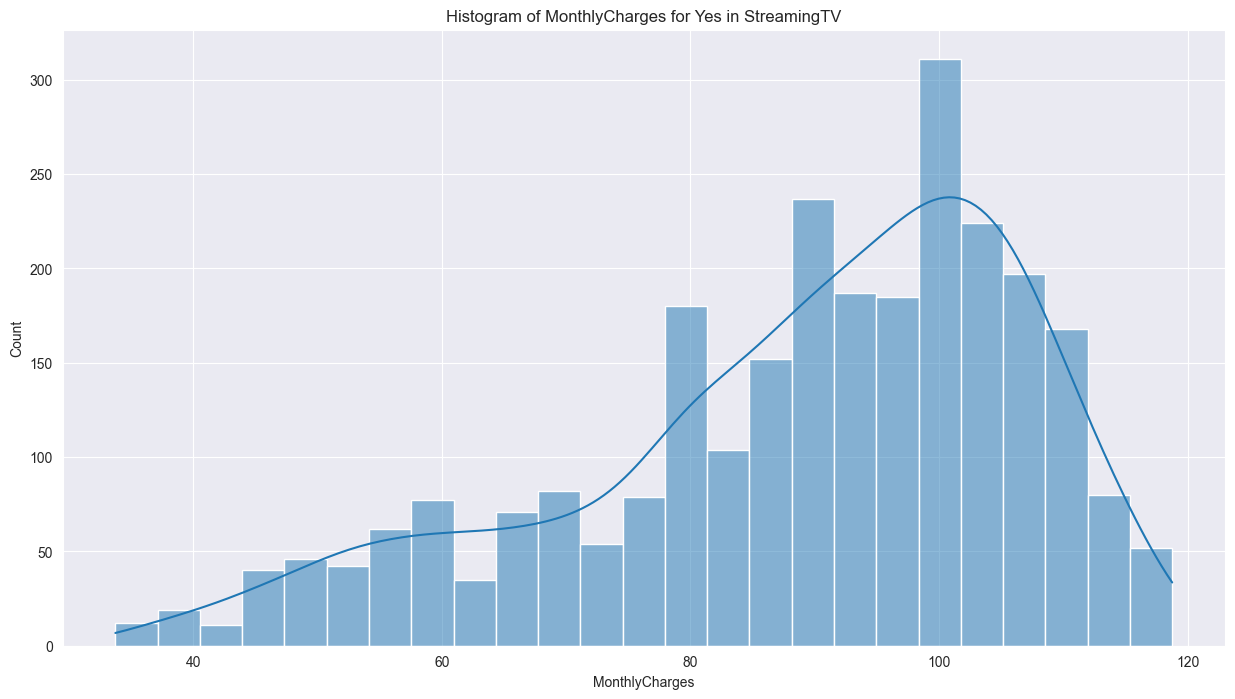

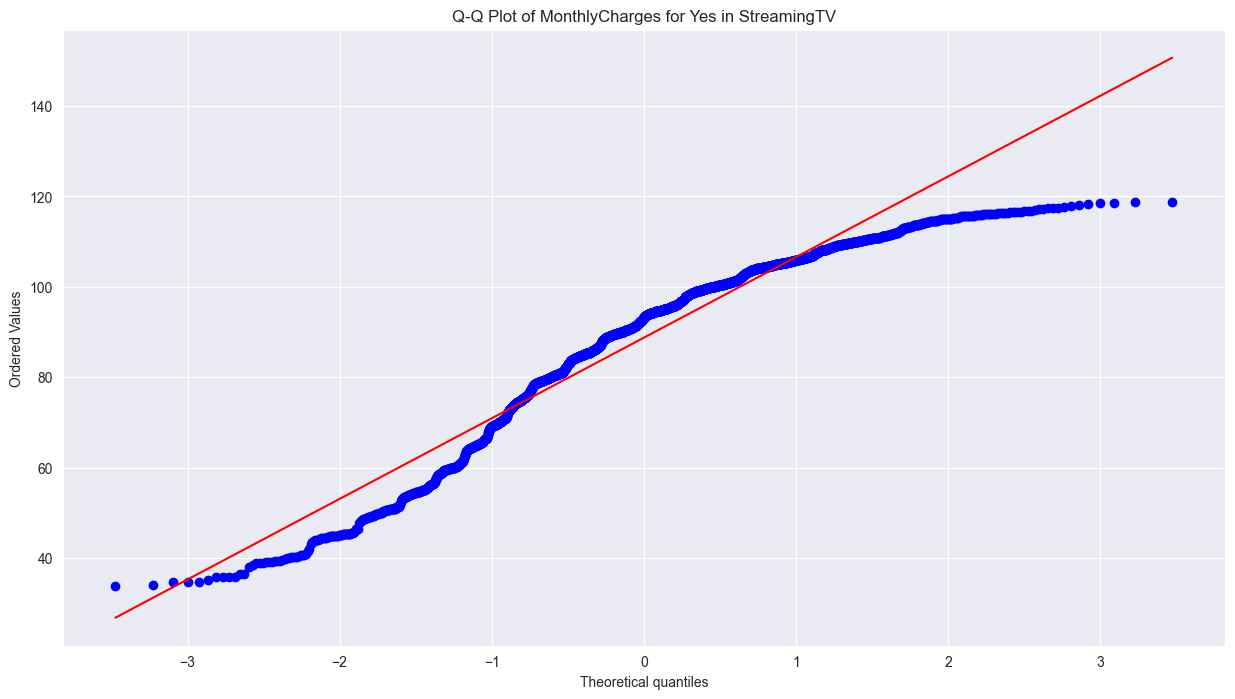


Checking normality for No internet service in StreamingTV
Shapiro-Wilk test for No internet service in StreamingTV: Stat=0.737174468549471, P-value=7.401146663640557e-44
Sample does not look Gaussian (reject H0)


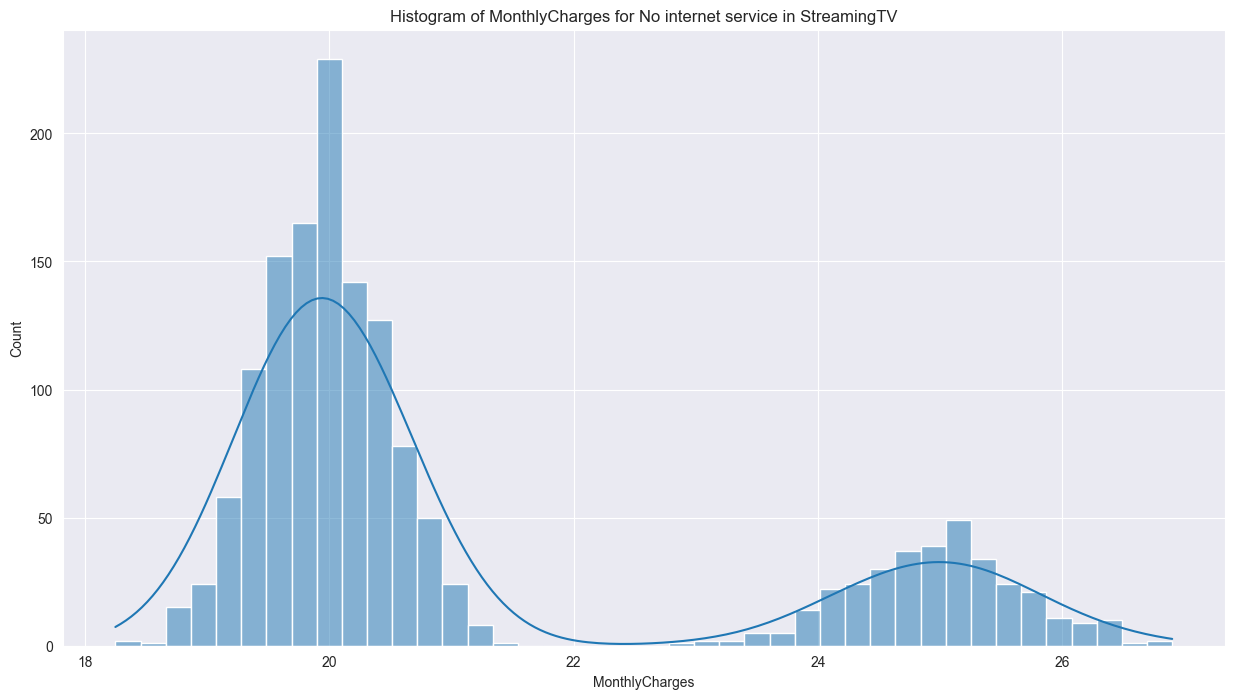

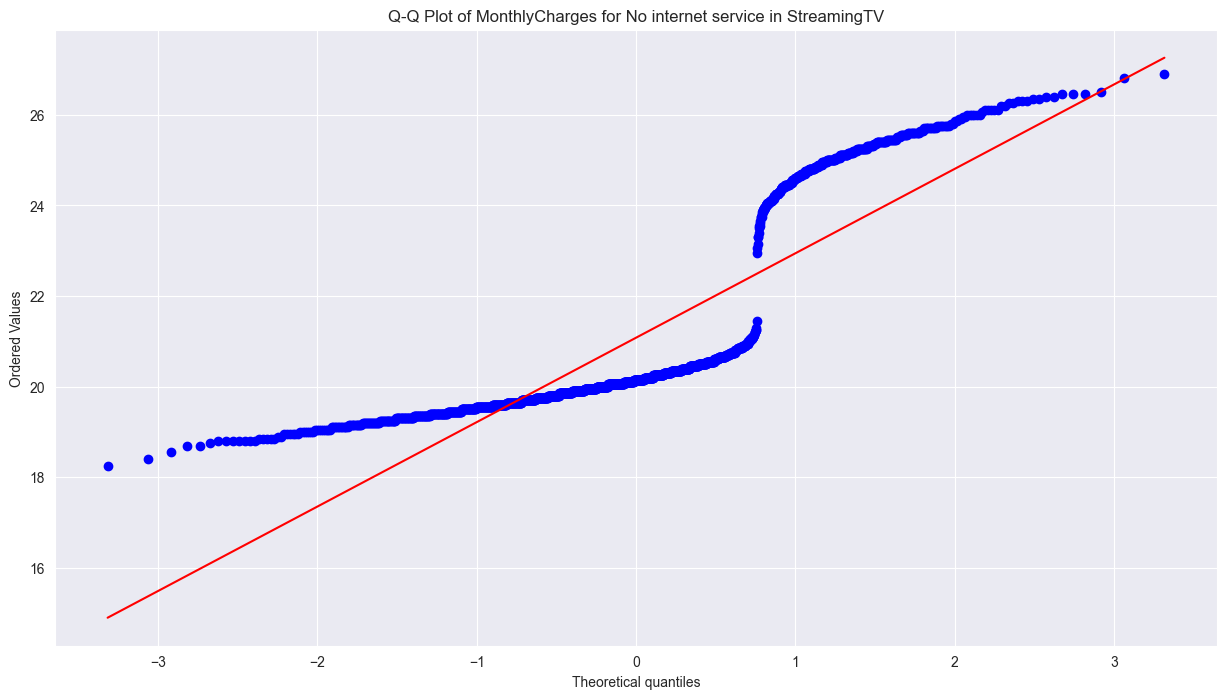



Testing normality for tenure across StreamingTV

Checking normality for No in StreamingTV
Shapiro-Wilk test for No in StreamingTV: Stat=0.878390363313879, P-value=2.1611718236639455e-42
Sample does not look Gaussian (reject H0)


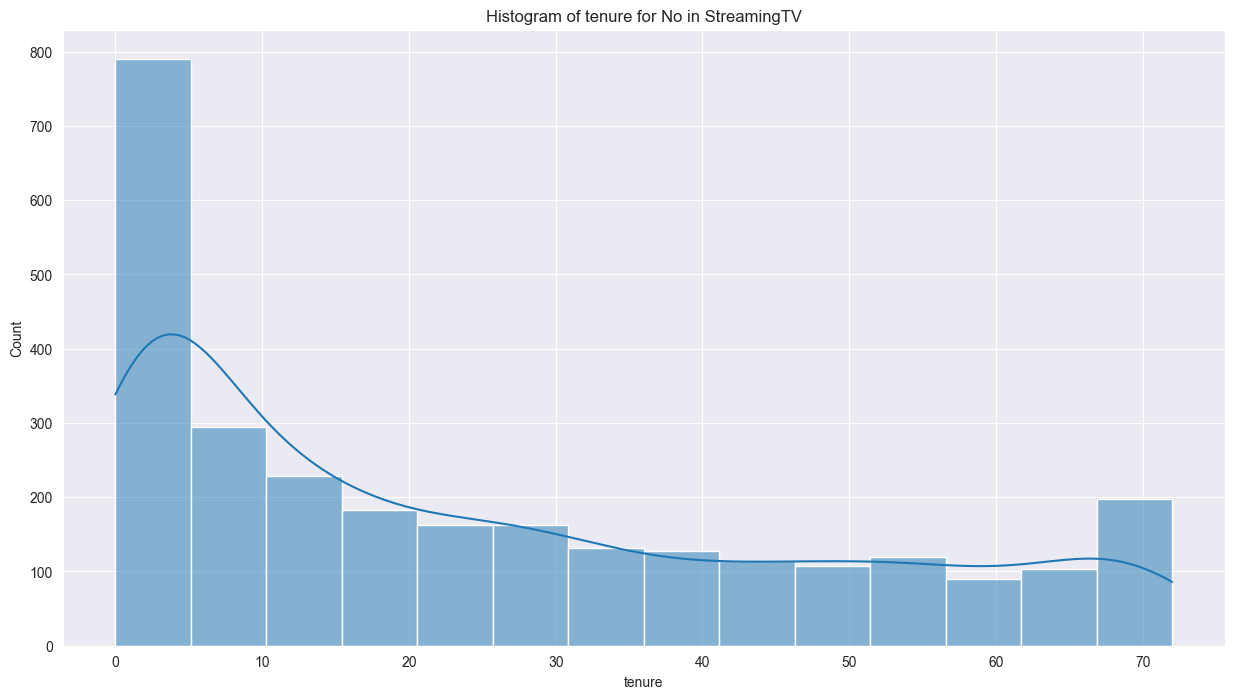

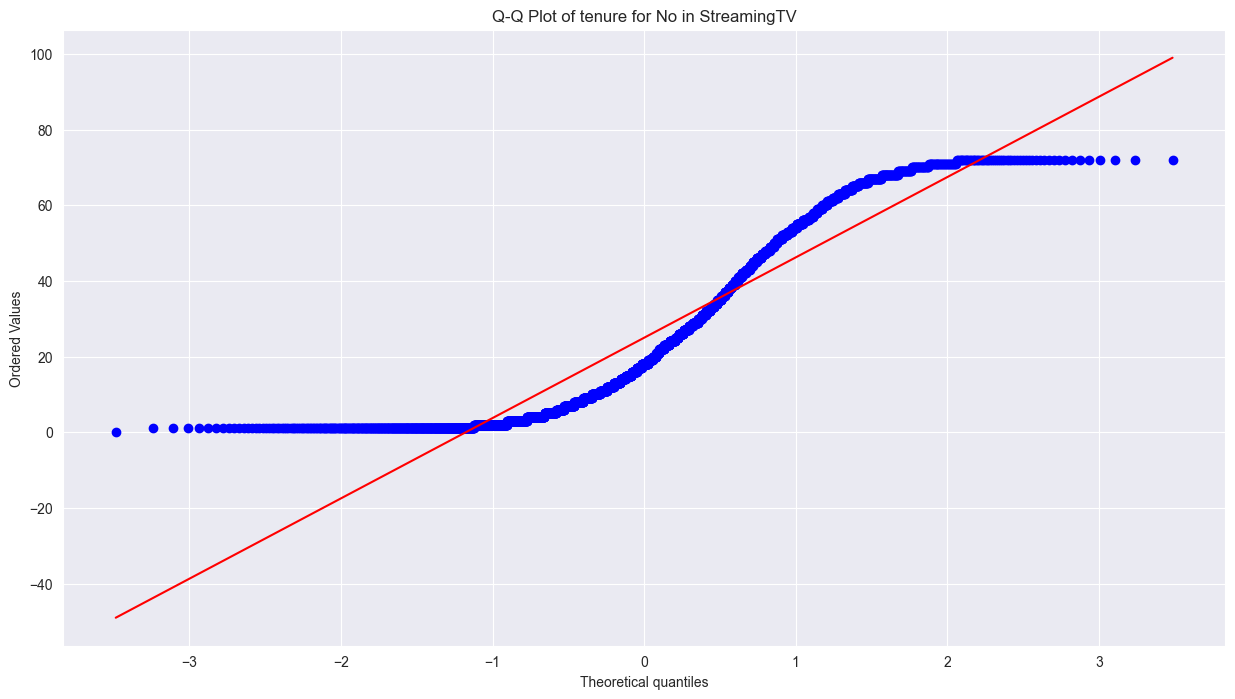


Checking normality for Yes in StreamingTV
Shapiro-Wilk test for Yes in StreamingTV: Stat=0.9126394632158549, P-value=6.404382029527651e-37
Sample does not look Gaussian (reject H0)


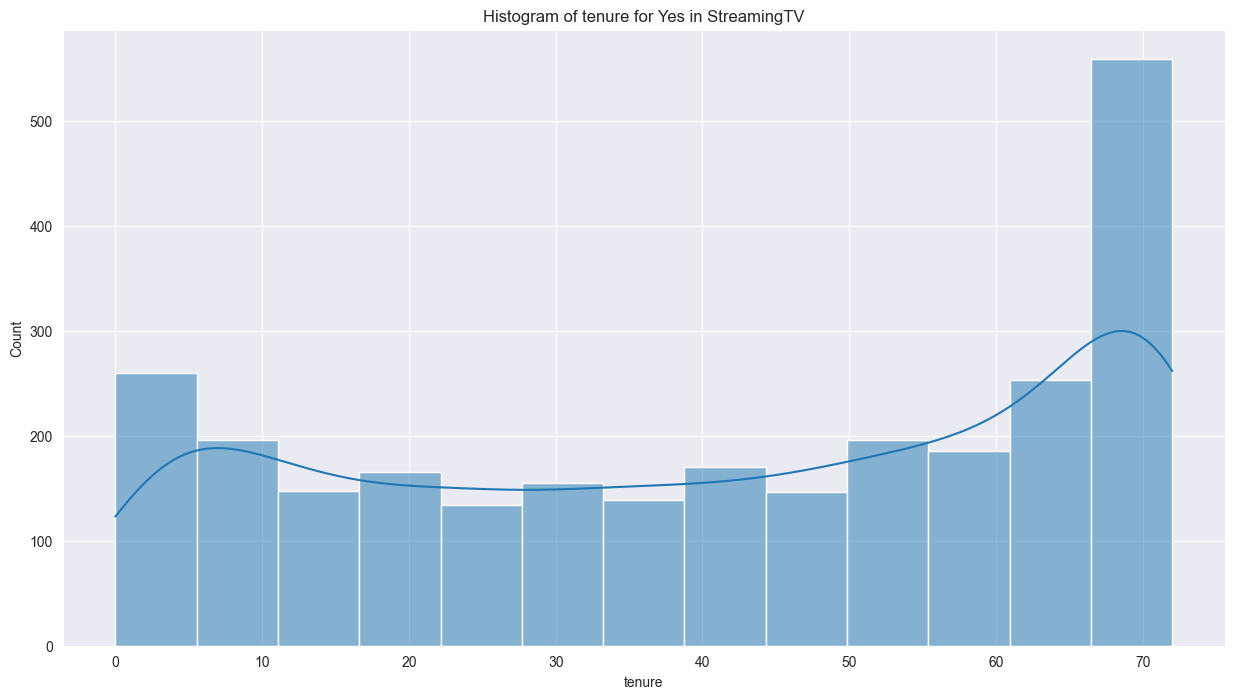

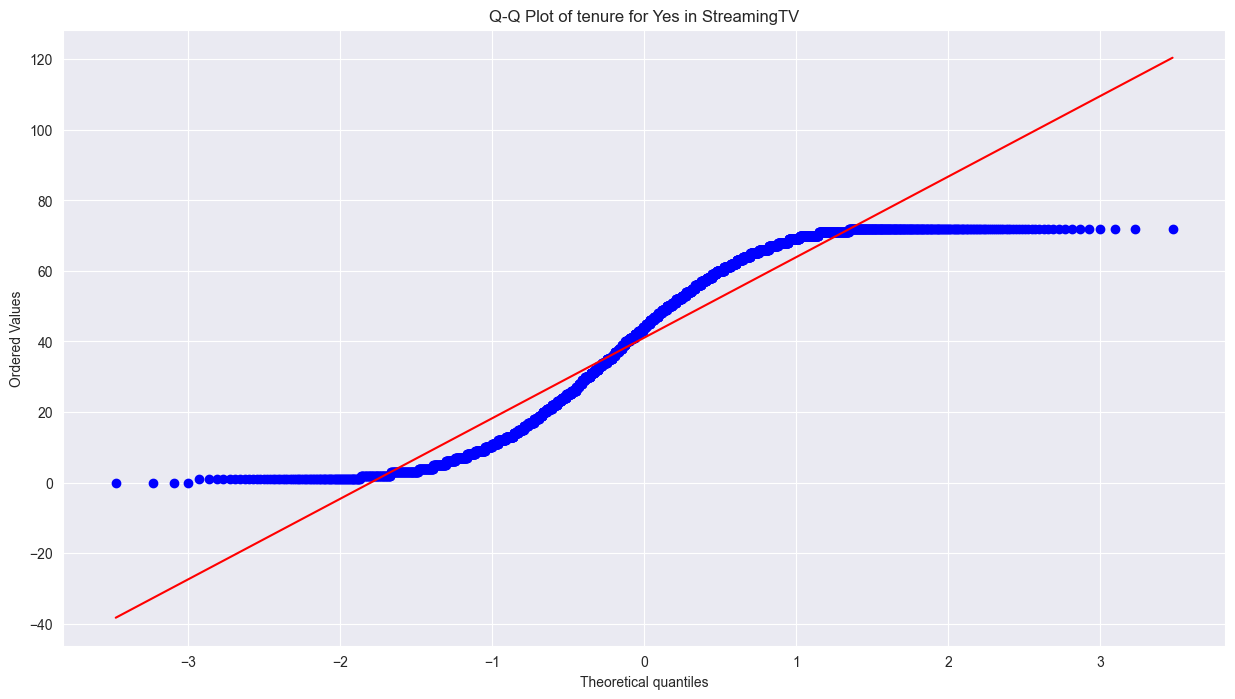


Checking normality for No internet service in StreamingTV
Shapiro-Wilk test for No internet service in StreamingTV: Stat=0.8989356849365119, P-value=1.4395104677621417e-30
Sample does not look Gaussian (reject H0)


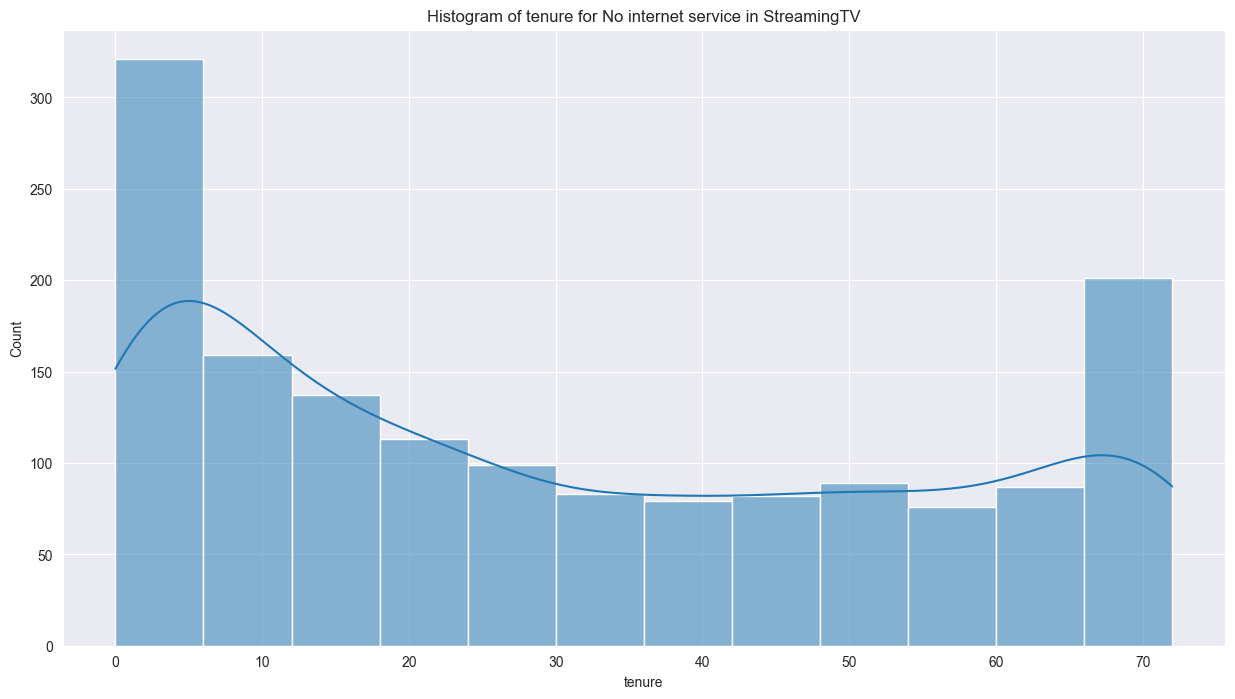

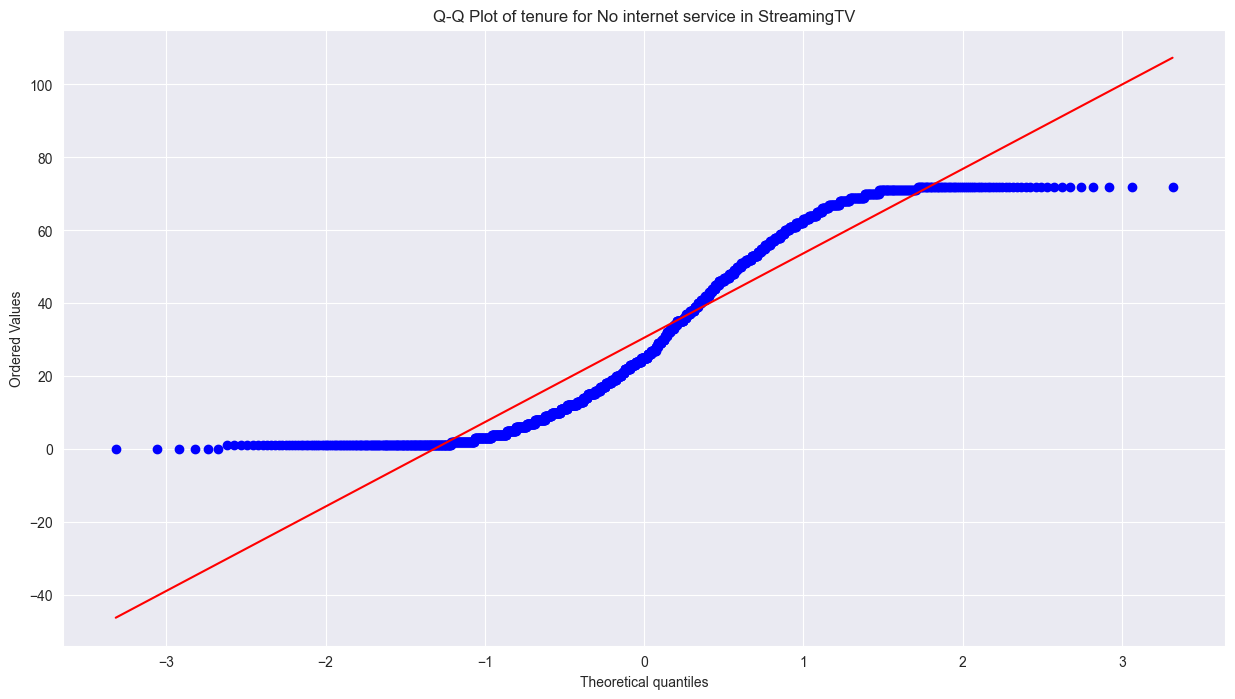



Testing normality for TotalCharges across PaperlessBilling

Checking normality for True in PaperlessBilling
Shapiro-Wilk test for True in PaperlessBilling: Stat=0.8856559124891501, P-value=3.2824729736898084e-48
Sample does not look Gaussian (reject H0)


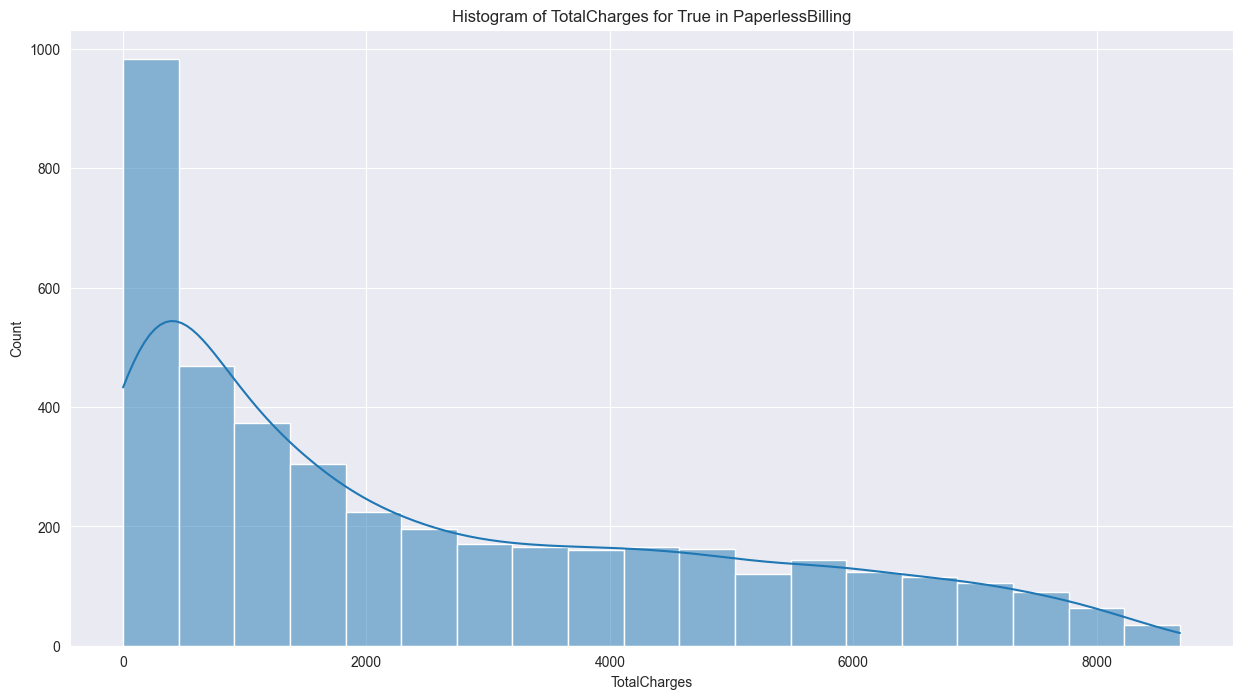

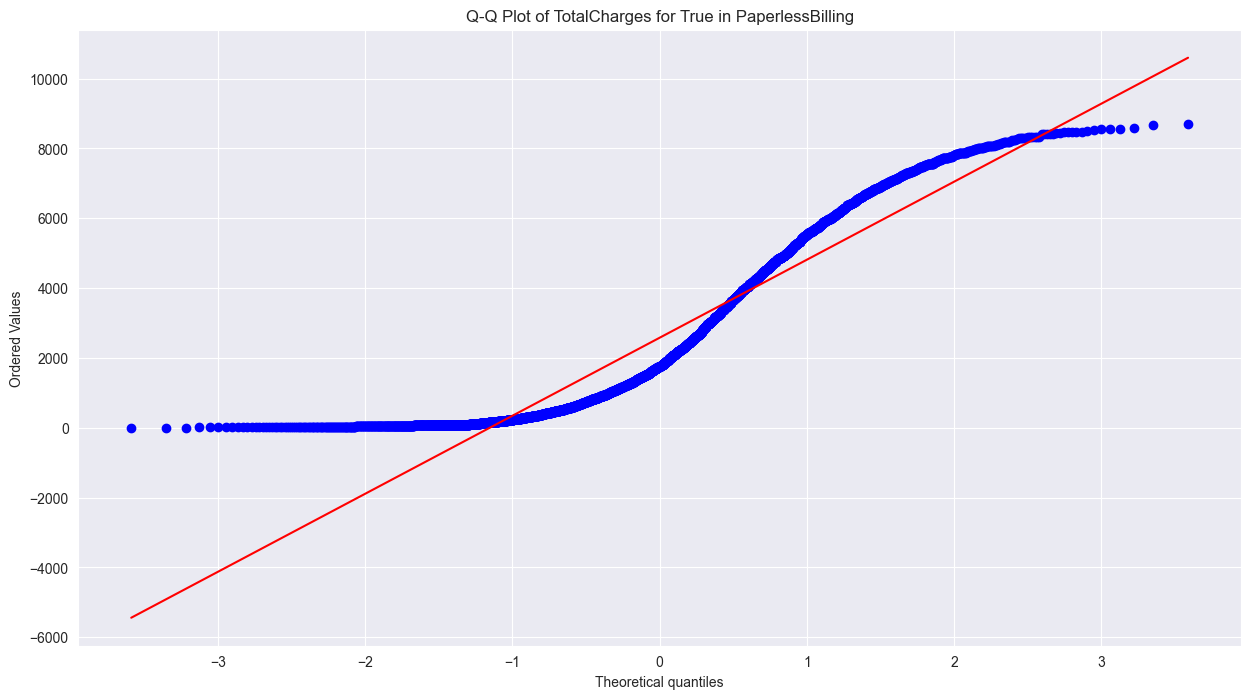


Checking normality for False in PaperlessBilling
Shapiro-Wilk test for False in PaperlessBilling: Stat=0.8190347112407845, P-value=4.348091093627539e-49
Sample does not look Gaussian (reject H0)


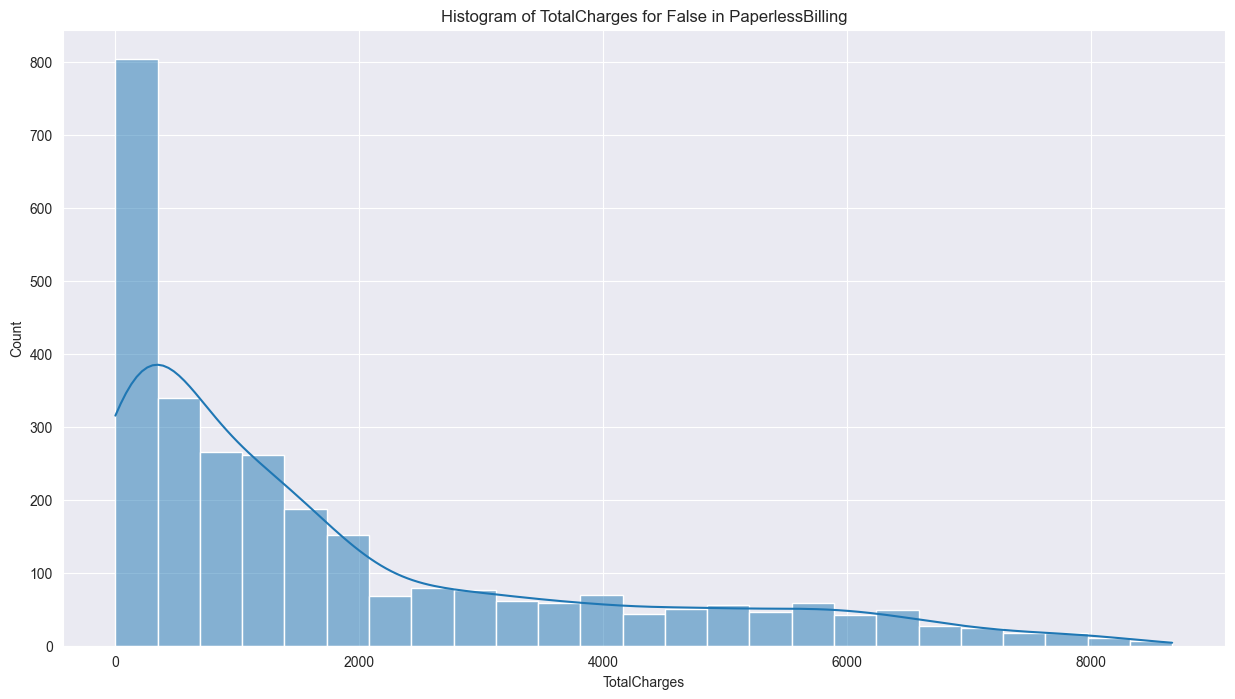

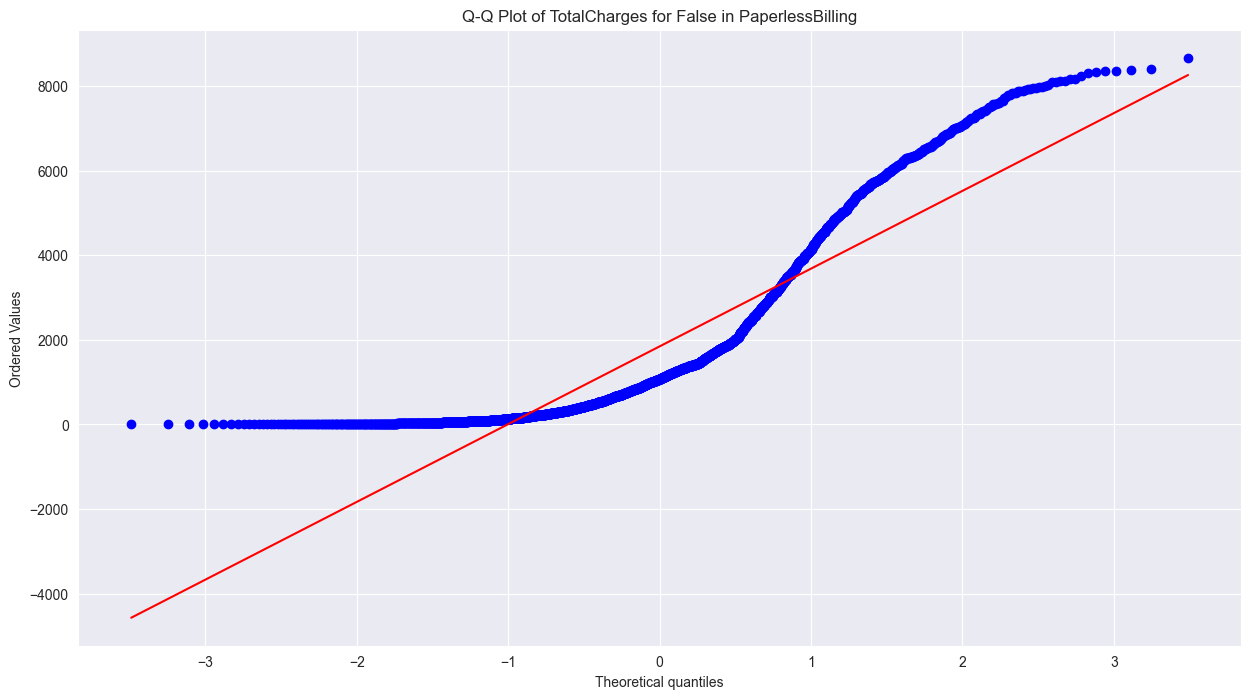



Testing normality for MonthlyCharges across PaperlessBilling

Checking normality for True in PaperlessBilling
Shapiro-Wilk test for True in PaperlessBilling: Stat=0.9322046284604056, P-value=5.850643994538688e-40
Sample does not look Gaussian (reject H0)


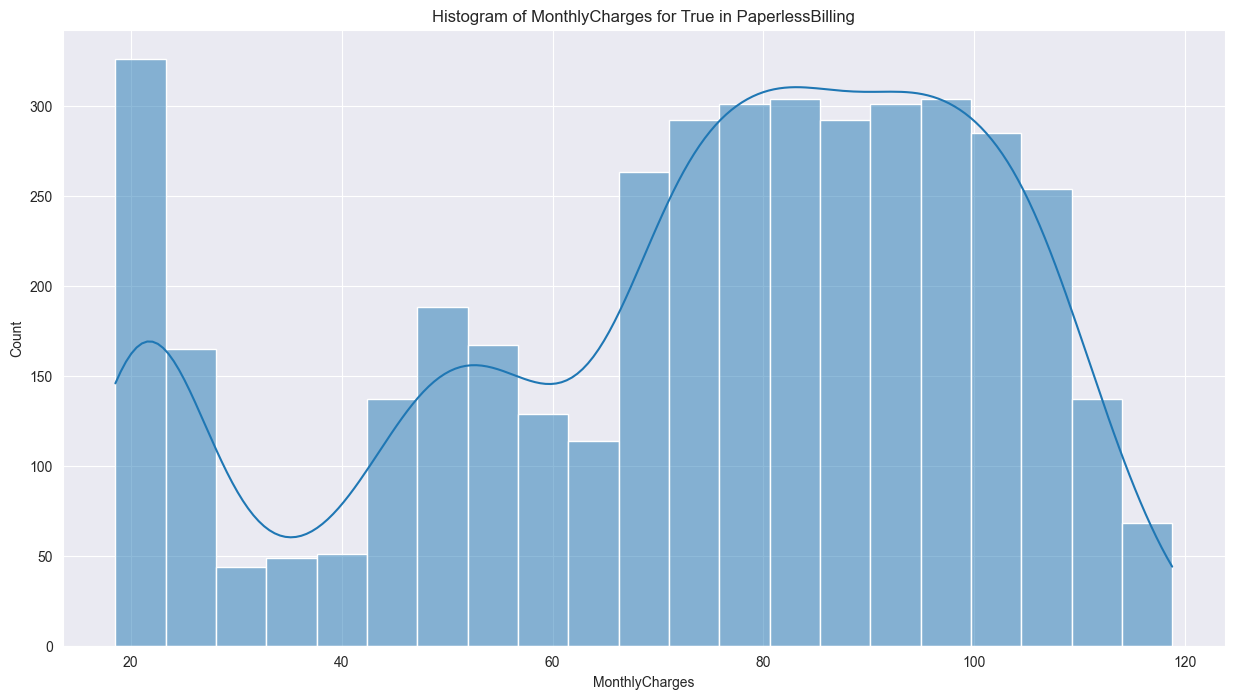

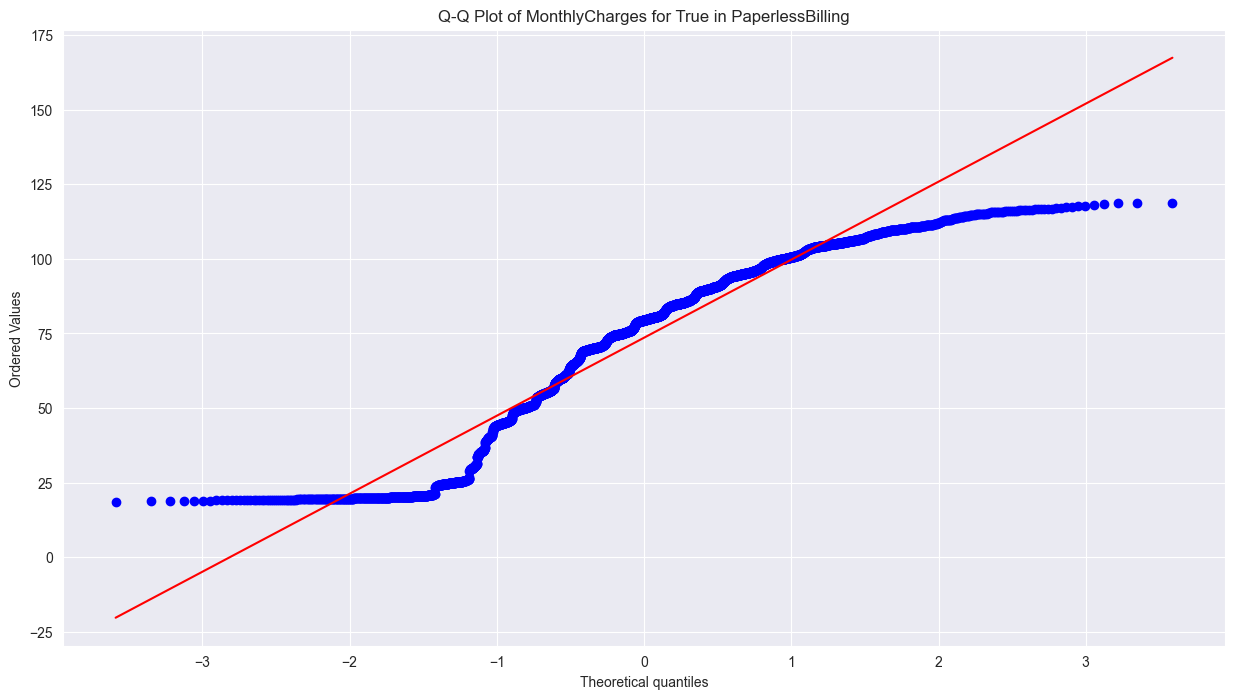


Checking normality for False in PaperlessBilling
Shapiro-Wilk test for False in PaperlessBilling: Stat=0.884077600339225, P-value=5.054577550280884e-42
Sample does not look Gaussian (reject H0)


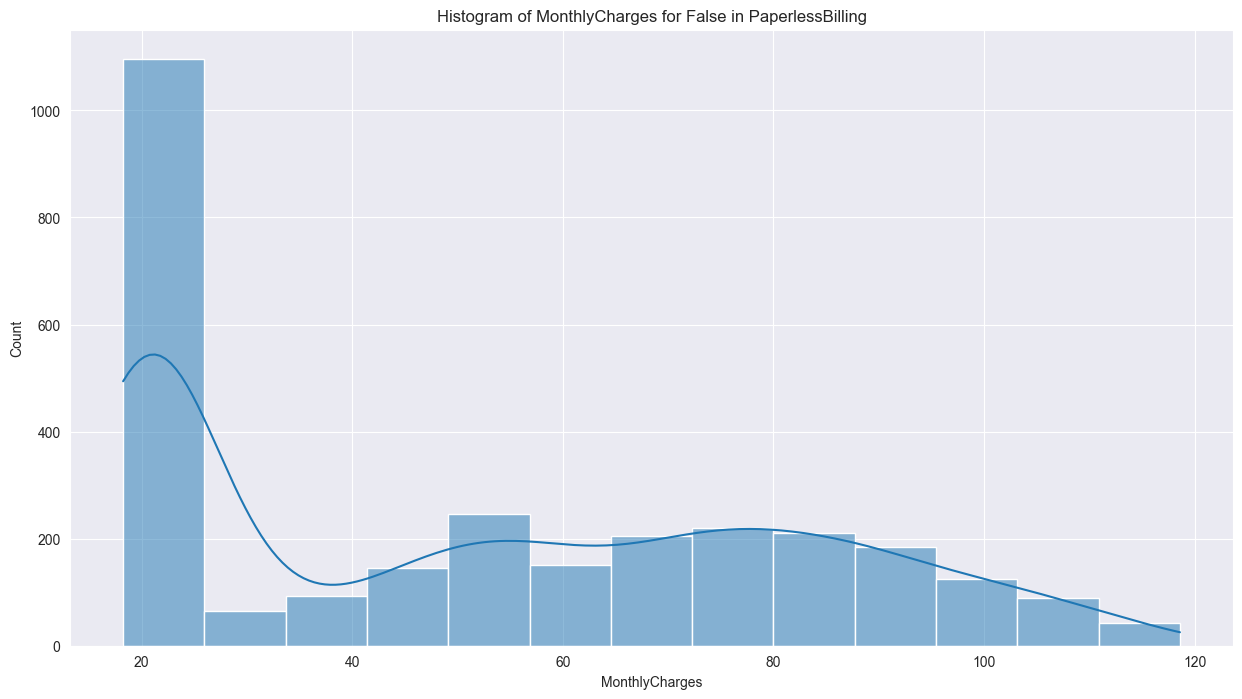

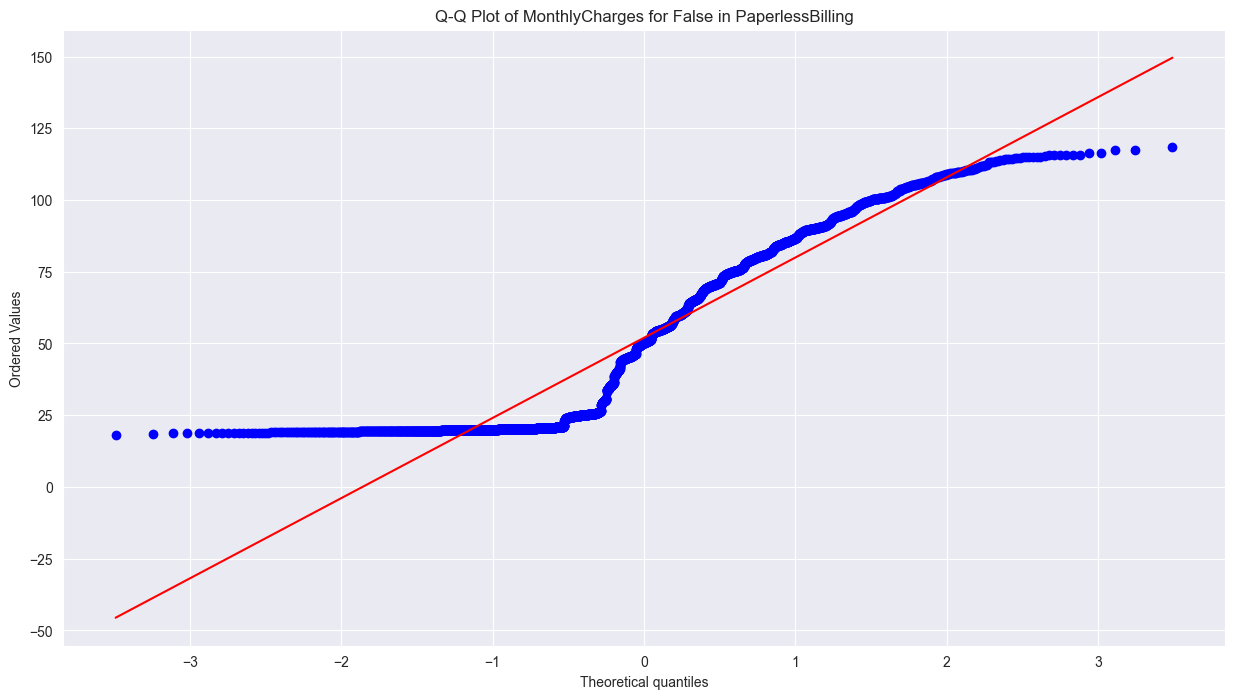



Testing normality for tenure across PaperlessBilling

Checking normality for True in PaperlessBilling
Shapiro-Wilk test for True in PaperlessBilling: Stat=0.904356282074312, P-value=2.663547399913748e-45
Sample does not look Gaussian (reject H0)


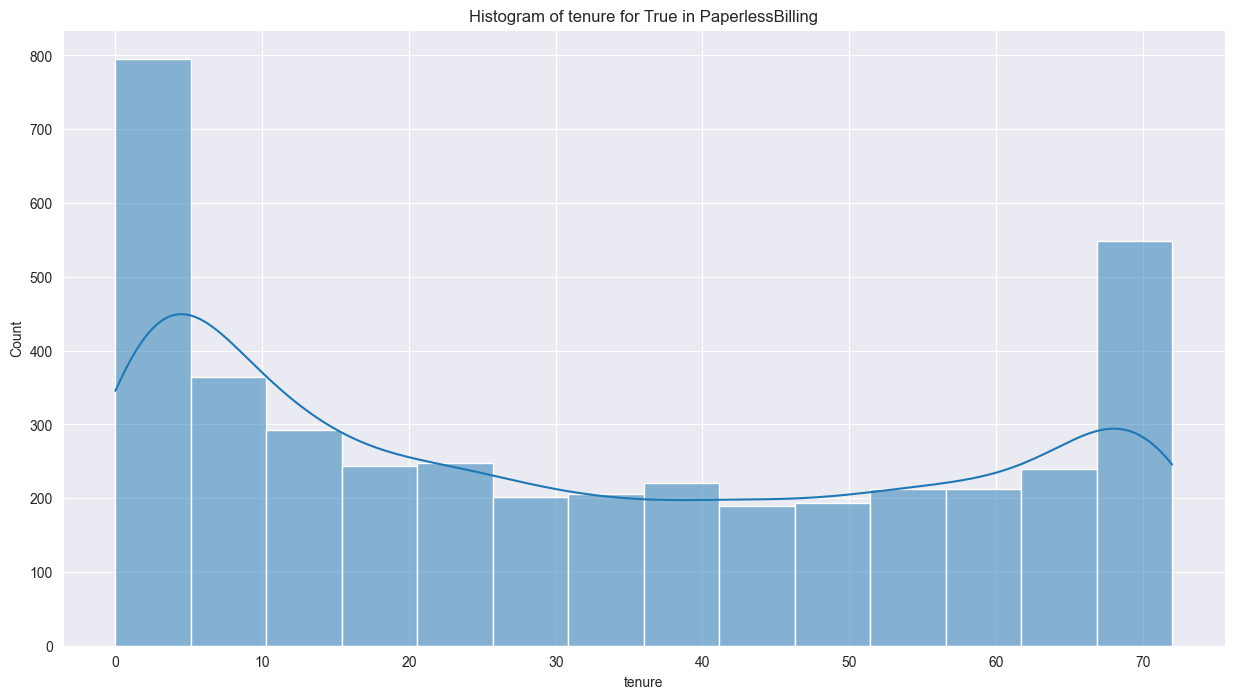

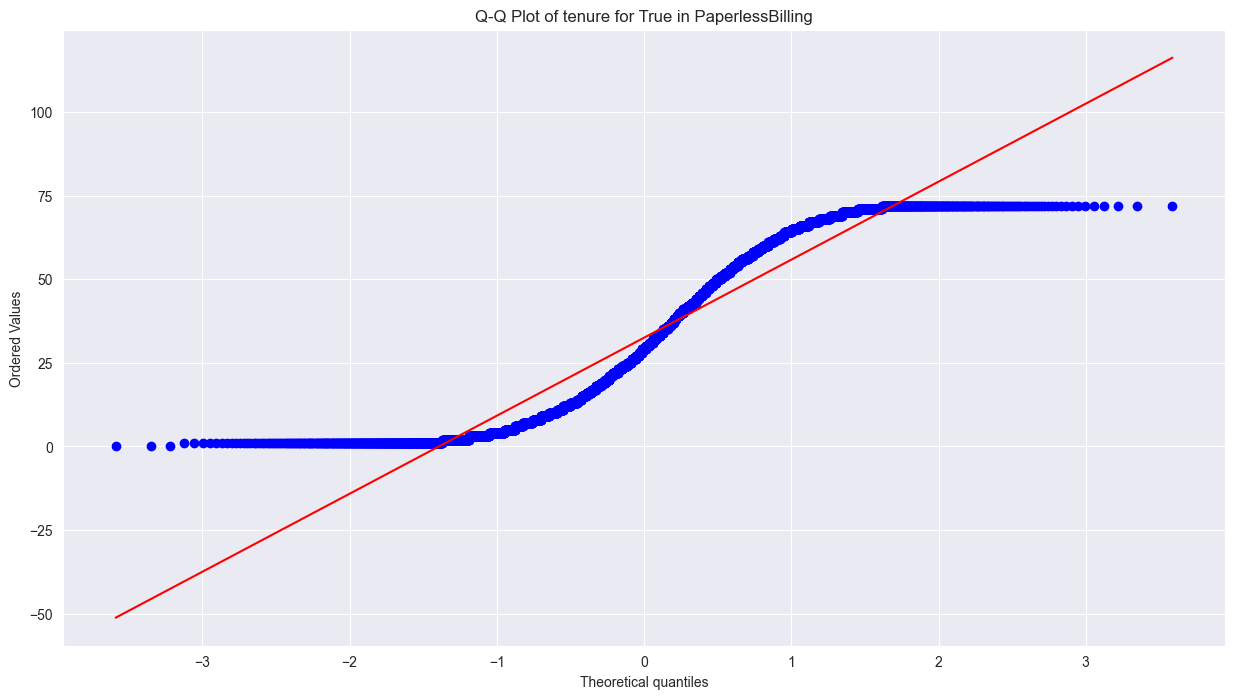


Checking normality for False in PaperlessBilling
Shapiro-Wilk test for False in PaperlessBilling: Stat=0.9026396619396349, P-value=2.073773817471165e-39
Sample does not look Gaussian (reject H0)


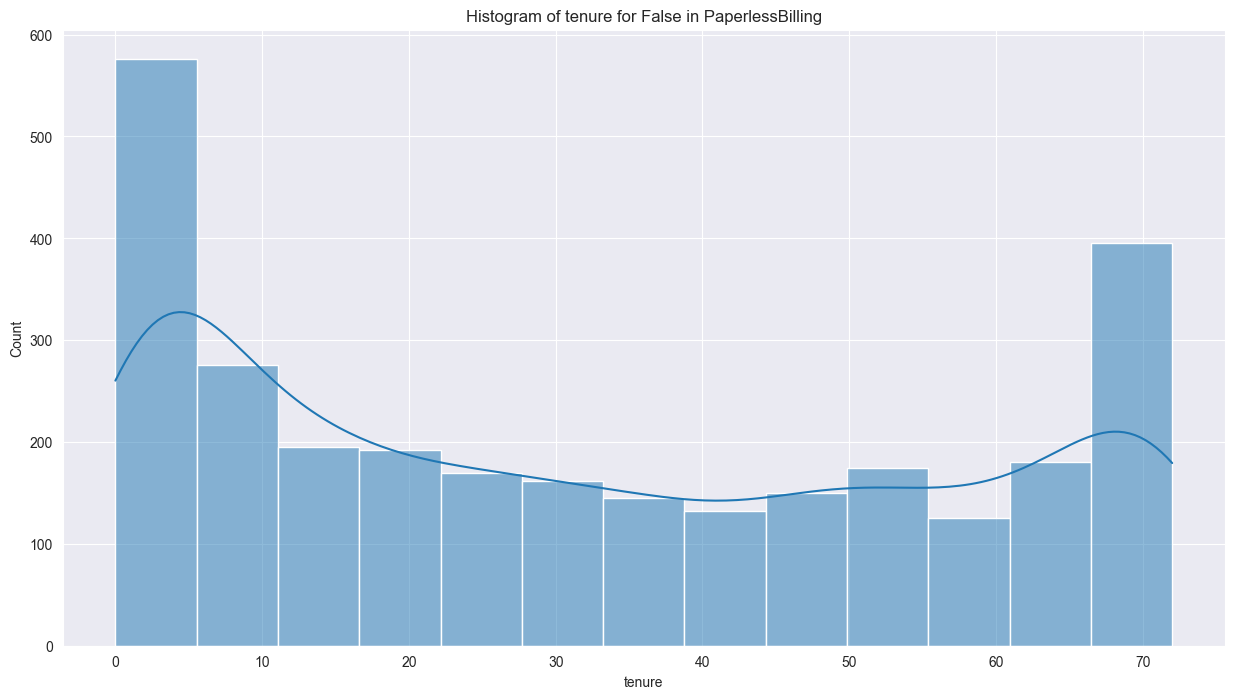

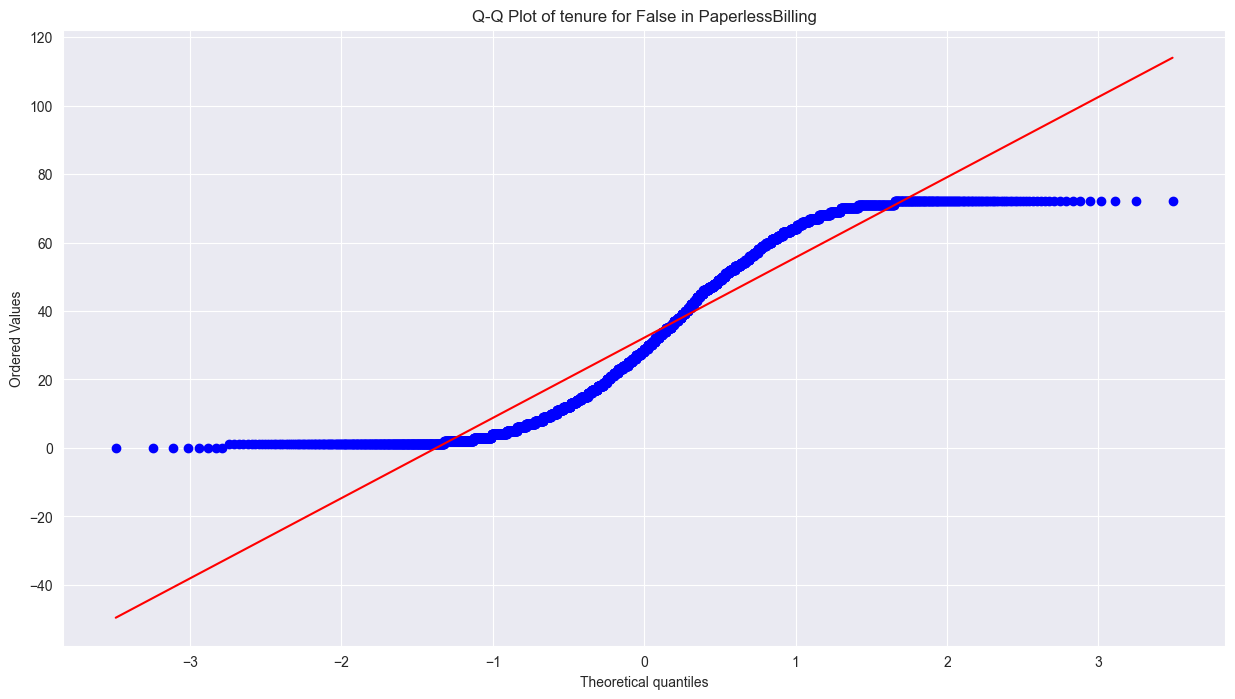

In [139]:
for cat_var in categorical_vars:
    for num_var in numerical_vars:
        print(f"Testing normality for {num_var} across {cat_var}")
        check_normality(dataframe, cat_var, num_var)
        print(
            "\n" + "=" * 50 + "\n"
        )  # Just to separate the outputs for readability

### ANOVA (Analysis of Variance)
Differences between the means of 3 or more independent groups. p-value < 0.05
 means that not all group means are equal but not which ones.

In [140]:
def perform_anova(groups: list[np.ndarray]) -> tuple[bool, float, float]:
    """
    Performs ANOVA on a list of groups and prints the F-statistic and P-value.
    :param groups: A list of arrays where each array contains the numerical
     values of a group
    :type groups: list[np.ndarray]
    :return: None
    :rtype: tuple[bool, float, float]
    """
    f_stat, p_value = f_oneway(*groups)
    return p_value < 0.05, f_stat, p_value

### Kruskall-Wallis
Non-parametric version of ANOVA. Used when equal variance assumptions are not 
met. It evaluates if there's a difference between the medians of 3 or more groups

In [141]:
def perform_kruskal(groups: list[np.ndarray]) -> tuple[bool, float, float]:
    """
    Performs the Kruskal-Wallis H-test for independent samples and prints the H-statistic and P-value.
    :param groups: A list of arrays where each array contains the numerical
     values of a group
    :type groups: list[np.ndarray]
    :return: None
    :rtype: tuple[bool, float, float]
    """
    stat, p_value = kruskal(*groups)
    return p_value < 0.05, stat, p_value

### T-Test
It compares the means of 2 independent groups

In [142]:
def perform_ttest(
    group1: np.ndarray, group2: np.ndarray
) -> tuple[bool, float, float, float]:
    """
    Performs a T-test for the means of two independent samples and prints the T-statistic and P-value.
    :param group1: Array containing the numerical values of the first group
    :param group2: Array containing the numerical values of the second group
    :type group1: np.ndarray
    :type group2: np.ndarray
    :return: None
    :rtype: tuple[bool, float, float, float]
    """
    stat, p_value = ttest_ind(group1, group2)
    effect_size = cohen_d(group1, group2) if p_value < 0.05 else 0
    return p_value < 0.05, stat, p_value, effect_size

### Cohen's D
It quantifies the difference between 2 means in terms of STD.
0.2, 0.5, and 0.8 are typically considered small, medium, and large effect sizes, respectively

In [143]:
def cohen_d(group1: np.ndarray, group2: np.ndarray) -> float:
    """
    Calculates Cohen's D to measure the effect size between two groups.
    :param group1: Array containing the numerical values of the first group
    :type group1: np.ndarray
    :param group2: Array containing the numerical values of the second group
    :type group2: np.ndarray
    :return: Cohen's D effect size
    :rtype: float
    """
    diff: float = np.mean(group1) - np.mean(group2)
    pooled_std: float = np.sqrt(
        (np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2
    )
    effect_size: float = diff / pooled_std
    print(f"Cohen's D: {effect_size}")
    return effect_size

In [144]:
def relational_analysis(
    data: pd.DataFrame, categorical_vars: list[str], numerical_vars: list[str]
) -> dict[str, list[Any]]:
    """
    Determines the appropriate statistical test(s) to use based on the number
     of unique groups in a categorical variable and performs relational
     analysis between a categorical and a numerical variable.

    :param data: DataFrame containing the data
    :type data: pd.DataFrame
    :param categorical_vars: The name of the categorical variable
    :type categorical_vars: str
    :param numerical_vars: The name of the numerical variable
    :type numerical_vars: str
    :return: None
    :rtype: dict[str, list[Any]]
    """
    significant_results: dict[str, list[Any]] = {
        "ANOVA": [],
        "Kruskal": [],
        "T-Test": [],
    }
    for cat_var in categorical_vars:
        for num_var in numerical_vars:
            data_filtered = data.dropna(subset=[num_var])
            categories = data_filtered[cat_var].unique()
            groups = [
                data_filtered[data_filtered[cat_var] == cat][num_var].to_numpy()
                for cat in categories
            ]
            if len(groups) > 2:
                sig, stat, p = perform_anova(groups)
                if sig:
                    significant_results["ANOVA"].append(
                        [cat_var, num_var, stat, p]
                    )
                sig, stat, p = perform_kruskal(groups)
                if sig:
                    significant_results["Kruskal"].append(
                        [cat_var, num_var, stat, p]
                    )
            elif len(groups) == 2:
                sig, stat, p, effect_size = perform_ttest(groups[0], groups[1])
                if sig:
                    significant_results["T-Test"].append(
                        [cat_var, num_var, stat, p, effect_size]
                    )
    return significant_results

**Theory**:
- ANOVA and Kruskal-Wallis Tests: These tests are used to analyze differences 
across multiple groups (more than two) for a given numerical variable. A significant p-value (typically < 0.05) suggests that there are statistically significant differences between the means (ANOVA) or medians (Kruskal-Wallis) of the groups.
- T-Test: This test compares the means between two groups for a given 
numerical variable. A significant p-value indicates a statistically significant difference between the means of the two groups.
- Statistical Significance: A low p-value (e.g., < 0.05) indicates that the 
observed differences are unlikely to have occurred by chance, suggesting a significant relationship between the categorical and numerical variables.
- Stat Value (F-stat, H-stat, T-stat): Provides a measure of the test strength
. For ANOVA, the F-statistic compares the between-group variance to the within-group variance. For Kruskal-Wallis, the H-statistic assesses differences between group ranks. In T-Tests, the T-statistic measures the size of the difference relative to the variation in the sample data.

In [145]:
import json

categorical_vars: list[str] = [
    col
    for col in dataframe.columns
    if dataframe[col].dtype == "object" or dataframe[col].dtype == "bool"
]
numerical_vars: list[str] = ["tenure", "MonthlyCharges", "TotalCharges"]
results = relational_analysis(dataframe, categorical_vars, numerical_vars)
json_string = json.dumps(results)

# Print the JSON string
print(json_string)

Cohen's D: -0.6598529717411075
Cohen's D: -0.27545098668048945
Cohen's D: 0.8200441568356582
Cohen's D: 0.19449510457459002
Cohen's D: 0.6671477303195089
Cohen's D: -0.35327723350014045
Cohen's D: 0.2468434724082507
Cohen's D: -0.1349302384603538
Cohen's D: -1.0945818569056427
Cohen's D: -0.45657704287600176
Cohen's D: 0.7589470577086109
Cohen's D: 0.33141962445926415
Cohen's D: 0.8928294169822302
Cohen's D: -0.4695070987850939
Cohen's D: 0.4798402702883
{"ANOVA": [["MultipleLines", "tenure", 470.52702328087213, 1.5983572244709125e-192], ["MultipleLines", "MonthlyCharges", 1196.6457477431484, 0.0], ["MultipleLines", "TotalCharges", 991.897399893598, 0.0], ["InternetService", "tenure", 5.389653481964458, 0.004582404123187161], ["InternetService", "MonthlyCharges", 16111.646283834032, 0.0], ["InternetService", "TotalCharges", 801.1007327915056, 3.450805027e-314], ["OnlineSecurity", "tenure", 446.5498202771112, 2.610478577365467e-183], ["OnlineSecurity", "MonthlyCharges", 4962.03676366252

**Interpretation summary**
- MultipleLines, InternetService, OnlineSecurity, etc.: These categorical 
variables show significant relationships with tenure, MonthlyCharges, and TotalCharges based on the ANOVA and Kruskal-Wallis tests. The very low p-values indicate strong evidence against the null hypothesis (no difference), suggesting these features significantly impact the numerical variables.
- Contract and PaymentMethod: Both show significant effects across all three 
numerical variables, with especially strong statistics and low p-values in ANOVA tests for tenure and MonthlyCharges, indicating robust differences in group means.
- Partner, Dependents, PhoneService, etc.: The T-Test results for these binary
 (bool) variables against numerical variables also show significant differences, with Cohen's D providing a measure of the effect size, indicating practical significance beyond the statistical significance.

## Correlation

In [146]:
dataframe

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     Female          False     True       False       1         False   
1       Male          False    False       False      34          True   
2       Male          False    False       False       2          True   
3       Male          False    False       False      45         False   
4     Female          False    False       False       2          True   
...      ...            ...      ...         ...     ...           ...   
7038    Male          False     True        True      24          True   
7039  Female          False     True        True      72          True   
7040  Female          False     True        True      11         False   
7041    Male           True     True       False       4          True   
7042    Male          False    False       False      66          True   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

      PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 True           Electronic check           29.85   
1                False               Mailed check           56.95   
2                 True               Mailed check           53.85   
3                False  Bank transfer (automatic)           42.30   
4                 True           Electronic check           70.70   
...                ...                        ...             ...   
7038              True               Mailed check           84.80   
7039              True    Credit card (automatic)          103.20   
7040              True           Electronic check           29.60   
7041              True               Mailed check           74.40   
7042              True  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7043 rows x 20 columns]

In [147]:
dataframe["SeniorCitizen"] = dataframe["SeniorCitizen"].map(
    {True: "Yes", False: "No"}
)
dataframe["Churn"] = dataframe["Churn"].map({"Yes": 1, "No": 0})
binary_categoricals: list[str] = [
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling",
]
for category in binary_categoricals:
    dataframe[category] = (
        dataframe[category].map({True: "Yes", False: "No"}).astype(str)
    )
df_dummies: pd.DataFrame = pd.get_dummies(dataframe, dtype=int)
df_dummies

tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male  \
0          1           29.85         29.85      0              1            0   
1         34           56.95       1889.50      0              0            1   
2          2           53.85        108.15      1              0            1   
3         45           42.30       1840.75      0              0            1   
4          2           70.70        151.65      1              1            0   
...      ...             ...           ...    ...            ...          ...   
7038      24           84.80       1990.50      0              0            1   
7039      72          103.20       7362.90      0              1            0   
7040      11           29.60        346.45      0              1            0   
7041       4           74.40        306.60      1              0            1   
7042      66          105.65       6844.50      0              0            1   

      SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
0                    1                  0           0            1   
1                    1                  0           1            0   
2                    1                  0           1            0   
3                    1                  0           1            0   
4                    1                  0           1            0   
...                ...                ...         ...          ...   
7038                 1                  0           0            1   
7039                 1                  0           0            1   
7040                 1                  0           0            1   
7041                 0                  1           0            1   
7042                 1                  0           1            0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
0                 1               0                1                 0   
1                 1               0                0                 1   
2                 1               0                0                 1   
3                 1               0                1                 0   
4                 1               0                0                 1   
...             ...             ...              ...               ...   
7038              0               1                0                 1   
7039              0               1                0                 1   
7040              0               1                1                 0   
7041              1               0                0                 1   
7042              1               0                0                 1   

      MultipleLines_No  ...  StreamingTV_No  StreamingTV_No internet service  \
0                    0  ...               1                                0   
1                    1  ...               1                                0   
2                    1  ...               1                                0   
3                    0  ...               1                                0   
4                    1  ...               1                                0   
...                ...  ...             ...                              ...   
7038                 0  ...               0                                0   
7039                 0  ...               0                                0   
7040                 0  ...               1                                0   
7041                 0  ...               1                                0   
7042                 1  ...               0                                0   

      StreamingTV_Yes  StreamingMovies_No  \
0                   0                   1   
1                   0                   1   
2                   0                   1   
3                   0                   1   
4                   0                   1   
...               ...                 ...   
7038                1      

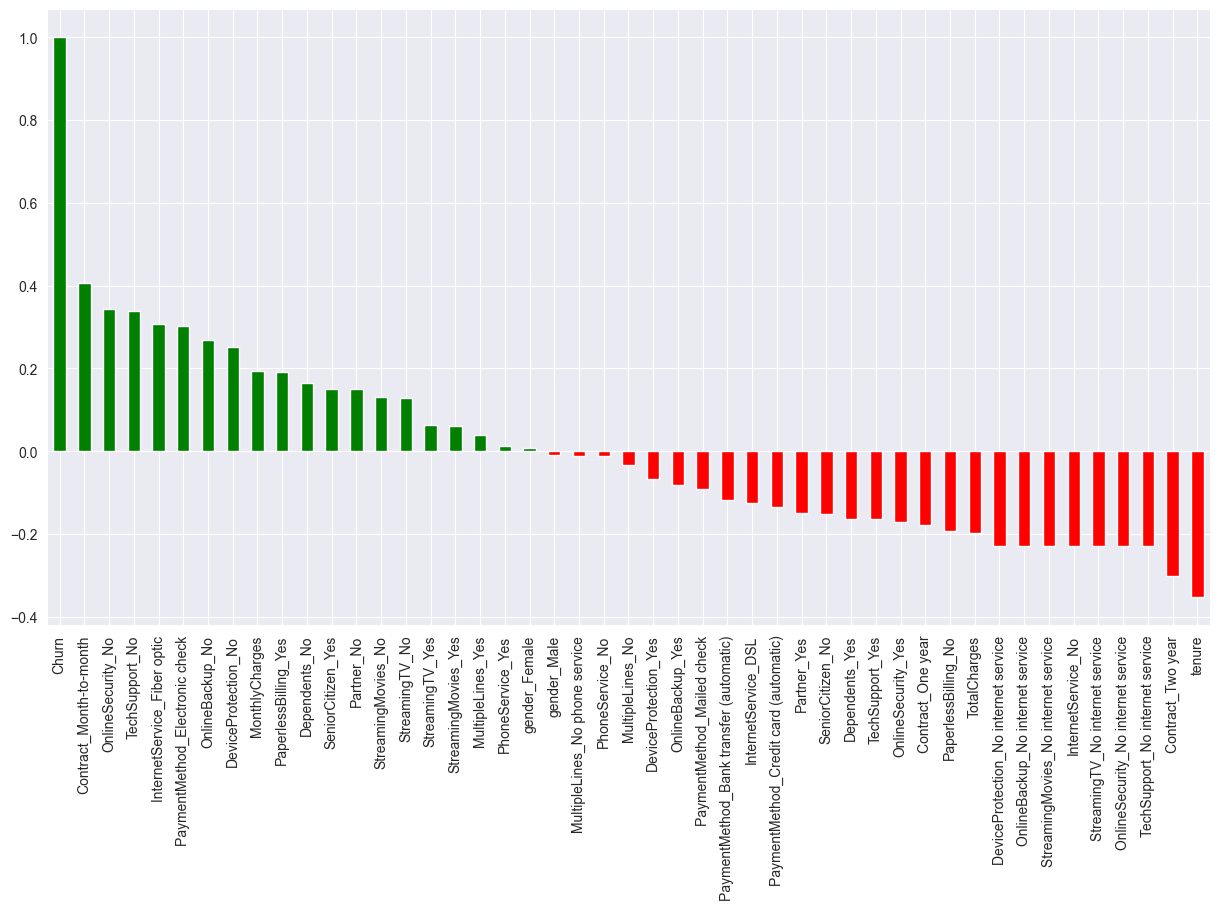

In [151]:
correlations: pd.Series = df_dummies.corr()["Churn"].sort_values(
    ascending=False
)
colors: list[str] = ["green" if x > 0 else "red" for x in correlations]

# Create the bar plot
plt.figure(figsize=(15, 8))
correlations.plot(kind="bar", color=colors)
plt.show()

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Services such as Online security, streaming TV, online backup, tech support, 
etc. without internet connection seem to be negatively related to churn.

In [156]:
df_dummies.to_csv("../data/processed/df_dummies.csv", index=False)

In [154]:
df_dummies["Churn"] = df_dummies["Churn"].astype(int)
df_dummies["tenure"] = df_dummies["tenure"].astype(int)

In [155]:
df_dummies.dtypes

tenure                                       int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
gender_Female                                int32
gender_Male                                  int32
SeniorCitizen_No                             int32
SeniorCitizen_Yes                            int32
Partner_No                                   int32
Partner_Yes                                  int32
Dependents_No                                int32
Dependents_Yes                               int32
PhoneService_No                              int32
PhoneService_Yes                             int32
MultipleLines_No                             int32
MultipleLines_No phone service               int32
MultipleLines_Yes                            int32
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             